# <CENTER><div class="alert alert-block alert-info"><b>Prédiction de la consommation énergétique et de l'émission de bâtiments<br> Analyse exploratoire</b><div><CENTER>   
    

### Problématique:
- Prédire les émissions en CO2 et la consommation totale d'énergie de bâtiments pour lesquels elles n'ont pas été mesurées.
- Evaluer l'intérêt de l'"ENERGY STAR Score" pour la prédiction des émissions.  

### Source des jeux de données (un pour l'année 2015 et un pour l'année 2016):
https://www.kaggle.com/datasets/city-of-seattle/sea-building-energy-benchmarking 

### Objectifs:
1. Réaliser une courte analyse exploratoire des jeux de données (le présent notebook)
2. Tester différents modèles de prédiction afin de prédire les émissions de CO2 en se basant sur les données déclaratives du permis d'exploitation commerciale (Notebook associé). 
3. Evaluer l'importance de la variable ENERGY STAR score pour la prédiction des émissions de CO2 (Notebook associé).
4. Tester différents modèles pour prédire la consommation totale d'énergie en se basant sur les données déclaratives du permis d'exploitation commerciale (Notebook associé).

    
#### ENERGY STAR
Sur le site https://www.energystar.gov/, l'ENERGY START est définie comme étant un score qui fournit un aperçu complet de la performance énergétique d'un bâtiment en prenant en compte ses caractéristiques physiques, son fonctionnement et les comportements de ces occupants. Il est exprimé sur une échelle de 1 à 100 avec 100 représentant la meilleur performance.

### <a name="C0">Sommaire</a>

- <a href="#C1">1. Importation des librairies nécessaires</a>
- <a href="#C2">2. Description des jeux de données</a> 
    - <a href="#C21">2.1. Description du jeu de données pour 2015</a> 
    - <a href="#C22">2.2. Description du jeu de données pour 2016</a> 
    - <a href="#C23">2.3. Comparaison des 2 jeux de données</a> 
- <a href="#C3">3. Nettoyage du jeu de données</a> 
    - <a href="#C31">3.1. Sélection selon la catégorie des bâtiments</a> 
    - <a href="#C32">3.2. Vérification des variables concernant la localisation géographique des bâtiments</a> 
    - <a href="#C33">3.3. Vérification des variables concernant la consommation énergétique des bâtiments</a> 
    - <a href="#C34">3.4. Vérification des variables concernant l'émissions de CO2</a> 
    - <a href="#C35">3.5. Vérification des variables concernant les données déclaratives du permis d'exploitation commerciale des bâtiments</a> 
    - <a href="#C36">3.6.  Autres variables</a> 
- <a href="#C4">4. Transformation de certaines variables et suppression des variables inutiles </a> 
    - <a href="#C41">4.1. Suppression des variables 'SiteEUI(kBtu/sf)' et 'SourceEUI(kBtu/sf)' </a> 
    - <a href="#C42">4.2. Cas des variables 'TotalGHGEmissions' et 'GHGEmissionIntensity' </a> 
    - <a href="#C43">4.3. Transformation des variables 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA' et 'ThirdLargestPropertyUseTypeGFA' </a> 
    - <a href="#C44">4.4. Transformation des variables concernant la consommation énergétique </a> 
    - <a href="#C45">4.5. Transformation des variables concernant la superficie des bâtiments </a> 
- <a href="#C5">5. Analyse exploratoire </a> 
    - <a href="#C51">5.1. Des valeurs manquantes sont-elles encore présente? </a> 
    - <a href="#C52">5.2. Analyses univariées </a> 
    - <a href="#C53">5.3. Analyses multivariées </a> 

# <div class="alert alert-block alert-info"><a name="C1">1. Importation des librairies nécessaires</a></div>
Pour l'analyse des jeux de données, nous aurons besoin des librairies : Pandas, Matplotlib, Seaborn et numpy. Dans ce notebook, les librairies fuzzywuzzy, missingno et folium sont également utilisées.

In [1]:
# Importation des librairies nécessaires
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import fuzzywuzzy
from fuzzywuzzy import fuzz
import missingno as msno
import folium
%matplotlib inline

In [2]:
print("Dans ce notebook, les versions des packages utilisés sont:")
print("- Pandas", pd.__version__)
print("- matplotlib", matplotlib.__version__)
print("- Seaborn", sns.__version__)
print("- Numpy", np.__version__)
print("- fuzzywuzzy", fuzzywuzzy.__version__)
print("- missingno", msno.__version__)
print("- folium", folium.__version__)

Dans ce notebook, les versions des packages utilisés sont:
- Pandas 1.4.2
- matplotlib 3.5.1
- Seaborn 0.11.2
- Numpy 1.21.5
- fuzzywuzzy 0.18.0
- missingno 0.4.2
- folium 0.12.1.post1


<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>


# <div class="alert alert-block alert-info"><a name="C2">2. Description des jeux de données</a></div>

Pour ce projet, nous avons deux jeux de données à notre disposition: un comportant les relevés pour l'année 2015 et l'autre pour l'année 2016. Dans cette partie, je vais:
- voir à quoi ressemble le jeu de données pour l'année 2015
- voir à quoi ressemble le jeu de données pour l'année 2016
- comparer ces deux jeux de données pour savoir s'ils contiennent les mêmes colonnes et les mêmes bâtiments.

## <div class="alert alert-block alert-info"><a name="C21">2.1. Description du jeu de données pour 2015</a></div>

In [3]:
# Charger le jeu de données et visualiser les 5 premières lignes
data_2015 = pd.read_csv('2015-building-energy-benchmarking.csv')
data_2015.head()

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2015  NonResidential               Hotel   
1              2      2015  NonResidential               Hotel   
2              3      2015  NonResidential               Hotel   
3              5      2015  NonResidential               Hotel   
4              8      2015  NonResidential               Hotel   

            PropertyName TaxParcelIdentificationNumber  \
0   MAYFLOWER PARK HOTEL                     659000030   
1        PARAMOUNT HOTEL                     659000220   
2           WESTIN HOTEL                     659000475   
3              HOTEL MAX                     659000640   
4  WARWICK SEATTLE HOTEL                     659000970   

                                            Location  CouncilDistrictCode  \
0  {'latitude': '47.61219025', 'longitude': '-122...                    7   
1  {'latitude': '47.61310583', 'longitude': '-122...                    7   
2  {'latitude': '47.61334897', 'longitude': '-122...                    7   
3  {'latitude': '47.61421585', 'longitude': '-122...                    7   
4  {'latitude': '47.6137544', 'longitude': '-122....                    7   

  Neighborhood  YearBuilt  ...  GHGEmissionsIntensity(kgCO2e/ft2)  \
0     DOWNTOWN       1927  ...                               2.64   
1     DOWNTOWN       1996  ...                               2.38   
2     DOWNTOWN       1969  ...                               1.92   
3     DOWNTOWN       1926  ...                              31.38   
4     DOWNTOWN       1980  ...                               4.02   

   DefaultData  Comment  ComplianceStatus       Outlier 2010 Census Tracts  \
0           No      NaN         Compliant           NaN                NaN   
1           No      NaN         Compliant           NaN                NaN   
2          Yes      NaN         Compliant           NaN                NaN   
3           No      NaN         Compliant  High Outlier                NaN   
4           No      NaN         Compliant           NaN                NaN   

  Seattle Police Department Micro Community Policing Plan Areas  \
0                                               14.0              
1                                               14.0              
2                                               56.0              
3                                               56.0              
4                                               56.0              

   City Council Districts SPD Beats  Zip Codes  
0                     NaN      31.0      18081  
1                     NaN      31.0      18081  
2                     NaN      31.0      18081  
3                     NaN      31.0      18081  
4                     NaN      31.0      19576  

[5 rows x 47 columns]

In [4]:
# Connaitre la taille du jeu de données
print("Le jeu de données de 2015 se compose de", data_2015.shape[0], "lignes et de", data_2015.shape[1], "colonnes")

Le jeu de données de 2015 se compose de 3340 lignes et de 47 colonnes


In [5]:
# Connaitre le nombre de valeurs manquantes par variable
data_2015.isnull().sum()

OSEBuildingID                                                       0
DataYear                                                            0
BuildingType                                                        0
PrimaryPropertyType                                                 0
PropertyName                                                        0
TaxParcelIdentificationNumber                                       2
Location                                                            0
CouncilDistrictCode                                                 0
Neighborhood                                                        0
YearBuilt                                                           0
NumberofBuildings                                                   0
NumberofFloors                                                      8
PropertyGFATotal                                                    0
PropertyGFAParking                                                  0
PropertyGFABuilding(

<AxesSubplot:>

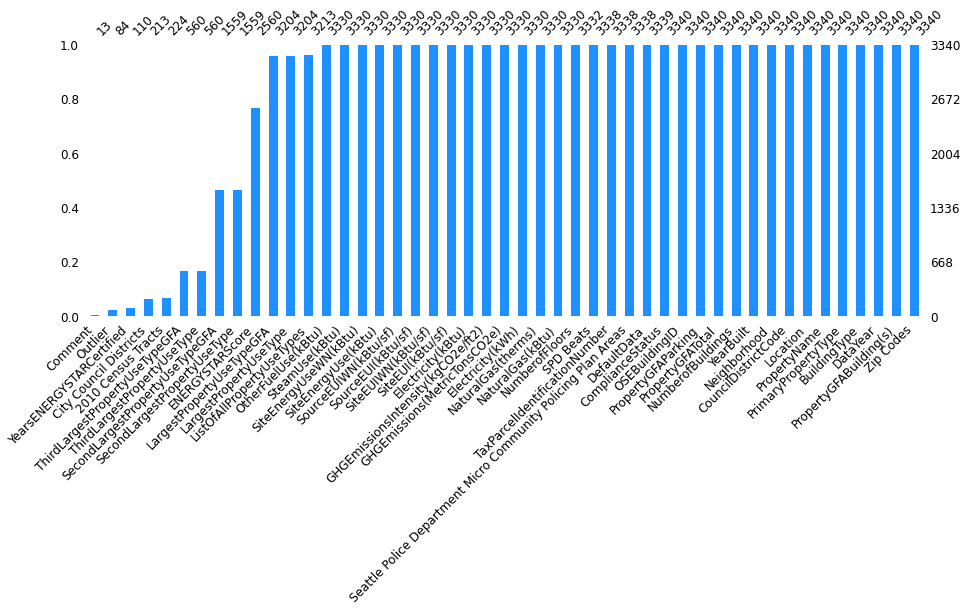

In [6]:
# Représentation graphique du taux de remplissage du jeu de données sous forme d'histogramme
msno.bar(data_2015, color="dodgerblue",sort="ascending", figsize=(15,5), fontsize=12)

<AxesSubplot:>

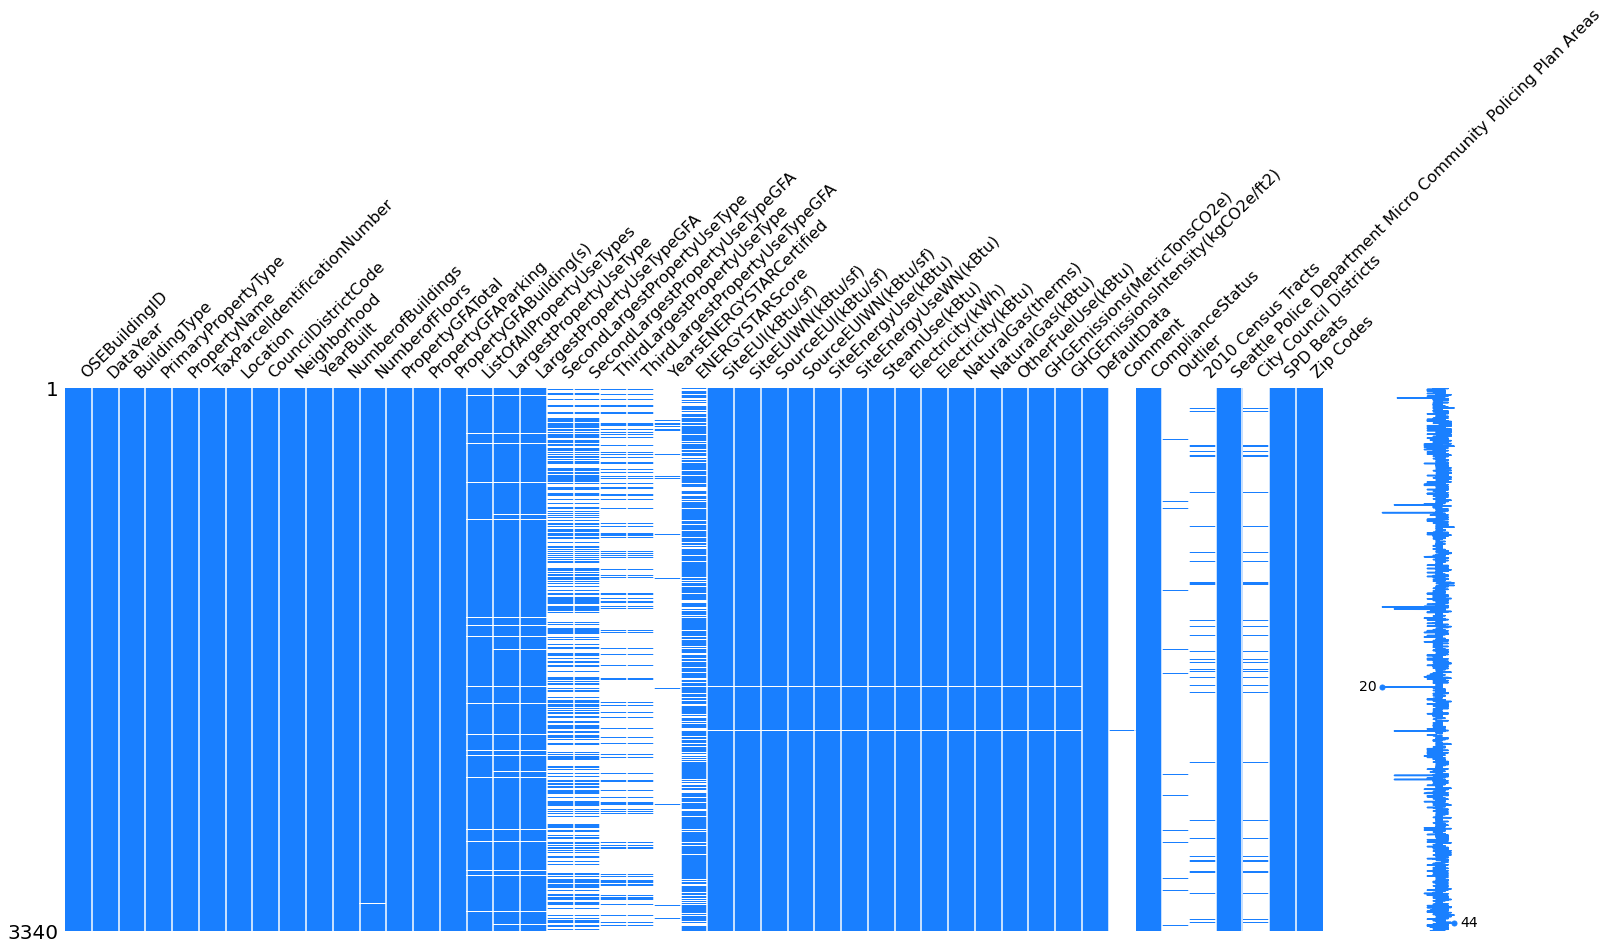

In [7]:
# Représentation graphique du taux de remplissage du jeu de données sous forme de matrice
msno.matrix(data_2015, color=(0.1,0.5,1))

Chaque ligne du jeu de données correspond à un bâtiment non-résidentiel et multi-familiaux de 20 000 pieds carrés ou plus.
Chaque colonne représente une caractérique du bâtiment:
- un identifiant attribué par la ville de Seattle
- son type
- l'usage principale, secondaire et tertiaire du batiment
- Informations sur sa localisation géographique: son adresse, quartier, latitude, longitude
- Informations sur la propriété: Années de construction, nombre de bâtiments, nombres d'étages, superficies
- ENERGY STAR: Année de la certification, score
- Informations sur la source et la consommation en énergie totale, en électricité, en gas naturel.
- Informations sur la production de gaz à effet de serre

Les deux représentations graphiques nous permettent de voir que la majorité des colonnes ne contiennent pas de valeur manquante. 
La matrice nous montre que certains bâtiments n'ont pas de d'information sur leur consommation en énergie. Ils seront supprimés du jeu de données lors du nettoyage.

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>

## <div class="alert alert-block alert-info"><a name="C22">2.2. Description du jeu de données pour 2016</a></div>

In [8]:
# Charger le jeu de données et visualiser les 5 premières lignes
data_2016 = pd.read_csv('2016_Building_Energy_Benchmarking.csv')
data_2016.head()

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2016  NonResidential               Hotel   
1              2      2016  NonResidential               Hotel   
2              3      2016  NonResidential               Hotel   
3              5      2016  NonResidential               Hotel   
4              8      2016  NonResidential               Hotel   

                  PropertyName          Address     City State  ZipCode  \
0         Mayflower park hotel    405 Olive way  Seattle    WA  98101.0   
1              Paramount Hotel  724 Pine street  Seattle    WA  98101.0   
2      5673-The Westin Seattle  1900 5th Avenue  Seattle    WA  98101.0   
3                    HOTEL MAX   620 STEWART ST  Seattle    WA  98101.0   
4  WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  Seattle    WA  98121.0   

  TaxParcelIdentificationNumber  ...  Electricity(kWh) Electricity(kBtu)  \
0                    0659000030  ...      1.156514e+06         3946027.0   
1                    0659000220  ...      9.504252e+05         3242851.0   
2                    0659000475  ...      1.451544e+07        49526664.0   
3                    0659000640  ...      8.115253e+05         2768924.0   
4                    0659000970  ...      1.573449e+06         5368607.0   

   NaturalGas(therms)  NaturalGas(kBtu)  DefaultData  Comments  \
0         12764.52930         1276453.0        False       NaN   
1         51450.81641         5145082.0        False       NaN   
2         14938.00000         1493800.0        False       NaN   
3         18112.13086         1811213.0        False       NaN   
4         88039.98438         8803998.0        False       NaN   

   ComplianceStatus  Outlier  TotalGHGEmissions  GHGEmissionsIntensity  
0         Compliant      NaN             249.98                   2.83  
1         Compliant      NaN             295.86                   2.86  
2         Compliant      NaN            2089.28                   2.19  
3         Compliant      NaN             286.43                   4.67  
4         Compliant      NaN             505.01                   2.88  

[5 rows x 46 columns]

In [9]:
# Connaitre la taille du jeu de données
print("Le jeu de données de 2016 se compose de", data_2016.shape[0], "lignes et de", data_2016.shape[1], "colonnes")

Le jeu de données de 2016 se compose de 3376 lignes et de 46 colonnes


In [10]:
# Connaitre le nombre de valeurs manquantes par variable
data_2016.isnull().sum()

OSEBuildingID                         0
DataYear                              0
BuildingType                          0
PrimaryPropertyType                   0
PropertyName                          0
Address                               0
City                                  0
State                                 0
ZipCode                              16
TaxParcelIdentificationNumber         0
CouncilDistrictCode                   0
Neighborhood                          0
Latitude                              0
Longitude                             0
YearBuilt                             0
NumberofBuildings                     8
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
ListOfAllPropertyUseTypes             9
LargestPropertyUseType               20
LargestPropertyUseTypeGFA            20
SecondLargestPropertyUseType       1697
SecondLargestPropertyUseTypeGFA    1697


<AxesSubplot:>

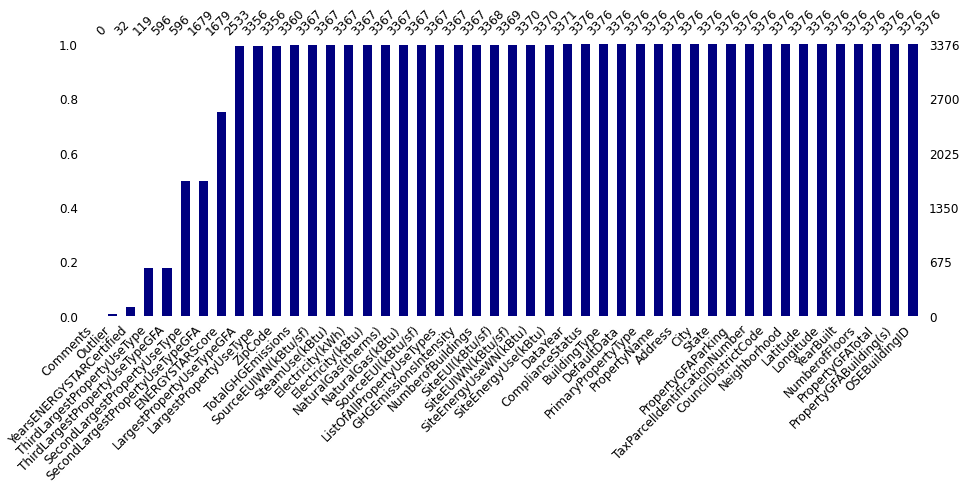

In [11]:
# Représentation graphique du taux de remplissage du jeu de données sous forme d'histogramme
msno.bar(data_2016, color="navy",sort="ascending", figsize=(15,5), fontsize=12)

<AxesSubplot:>

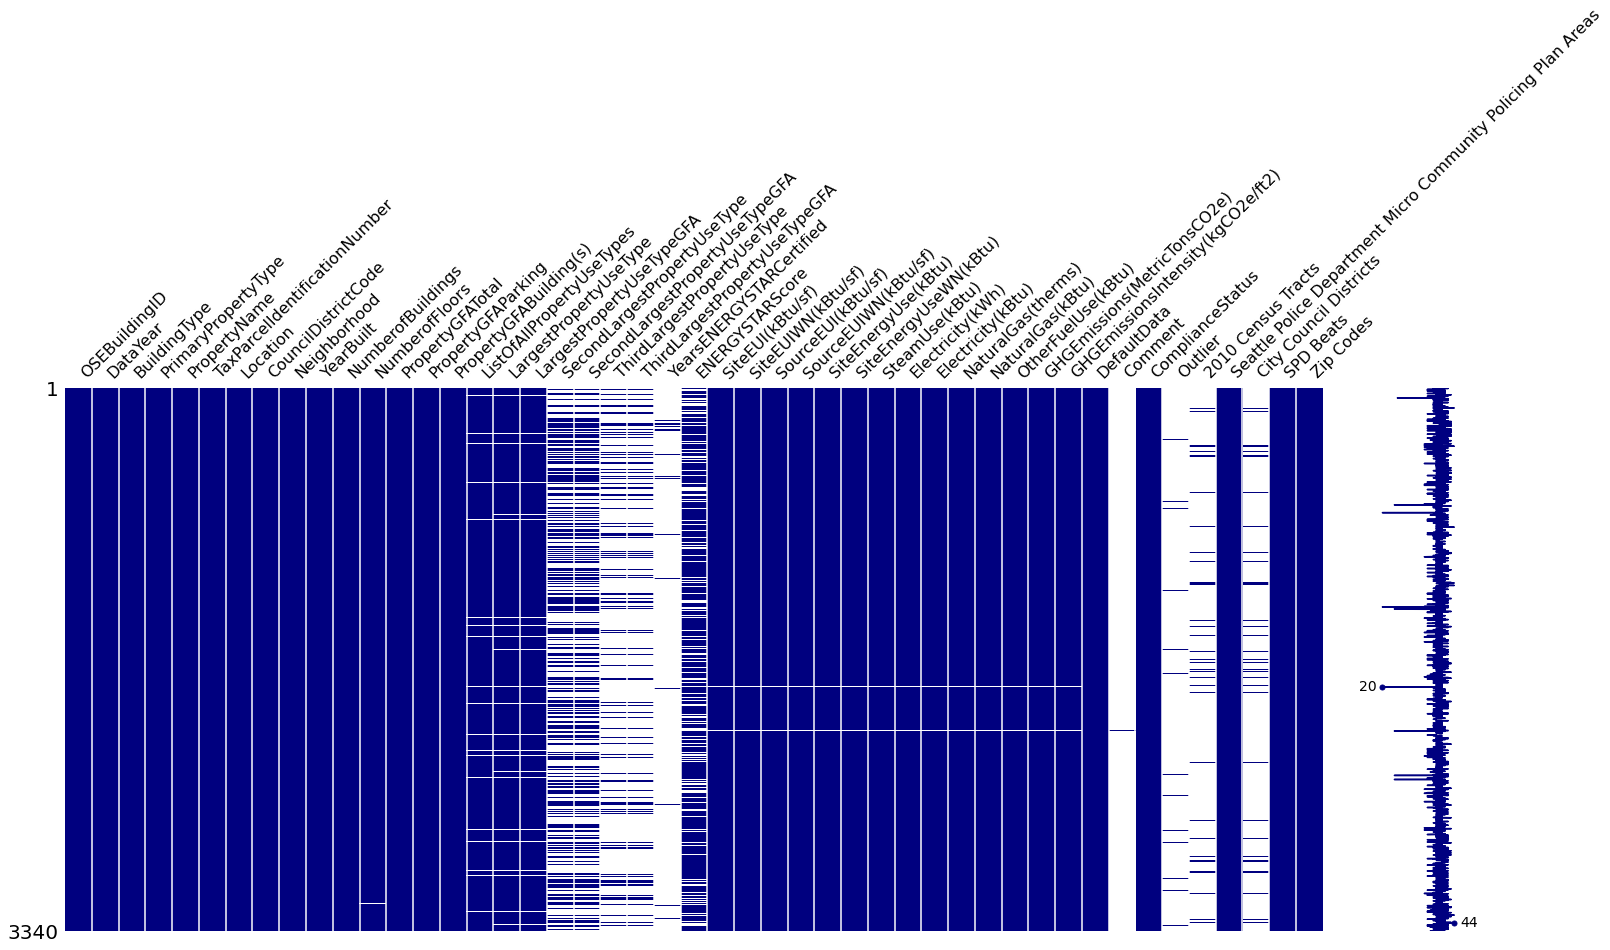

In [12]:
# Représentation graphique du taux de remplissage du jeu de données sous forme de matrice
msno.matrix(data_2015, color=(0,0,0.5))

Ce jeu de données pour 2016 est très semblable à celui de 2015.

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>

## <div class="alert alert-block alert-info"><a name="C23">2.3. Comparaison des 2 jeux de données</a></div>

Le but de cette partie est de savoir si les 2 jeux de données se composent des mêmes variables et des mêmes bâtiments.

### <div class="alert alert-block alert-info"><a name="C231">2.3.1. Ces 2 jeux de données contiennent-ils les mêmes variables? </a></div>

Pour répondre à cette question, il s'agira de voir si les mêmes colonnes sont présentes dans les 2 jeux de données. Si ce n'est pas le cas, il faudra identifier les colonnes qui sont différentes.


In [13]:
# Le nom des colonnes est-il le même dans les 2 jeux de données?
noms_colonnes_2015 = data_2015.columns
noms_colonnes_2016 = data_2016.columns
colonne_que_dans_2015 = list(set(noms_colonnes_2015) - set(noms_colonnes_2016))

if len(colonne_que_dans_2015) != 0:
    print("Il y a", len(colonne_que_dans_2015),
          "colonnes uniquement présentes dans le jeu de données de 2015")
    print("Ces colonnes sont:")
    for col in colonne_que_dans_2015:
        print("-", col)
else:
    print("Toutes les colonnes présentent dans le jeu de données de 2015 sont dans le jeu de données de 2016")

Il y a 10 colonnes uniquement présentes dans le jeu de données de 2015
Ces colonnes sont:
- City Council Districts
- GHGEmissions(MetricTonsCO2e)
- OtherFuelUse(kBtu)
- Comment
- 2010 Census Tracts
- SPD Beats
- Location
- Seattle Police Department Micro Community Policing Plan Areas
- GHGEmissionsIntensity(kgCO2e/ft2)
- Zip Codes


In [14]:
colonne_que_dans_2016 = list(set(noms_colonnes_2016) - set(noms_colonnes_2015))

if len(colonne_que_dans_2016) != 0:
    print("Il y a", len(colonne_que_dans_2016),
          "colonnes uniquement présentes dans le jeu de données de 2016")
    print("Ces colonnes sont:")
    for col in colonne_que_dans_2016:
        print("-", col)
else:
    print("Toutes les colonnes présentent dans le jeu de données de 2016 sont dans le jeu de données de 2015")

Il y a 9 colonnes uniquement présentes dans le jeu de données de 2016
Ces colonnes sont:
- TotalGHGEmissions
- City
- Longitude
- State
- ZipCode
- Comments
- Address
- Latitude
- GHGEmissionsIntensity


Ces différences sont-elles du à un changement du nom de la colonne?

**La variable GHGEmissions(MetricTonsCO2e) de 2015 correspond-elle à la variable 'TotalGHGEmissions' de 2016?**<br>
D'après les définitions fournies sur le site de la ville de Seattle, c'est ce qu'il semblerait. Vérifions que ces variables soient similaires.

In [15]:
des_2015 = data_2015['GHGEmissions(MetricTonsCO2e)'].describe()
des_2016 = data_2016['TotalGHGEmissions'].describe()
des = pd.DataFrame((des_2015,des_2016))
des

count        mean         std  min    25%  \
GHGEmissions(MetricTonsCO2e)  3330.0  110.094102  409.450179  0.0  9.265   
TotalGHGEmissions             3367.0  119.723971  538.832227 -0.8  9.495   

                                50%      75%       max  
GHGEmissions(MetricTonsCO2e)  32.74  88.6425  11824.89  
TotalGHGEmissions             33.92  93.9400  16870.98

Ces deux variables sont dans le même ordre de grandeur ce qui semble confirmer qu'elles correspondent à la même chose. Je vais donc renommer celle de 2015 de la même manière que dans le jeu de données de 2016.

In [16]:
data_2015_modif = data_2015.copy()
data_2015_modif.rename(columns = {'GHGEmissions(MetricTonsCO2e)':'TotalGHGEmissions'}, inplace = True)

**La variable GHGEmissionsIntensity(kgCO2e/ft2) de 2015 correspond-elle à la variable 'GHGEmissionsIntensity' de 2016?**<br>
D'après les définitions fournies sur le site de la ville de Seattle, c'est ce qu'il semblerait. Vérifions que ces variables soient similaires.

In [17]:
des2_2015 = data_2015['GHGEmissionsIntensity(kgCO2e/ft2)'].describe()
des2_2016 = data_2016['GHGEmissionsIntensity'].describe()
des2 = pd.DataFrame((des2_2015,des2_2016))
des2

count      mean       std   min   25%  \
GHGEmissionsIntensity(kgCO2e/ft2)  3330.0  0.985339  1.637172  0.00  0.08   
GHGEmissionsIntensity              3367.0  1.175916  1.821452 -0.02  0.21   

                                    50%   75%    max  
GHGEmissionsIntensity(kgCO2e/ft2)  0.46  1.18  31.38  
GHGEmissionsIntensity              0.61  1.37  34.09

Ces deux variables sont dans le même ordre de grandeur ce qui semble confirmer qu'elles correspondent à la même chose. Je vais donc renommer celle de 2015 de la même manière que dans le jeu de données de 2016.

In [18]:
data_2015_modif.rename(columns = {'GHGEmissionsIntensity(kgCO2e/ft2)':'GHGEmissionsIntensity'}, inplace = True)

**La variable 'Comment' de 2015 correspond-elle à la variable 'Comments' de 2016?**<br>


In [19]:
print("Nombre de valeurs manquantes pour 'Comment' de 2015:", 
      data_2015['Comment'].isnull().sum(),
      "soit", data_2015['Comment'].isnull().sum()*100/data_2015.shape[0], "%")

print("Nombre de valeurs manquantes pour 'Comments' de 2016:", 
      data_2016['Comments'].isnull().sum(),
      "soit", data_2016['Comments'].isnull().sum()*100/data_2016.shape[0], "%")

Nombre de valeurs manquantes pour 'Comment' de 2015: 3327 soit 99.61077844311377 %
Nombre de valeurs manquantes pour 'Comments' de 2016: 3376 soit 100.0 %


In [20]:
# Lorsqu'elle est informée à quoi ressemble la variable 'Comment' de 2015
data_2015['Comment'].loc[data_2015['Comment'].notnull()]

62      Under construction starting 6/2013 (old buildi...
436     Part of McKinstry's campus, property operates ...
437     One of two office buildings on McKinstry's cam...
595     Part of McKinstry’s campus, this remodeled war...
719     Construction completed in mid 2015. The buildi...
1358    Under construction starting 6/2013 (old buildi...
1360    Under construction starting 6/2013 (old buildi...
1373    Under construction starting 6/2015 (old buildi...
2108    Under construction starting 09/2014 (old build...
2230    Part of McKinstry's campus, the office space f...
2319    Part of McKinstry's campus, property includes ...
2381    Property now has two buildings: Thornton Creek...
2641    Recent energy efficiency upgrades include repl...
Name: Comment, dtype: object

Cette variable est très peu renseignées et correspond à des informations pouvant expliquer une consommation atypique d'énergie. Pour le projet, je choisi supprimer les bâtiments correspondant. Puis les variables, 'comment' de 2015 et 'comments' de 2016 seront supprimés.

In [21]:
liste_index = data_2015['Comment'].index[data_2015['Comment'].notnull()]
data_2015_modif.drop(liste_index, inplace=True)
data_2015_modif.shape

(3327, 47)

**A quoi correspond la variable 'Location' dans les données de 2015?**

In [22]:
data_2015_modif['Location'][0]

'{\'latitude\': \'47.61219025\', \'longitude\': \'-122.33799744\', \'human_address\': \'{"address": "405 OLIVE WAY", "city": "SEATTLE", "state": "WA", "zip": "98101"}\'}'

Elle regroupe les informations sur la latitude, la longitude, l'adresse, l'état et le code zip.<br>
Dans le jeu de données de 2016, ces informations sont séparées en différentes variables. Pour harmoniser les 2 jeux de données, je vais séparer les différentes informations de la variable Location.

In [23]:
data_location = data_2015_modif['Location'].str.split(r"\,|:", expand=True)
data_location.head()

0               1             2                 3   \
0  {'latitude'   '47.61219025'   'longitude'   '-122.33799744'   
1  {'latitude'   '47.61310583'   'longitude'   '-122.33335756'   
2  {'latitude'   '47.61334897'   'longitude'   '-122.33769944'   
3  {'latitude'   '47.61421585'   'longitude'   '-122.33660889'   
4  {'latitude'    '47.6137544'   'longitude'    '-122.3409238'   

                 4             5                  6        7           8   \
0   'human_address'   '{"address"    "405 OLIVE WAY"   "city"   "SEATTLE"   
1   'human_address'   '{"address"      "724 PINE ST"   "city"   "SEATTLE"   
2   'human_address'   '{"address"     "1900 5TH AVE"   "city"   "SEATTLE"   
3   'human_address'   '{"address"   "620 STEWART ST"   "city"   "SEATTLE"   
4   'human_address'   '{"address"    "401 LENORA ST"   "city"   "SEATTLE"   

         9      10      11           12  
0   "state"   "WA"   "zip"   "98101"}'}  
1   "state"   "WA"   "zip"   "98101"}'}  
2   "state"   "WA"   "zip"   "98101"}'}  
3   "state"   "WA"   "zip"   "98101"}'}  
4   "state"   "WA"   "zip"   "98121"}'}

In [24]:
# Suppresion des colonnes inutiles: 0, 2,4,5,7,9,11
data_location.drop(data_location.columns[[0,2,4,5,7,9,11]],
                   axis = 1, inplace=True)

# Renommer les colones 
data_location.columns = ['Latitude','Longitude','Address','City','State','ZipCode']
data_location.head()

Latitude         Longitude            Address        City  State  \
0   '47.61219025'   '-122.33799744'    "405 OLIVE WAY"   "SEATTLE"   "WA"   
1   '47.61310583'   '-122.33335756'      "724 PINE ST"   "SEATTLE"   "WA"   
2   '47.61334897'   '-122.33769944'     "1900 5TH AVE"   "SEATTLE"   "WA"   
3   '47.61421585'   '-122.33660889'   "620 STEWART ST"   "SEATTLE"   "WA"   
4    '47.6137544'    '-122.3409238'    "401 LENORA ST"   "SEATTLE"   "WA"   

       ZipCode  
0   "98101"}'}  
1   "98101"}'}  
2   "98101"}'}  
3   "98101"}'}  
4   "98121"}'}

In [25]:
# Suppression des caractéres spéciaux
col_location = data_location.columns
for col in col_location:
    data_location[col]=data_location[col].str[2:]
    data_location[col]=data_location[col].str[:-1]
    
data_location['ZipCode']=data_location['ZipCode'].str[:-3]
data_location.head()

Latitude      Longitude         Address     City State ZipCode
0  47.61219025  -122.33799744   405 OLIVE WAY  SEATTLE    WA   98101
1  47.61310583  -122.33335756     724 PINE ST  SEATTLE    WA   98101
2  47.61334897  -122.33769944    1900 5TH AVE  SEATTLE    WA   98101
3  47.61421585  -122.33660889  620 STEWART ST  SEATTLE    WA   98101
4   47.6137544   -122.3409238   401 LENORA ST  SEATTLE    WA   98121

In [26]:
# Intégration du jeu data_location au jeu de 2015
data_2015_modif = pd.concat([data_2015_modif, data_location], axis = 1)

**A quoi correspond la variable 'City Council Districts' présente dans le jeu de données de 2015 mais pas dans celui de 2016?**


In [27]:
print("Nombre de valeurs manquantes pour 'City Council Districts' de 2015:", 
      data_2015['City Council Districts'].isnull().sum(),
      "soit", data_2015['City Council Districts'].isnull().sum()*100/data_2015.shape[0], "%")
print("Les valeurs possibles sont:", data_2015['City Council Districts'].unique())

Nombre de valeurs manquantes pour 'City Council Districts' de 2015: 3127 soit 93.62275449101796 %
Les valeurs possibles sont: [nan  1.  2.]


Cette variable est peu renseignée et ne présente pas d'intérêt pour le projet: elle va être supprimée.

**A quoi correspond la variable 'Seattle Police Department Micro Community Policing Plan Areas' présente dans le jeu de données de 2015 mais pas dans celui de 2016?**


In [28]:
print("Nombre de valeurs manquantes pour 'Seattle Police Department Micro Community Policing Plan Areas' de 2015:", 
      data_2015['Seattle Police Department Micro Community Policing Plan Areas'].isnull().sum(),
      "soit", data_2015['Seattle Police Department Micro Community Policing Plan Areas'].isnull().sum()*100/data_2015.shape[0], "%")

print("Les valeurs possibles sont:", data_2015['Seattle Police Department Micro Community Policing Plan Areas'].unique())

Nombre de valeurs manquantes pour 'Seattle Police Department Micro Community Policing Plan Areas' de 2015: 2 soit 0.059880239520958084 %
Les valeurs possibles sont: [14. 56. 30. 60. 19. 35. 29. 50. 61. 53. 58. 33.  4. 42.  5. 36.  9.  1.
  6. 54.  8. 48. 38. 11. 46. 20. 27. 45. 55. 52. 32. 40. 23. 22.  3. 15.
 51. 28.  7. 37. 49. 57. 13. 59. 24. 25. 41. 39. 34. 17. 10. 43. 12. 47.
  2. 16. 44. 31. 18. 26. 21. nan]


Cette variable permet de différencier des zones de Seattle en fonction de leur département de police. Ayant d'autres variables pour découper géographiquement la ville telles que le code postale et le nom du quartier, cette variable sera supprimée du jeu de données.

**A quoi correspond la variable 'OtherFuelUse(kBtu)' présente dans le jeu de données de 2015 mais pas dans celui de 2016?**

In [29]:
print("Nombre de valeurs manquantes pour 'OtherFuelUse(kBtu)' de 2015:", 
      data_2015['OtherFuelUse(kBtu)'].isnull().sum(),
      "soit", data_2015['OtherFuelUse(kBtu)'].isnull().sum()*100/data_2015.shape[0], "%")
print("Les valeurs possibles sont:",data_2015['OtherFuelUse(kBtu)'].unique() )

Nombre de valeurs manquantes pour 'OtherFuelUse(kBtu)' de 2015: 10 soit 0.2994011976047904 %
Les valeurs possibles sont: [0.000000e+00          nan 6.464408e+06 1.778490e+05 8.269669e+06
 3.379520e+05 2.944419e+06 2.304567e+06 1.552700e+04 5.470000e+02
 1.255100e+04 1.943011e+06 4.279380e+05 1.459440e+05 2.299420e+05
 5.596000e+03 1.431340e+05 1.780940e+05 1.827150e+05]


Cette variable est bien renseignée (seulement 10 valeurs manquantes) et correspond à une consommation d'énergie. Je souhaite donc la garder. Comme elle n'a pas d'équivalent dans le jeu de données de 2016, je vais y créer une variable 'OtherFuelUse(kBtu)' avec que des valeurs null.

In [30]:
data_2016_modif = data_2016.copy()
data_2016_modif['OtherFuelUse(kBtu)'] = np.nan

**A quoi correspond la variable 'Zip Codes' présente dans le jeu de données de 2015 mais pas dans celui de 2016?**

In [31]:
print("Nombre de valeurs manquantes pour 'Zip Codes' de 2015:", 
      data_2015['Zip Codes'].isnull().sum(),
      "soit", data_2015['Zip Codes'].isnull().sum()*100/data_2015.shape[0], "%")

print("Les valeurs possibles sont:", data_2015['Zip Codes'].unique())

Nombre de valeurs manquantes pour 'Zip Codes' de 2015: 0 soit 0.0 %
Les valeurs possibles sont: [18081 19576 18379 18800 18383 18789 19579 18390 18377 18235 18792 18386
 17919 19575 19578 19581 19582 17920 18385 18388 19584 18798 17916 18795
 17923 17926 18229 18376 18230]


Ces codes ne correspondent pas aux codes postaux de la ville de Seattle qui ont tous le format 98XXX. Ne sachant pas à quoi correspond cette variable et celle-ci n'étant pas présente dans le jeu de données de 2016, je choisi de la supprimer.

**A quoi correspond la variable '2010 Census Tracts' présente dans le jeu de données de 2015 mais pas dans celui de 2016?**

In [32]:
print("Nombre de valeurs manquantes pour '2010 Census Tracts' de 2015:", 
      data_2015['2010 Census Tracts'].isnull().sum(),
      "soit", data_2015['2010 Census Tracts'].isnull().sum()*100/data_2015.shape[0], "%")

print("Les valeurs possibles sont:", data_2015['2010 Census Tracts'].unique())

Nombre de valeurs manquantes pour '2010 Census Tracts' de 2015: 3116 soit 93.2934131736527 %
Les valeurs possibles sont: [ nan 124. 116. 123. 134. 131. 127. 117. 129. 135. 119. 118. 122. 125.]


Ne sachant pas à quoi correspond cette variable, celle-ci étant peu renseignée et n'étant pas présente dans le jeu de données de 2016, je choisi de la supprimer.

**A quoi correspond la variable 'SPD Beats' présente dans le jeu de données de 2015 mais pas dans celui de 2016?**

In [33]:
print("Nombre de valeurs manquantes pour 'SPD Beats' de 2015:", 
      data_2015['SPD Beats'].isnull().sum(),
      "soit", data_2015['SPD Beats'].isnull().sum()*100/data_2015.shape[0], "%")

print("Les valeurs possibles sont:", data_2015['SPD Beats'].unique())

Nombre de valeurs manquantes pour 'SPD Beats' de 2015: 2 soit 0.059880239520958084 %
Les valeurs possibles sont: [31.  7. 19. 20. 43. 38. 12. 10.  6. 29. 39.  3. 48. 37. 27.  1. 41. 25.
  9. 24. 30. 40. 17. 50. 32. 51. 13. 42. 47. 33.  2. 22. 11. 46.  8. 44.
 16. 23. 28. 34. 45. 21. 36. 14. 18. 49. 15. 26. 35.  5.  4. nan]


Ne sachant pas à quoi correspond cette variable, celle-ci n'étant pas présente dans le jeu de données de 2016, je choisi de la supprimer.

**Suppression des colonnes qui ne sont pas présentes dans les 2 jeux de données**

In [34]:
# Suppression des colonnes qui ne sont pas présentes dans les 2 jeux de données
col_2015 = data_2015_modif.columns
col_2016 = data_2016_modif.columns

for col in col_2015:
    if col not in col_2016:
        data_2015_modif = data_2015_modif.drop(col, axis = 1)

for col in col_2016:
    if col not in col_2015:
        data_2016_modif = data_2016_modif.drop(col, axis = 1)
    

if (set(list(data_2015_modif.columns)) == set(list(data_2016_modif))):
    print("Les colonnes sont les mêmes")
else:
    print("Il y a encore des colonnes qui diffèrent")

Les colonnes sont les mêmes


In [35]:
# Modification pour avoir les mêmes formats de variable dans les deux jeux de données
liste_colonnes_meme_format = []
for col in data_2015_modif.columns:
    if data_2015_modif[col].dtypes == data_2016_modif[col].dtypes:
        liste_colonnes_meme_format.append(col)
    if data_2015_modif[col].dtypes != data_2016_modif[col].dtypes:
        if data_2016_modif[col].dtypes == 'float64':
            try:
                data_2015_modif[col] = data_2015_modif[col].astype(float)
            except ValueError:
                data_2016_modif[col] = data_2016_modif[col].astype(str)
            
        if data_2016_modif[col].dtypes == 'int64':
            data_2015_modif[col] = data_2015_modif[col].astype(int,errors='ignore')
            
        if data_2016_modif[col].dtypes == 'object':   
            data_2015_modif[col] = data_2015_modif[col].astype(str)
        print("Pour la variable", col, ", le type a été changé en", data_2015_modif[col].dtypes)

Pour la variable NumberofBuildings , le type a été changé en float64
Pour la variable NumberofFloors , le type a été changé en float64
Pour la variable DefaultData , le type a été changé en object
Pour la variable Latitude , le type a été changé en float64
Pour la variable Longitude , le type a été changé en float64
Pour la variable ZipCode , le type a été changé en float64


A présent, les 2 jeux de données contiennent les mêmes variables et celles-ci sont de même type.

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>

### <div class="alert alert-block alert-info"><a name="C232">2.3.2. Ces 2 jeux de données correspondent-ils aux mêmes bâtiments?</a></div>

Pour répondre à cette question, il s'agit de voir si les mêmes 'OSEBuildingID' sont présents dans les 2 jeux de données.

In [36]:
# Vérification que tous les bâtiments aient bien un id
print('Nombre Id manquant en 2015 :', data_2015_modif['OSEBuildingID'].isnull().sum())
print('Nombre Id manquant en 2016 :', data_2016_modif['OSEBuildingID'].isnull().sum())

Nombre Id manquant en 2015 : 0
Nombre Id manquant en 2016 : 0


In [37]:
# Combien de bâtiments sont présents dans chaque jeu de données
print('Nombre de bâtiments répertorié en 2015:', data_2015_modif.shape[0])
print('Nombre de bâtiments répertorié en 2016:', data_2016_modif.shape[0])

Nombre de bâtiments répertorié en 2015: 3327
Nombre de bâtiments répertorié en 2016: 3376


In [38]:
# Combien de bâtiments sont présents en double dans chaque jeu de données
print('Nombre de bâtiments en double en 2015:', 
      len(data_2015_modif.loc[data_2015_modif['OSEBuildingID'].duplicated(keep=False),:]))
print('Nombre de bâtiments en double en 2016:',
     len(data_2016_modif.loc[data_2016_modif['OSEBuildingID'].duplicated(keep=False),:]))

Nombre de bâtiments en double en 2015: 0
Nombre de bâtiments en double en 2016: 0


In [39]:
# création de 2 listes qui contiennent les id pour 2015 et 2016, respectivement
liste_id_2015 = set(data_2015_modif['OSEBuildingID'])
liste_id_2016 = set(data_2016_modif['OSEBuildingID'])

# Chercher les éléments communs aux 2 listes
intersection = list(liste_id_2015 & liste_id_2016)
print("Nombre de bâtiment communs entre les 2 jeux de données:", len(intersection))

# Chercher les éléments spécifiques à 2015:
difference_2015 = list(liste_id_2015.difference(liste_id_2016))
print("Nombre de bâtiment uniquement présent pour 2015:",len(difference_2015))

# Chercher les éléments spécifiques à 2016:
difference_2016 = list(liste_id_2016.difference(liste_id_2015))
print("Nombre de bâtiment uniquement présent pour 2016:",len(difference_2016))
      
      

Nombre de bâtiment communs entre les 2 jeux de données: 3272
Nombre de bâtiment uniquement présent pour 2015: 55
Nombre de bâtiment uniquement présent pour 2016: 104


Pour les bâtiments ayant le même 'OSEBuildingID', correspondent-ils aux mêmes batiments dans les 2 jeux de données?

Pour répondre à cette question, je vais utiliser les variables 'PropertyName', 'Address' et 'YearBuilt'.

**Pour les 'OSEBuildingID' identiques**

In [40]:
# Harmoniser la 'case' des variables 'PropertyName' et 'Address'
data_2015_modif['PropertyName'] = data_2015_modif['PropertyName'].str.lower()
data_2016_modif['PropertyName'] = data_2016_modif['PropertyName'].str.lower()
data_2015_modif['Address'] = data_2015_modif['Address'].str.lower()
data_2016_modif['Address'] = data_2016_modif['Address'].str.lower()

In [41]:
# Créer des jeux de données qui contiennent les mêmes bâtiments pour 2015 et 2016
data_same_2015 = data_2015_modif[data_2015_modif['OSEBuildingID'].isin(intersection)] 
data_same_2016 = data_2016_modif[data_2016_modif['OSEBuildingID'].isin(intersection)] 

# Pour faciliter la comparaison, les index sont réinitialisé
data_same_2015.reset_index(drop=True, inplace=True)
data_same_2016.reset_index(drop=True, inplace=True)

In [42]:
# Création de listes avec les noms des bâtiments
liste_nom_prop_2015 = data_same_2015['PropertyName']
liste_nom_prop_2016 = data_same_2016['PropertyName']

liste_nom_different_2015 = []
liste_nom_different_2016 = []
liste_index_2015 = []
liste_index_2016 = []
liste_nom_similaire = []

for i in range(len(liste_nom_prop_2015)):  
    # Calcul de la similitude des noms des bâtiments entre 2015 et 2016
    fuzz_ratio = fuzz.partial_ratio(liste_nom_prop_2015[i].lower(),liste_nom_prop_2016[i].lower())
    
    # Si la similitude < 50%, le nom des bâtiments est considéré comme différent entre 2015 et 2016
    if fuzz_ratio < 50:
        liste_nom_different_2015.append(liste_nom_prop_2015[i])
        liste_nom_different_2016.append(liste_nom_prop_2016[i])
        liste_index_2015.append(i)
        liste_index_2016.append(i)
    # Si la similitude > 50%, le nom des bâtiments est considéré comme similaire entre 2015 et 2016
    else:
        liste_nom_similaire.append(liste_nom_prop_2015[i])
        
print("Nombre de bâtiment avec le même id et des noms identiques ou similaires:",len(liste_nom_similaire))
print("Nombre de bâtiment avec le même id mais des noms différents:",len(liste_nom_different_2015))
print("Nombre de bâtiment avec le même id mais des noms différents:",len(liste_nom_different_2016))

Nombre de bâtiment avec le même id et des noms identiques ou similaires: 1302
Nombre de bâtiment avec le même id mais des noms différents: 1970
Nombre de bâtiment avec le même id mais des noms différents: 1970


In [43]:
# Pour les bâtiments qui ont des noms très différents, ont-ils des adresses similaires et la même année de construction? 

data_nom_diff_2015 = data_same_2015.loc[liste_index_2015]
data_nom_diff_2016 = data_same_2015.loc[liste_index_2016]

data_nom_diff_2015.reset_index(drop=True, inplace=True)
data_nom_diff_2016.reset_index(drop=True, inplace=True)

liste_Address_prop_2015 = data_nom_diff_2015['Address']
liste_Address_prop_2016 = data_nom_diff_2016['Address']

liste_Address_different_2015 = []
liste_Address_different_2016 = []
liste_Address_index_2015 = []
liste_Address_index_2016 = []
liste_Address_similaire = []
for i in range(len(liste_Address_prop_2015)):  
    fuzz_ratio = fuzz.partial_ratio(liste_Address_prop_2015[i].lower(),liste_Address_prop_2016[i].lower())
    if fuzz_ratio != 100:
        liste_Address_different_2015.append(liste_Address_prop_2015[i])
        liste_Address_different_2016.append(liste_Address_prop_2016[i])
        liste_Address_index_2015.append(i)
        liste_Address_index_2016.append(i)
    else:
        liste_Address_similaire.append(liste_Address_prop_2015[i])
        
print("Nombre de bâtiment avec le même id et des Address identiques ou similaires:",len(liste_Address_similaire))
print("Nombre de bâtiment avec le même id mais des Address différents:",len(liste_Address_different_2015))
print("Nombre de bâtiment avec le même id mais des Address différents:",len(liste_Address_different_2016))

print("Nombre de bâtiment avec le même id mais une année de construction différentes est:",
      len(data_nom_diff_2015.loc[(data_nom_diff_2015['YearBuilt']!=data_nom_diff_2016['YearBuilt'])]))

Nombre de bâtiment avec le même id et des Address identiques ou similaires: 1970
Nombre de bâtiment avec le même id mais des Address différents: 0
Nombre de bâtiment avec le même id mais des Address différents: 0
Nombre de bâtiment avec le même id mais une année de construction différentes est: 0


Les 3272 bâtiments dont les id sont communs aux 2 jeux de données semblent correspondre aux mêmes bâtiments. Nous avons donc un suivi sur deux années consécutives pour la majorité des bâtiments.

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>

### <div class="alert alert-block alert-info"><a name="C233">2.3.3. Obtention d'un unique jeu de données</a></div>

Pour obtenir un unique jeu de données, je choisi de faire une concaténation. Les batiments présents dans les 2 jeux de données apparaiteront sur 2 lignes (une pour 2015 et une pour 2016).

In [44]:
data = pd.concat([data_2015_modif,data_2016_modif], axis = 0).sort_values([ "OSEBuildingID","DataYear",])
print(data.shape)
data.head()

(6703, 46)


OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2015  NonResidential               Hotel   
0              1      2016  NonResidential               Hotel   
1              2      2015  NonResidential               Hotel   
1              2      2016  NonResidential               Hotel   
2              3      2015  NonResidential               Hotel   

           PropertyName TaxParcelIdentificationNumber  CouncilDistrictCode  \
0  mayflower park hotel                     659000030                    7   
0  mayflower park hotel                    0659000030                    7   
1       paramount hotel                     659000220                    7   
1       paramount hotel                    0659000220                    7   
2          westin hotel                     659000475                    7   

  Neighborhood  YearBuilt  NumberofBuildings  ...  GHGEmissionsIntensity  \
0     DOWNTOWN       1927                1.0  ...                   2.64   
0     DOWNTOWN       1927                1.0  ...                   2.83   
1     DOWNTOWN       1996                1.0  ...                   2.38   
1     DOWNTOWN       1996                1.0  ...                   2.86   
2     DOWNTOWN       1969                1.0  ...                   1.92   

   DefaultData  ComplianceStatus  Outlier   Latitude   Longitude  \
0           No         Compliant      NaN  47.612190 -122.337997   
0        False         Compliant      NaN  47.612200 -122.337990   
1           No         Compliant      NaN  47.613106 -122.333358   
1        False         Compliant      NaN  47.613170 -122.333930   
2          Yes         Compliant      NaN  47.613349 -122.337699   

           Address     City  State  ZipCode  
0    405 olive way  SEATTLE     WA  98101.0  
0    405 olive way  Seattle     WA  98101.0  
1      724 pine st  SEATTLE     WA  98101.0  
1  724 pine street  Seattle     WA  98101.0  
2     1900 5th ave  SEATTLE     WA  98101.0  

[5 rows x 46 columns]

In [45]:
data.reset_index(drop=True,inplace=True)

<AxesSubplot:>

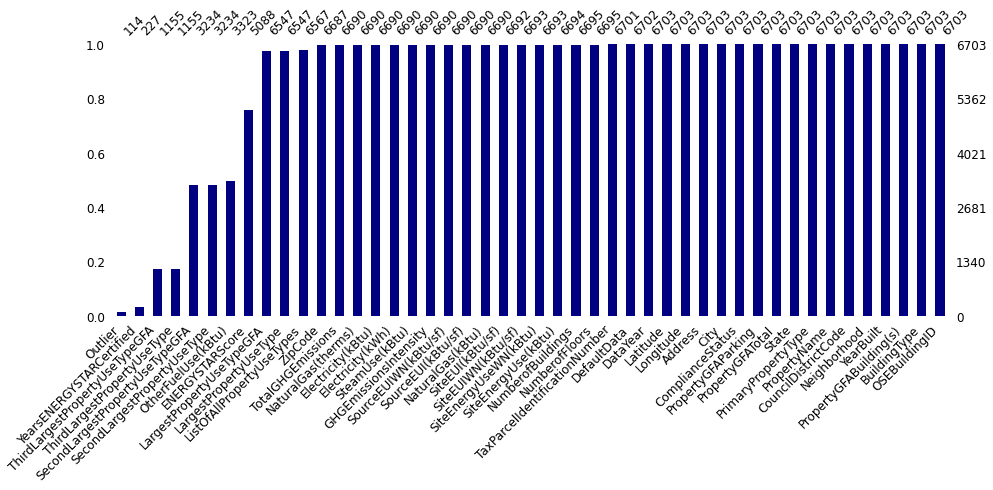

In [46]:
# Représentation graphique du taux de remplissage du jeu de données sous forme d'histogramme
msno.bar(data, color="navy",sort="ascending", figsize=(15,5), fontsize=12)

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>

# <div class="alert alert-block alert-info"><a name="C3">3. Nettoyage du jeu de données</a></div>

Pour le nettoyage du jeu de données, je vais procéder en différentes étapes:
- Suppression des batiments à usage d'habitation
- Vérification des variables concernant la localisation géographique des bâtiments
- Vérification des variables concernant la consommation énergétique des bâtiments
- Vérification des variables concernant l'émission de CO2
- Vérification des données déclaratives du permis d'exploitation



<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>

## <div class="alert alert-block alert-info"><a name="C31">3.1. Sélection selon la catégorie des bâtiments</a></div>

Le but de cette sélection est de ne conserver que les bâtiments qui sont non destinés à l'habitation.
L'usage des bâtiments est indiqué dans la variable 'BuildingType'

A quoi ressemble cette variable? Nous permet-elle de ne garder que les bâtimes non destinés à l'habitation?

In [47]:
print("Nombre de valeurs manquantes de la variable 'BuildingType:", data['BuildingType'].isnull().sum())

Nombre de valeurs manquantes de la variable 'BuildingType: 0


In [48]:
building_type = data['BuildingType'].unique()
print("Les différents types de bâtiments possibles sont:")
for x in building_type:
    print("-", x)

Les différents types de bâtiments possibles sont:
- NonResidential
- Nonresidential COS
- Multifamily MR (5-9)
- SPS-District K-12
- Campus
- Multifamily LR (1-4)
- Multifamily HR (10+)
- Nonresidential WA


En filtrant le jeu de données pour enlever les bâtiments 'Multifamily', il est possible de n'avoir que les bâtiments non destinés à l'habitation

In [49]:
data_non_residential = data[~data['BuildingType'].str.contains("Multifamily")]

print("Nombre de bâtiments non destinés à l'habitation:", data_non_residential.shape[0])
print("Les types de bâtiments présents dans le jeu de données sont:")
liste_type = data_non_residential['BuildingType'].unique()
for x in liste_type:
    print("-",x)

Nombre de bâtiments non destinés à l'habitation: 3306
Les types de bâtiments présents dans le jeu de données sont:
- NonResidential
- Nonresidential COS
- SPS-District K-12
- Campus
- Nonresidential WA


<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>

## <div class="alert alert-block alert-info"><a name="C32">3.2. Vérification des variables concernant la localisation géographique des bâtiments</a></div>

De nombreuses variables donnent des indications sur la localisation géographique des bâtiments:
- Council district code
- Neighboorhood
- Latitude and Longitude
- Address
- City
- State
- ZipCode


### <div class="alert alert-block alert-info"><a name="C321">3.2.1. Variable 'City'</a></div>

In [50]:
# Tout les bâtiments sont-ils localisés à Seattle
print("Villes possibles:", data_non_residential['City'].unique())
print("Nombre de valeurs manquantes:", data_non_residential['City'].isnull().sum())

Villes possibles: ['SEATTLE' 'Seattle']
Nombre de valeurs manquantes: 0


Tous les bâtiments sont situés à Seattle et il n'y a pas de valeur manquante. Comme cette variable a peu d'intérêt pour la suite du projet, je choisi de la supprimer du jeu de données

In [51]:
data_non_residential = data_non_residential.drop('City', axis=1)
data_non_residential.shape

(3306, 45)

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>
### <div class="alert alert-block alert-info"><a name="C322">3.2.2. Variable 'State'</a></div>

In [52]:
# Tout les bâtiments sont-ils localisés dans le même état
print("Etats possibles:", data_non_residential['State'].unique())
print("Nombre de valeurs manquantes:",data_non_residential['State'].isnull().sum())

Etats possibles: ['WA']
Nombre de valeurs manquantes: 0


Tous les bâtiments sont situés  dans le même état et il n'y a pas de valeur manquante. Comme cette variable a peu d'intérêt pour la suite du projet, je choisi de la supprimer du jeu de données

In [53]:
data_non_residential = data_non_residential.drop('State', axis=1)
data_non_residential.shape

(3306, 44)

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>
### <div class="alert alert-block alert-info"><a name="C323">3.2.3. Variable 'ZipCode'</a></div>

In [54]:
print("Zip Code possibles:", data_non_residential['ZipCode'].unique())
print("Nombre de valeurs manquantes:", data_non_residential['ZipCode'].isnull().sum())

Zip Code possibles: [98101. 98121. 98104. 98154. 98118. 98105. 98112. 98125. 98109. 98103.
 98070. 98108. 98199. 98115. 98107. 98144. 98119. 98136. 98122. 98126.
 98133. 98146. 98033. 98106. 98111. 98134. 98117. 98116. 98191. 98164.
 98195. 98185. 98177. 98181. 98102. 98168. 98155. 98006. 98124. 98053.
 98013. 98178. 98114. 98165. 98011. 98113. 98020. 98145.    nan]
Nombre de valeurs manquantes: 16


Il y a des valeurs manquantes pour le code postal. Je vais les remplacer par les codes postales correspondant.

In [55]:
zip_code_manquant = data_non_residential.index[data_non_residential['ZipCode'].isnull()]
zip_code_correspondant = (98125, 98118, 98117, 98125, 98107, 98117, 98119, 98112, 98122, 98118, 98126, 98108, 98104,98101,98117,98108) 


for index, nv_zip in zip(zip_code_manquant, zip_code_correspondant):
    data_non_residential.loc[[index],['ZipCode']] = nv_zip
    

Il faut également vérifier qu'il n'y a pas de valeurs aberrantes.

In [56]:
zip_code_officiel = (98101, 98102, 98103, 98104, 98105, 98106, 98107, 98108, 98109, 98110, 98111, 98112, 98114, 98115, 
98116, 98117, 98118, 98119, 98121, 98122, 98124, 98125, 98126, 98129, 98131, 98132, 98133, 98134, 
98136, 98138, 98144, 98145, 98146, 98148, 98151, 98154, 9815, 98158, 98160, 98161, 98164, 98166,
98168, 98170, 98171, 98174, 98177, 98178, 98181, 98184, 98185, 98188, 98190, 98191, 98195, 98198, 98199)

zip_code_data = data_non_residential['ZipCode'].unique()

check = any(item in zip_code_officiel for item in zip_code_data)

if check:
    print("Tous les zip codes du jeu de données sont possibles")
else:
    print("Il y a des zip codes aberrants")

Tous les zip codes du jeu de données sont possibles


<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>
### <div class="alert alert-block alert-info"><a name="C324">3.2.4. Variable 'Address'</a></div>

In [57]:
print("Nombre de valeurs manquantes:", data_non_residential['Address'].isnull().sum())

Nombre de valeurs manquantes: 0


Cette variable est bien renseignée.

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>
### <div class="alert alert-block alert-info"><a name="C325">3.2.5. Variables 'Longitude' et 'Latitude'</a></div>

In [58]:
print("Nombre de valeurs manquantes pour la longitude:", data_non_residential['Longitude'].isnull().sum())
print("Nombre de valeurs manquantes pour la latitude:", data_non_residential['Latitude'].isnull().sum())

Nombre de valeurs manquantes pour la longitude: 0
Nombre de valeurs manquantes pour la latitude: 0


Ces variables ne contiennent pas de valeur manquante. Pour vérifier si elles contiennent des valeurs aberrantes, je vais utiliser leur valeur pour localiser les bâtiments sur une carte de Seattle.

In [59]:
# Création d'une carte vide
my_map = folium.Map()

# Centrage de la carte sur la ville de Seattle en utilisant les valeurs moyennes de latitude et longitude données par Google
my_map = folium.Map(location=[47.6062095, -122.3320708],zoom_start=11)

# Affichage des bâtiments du jeu de données en fonction de leurs coordonnées
for i in range(0,len(data_non_residential)):
    folium.Circle([data_non_residential.iloc[i]['Latitude'],data_non_residential.iloc[i]['Longitude']], 
                      popup=data_non_residential.iloc[i]['Address'], radius =50).add_to(my_map)
    
    
my_map

Il ne parait pas y avoir de latitde et longitude aberrante.


<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>
### <div class="alert alert-block alert-info"><a name="C326">3.2.6. Variable 'Neighborhood'</a></div>

In [60]:
print("Nombre de valeurs manquantes:", data_non_residential['Neighborhood'].isnull().sum())
print("Noms de quartier possibles:", data_non_residential['Neighborhood'].unique())

Nombre de valeurs manquantes: 0
Noms de quartier possibles: ['DOWNTOWN' 'SOUTHEAST' 'NORTHEAST' 'EAST' 'CENTRAL' 'Central' 'NORTH'
 'MAGNOLIA / QUEEN ANNE' 'LAKE UNION' 'GREATER DUWAMISH' 'BALLARD'
 'NORTHWEST' 'SOUTHWEST' 'DELRIDGE' 'Ballard' 'North' 'Delridge'
 'Northwest' 'DELRIDGE NEIGHBORHOODS']


Il n'y a pas de valeur manquante mais les noms de chaque quartier peut apparaitre plusieurs fois avec des formats différents.

In [61]:
data_non_residential['Neighborhood'] = data_non_residential['Neighborhood'].str.capitalize()
print("Noms de quartier possibles:", data_non_residential['Neighborhood'].unique())

Noms de quartier possibles: ['Downtown' 'Southeast' 'Northeast' 'East' 'Central' 'North'
 'Magnolia / queen anne' 'Lake union' 'Greater duwamish' 'Ballard'
 'Northwest' 'Southwest' 'Delridge' 'Delridge neighborhoods']


In [62]:
data_non_residential['Neighborhood'] = data_non_residential['Neighborhood'].replace({'Delridge neighborhoods':'Delridge'})
print("Noms de quartier possibles:\n", data_non_residential['Neighborhood'].value_counts())

Noms de quartier possibles:
 Downtown                 728
Greater duwamish         681
Magnolia / queen anne    301
Lake union               296
Northeast                242
East                     242
Northwest                173
Ballard                  139
North                    130
Central                  109
Southeast                 92
Delridge                  92
Southwest                 81
Name: Neighborhood, dtype: int64


<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>
### <div class="alert alert-block alert-info"><a name="C327">3.2.7. Variable 'CouncilDistrictCode'</a></div>

In [63]:
print("Nombre de valeurs manquantes:", data_non_residential['CouncilDistrictCode'].isnull().sum())
print("Council district codes possibles:", data_non_residential['CouncilDistrictCode'].unique())

Nombre de valeurs manquantes: 0
Council district codes possibles: [7 3 2 4 5 6 1]


Cette variable n'a pas de valeur manquante et semble correctement renseignée.

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>
### <div class="alert alert-block alert-info"><a name="C328">3.2.8. Suppression de certaines variables</a></div>

Les variables concernant la localisation géographique des propriétés sont nombreuses. Certaines me paraissent déjà redondantes pour le projet. Je les supprime du jeu de données.

In [64]:
data_non_residential.shape

(3306, 44)

In [65]:
data_non_residential.drop(columns=['Address', 'Neighborhood'], inplace=True)

In [66]:
data_non_residential.shape

(3306, 42)

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>


## <div class="alert alert-block alert-info"><a name="C33">3.3. Vérification des variables concernant la consommation énergétique des bâtiments</a></div>

Les variables qui nous informent sur la consommation énergétique des bâtiments sont:
- SiteEUI(kBtu/sf): quantité annuelle d'énergie totale consommé en fonction de la surface
- SiteEUIWN(kBtu/sf): quantité annuelle d'énergie totale consommé en fonction de la surface normalisé par la météo
- SourceEUI(kBtu/sf): quantité annuelle d'énergie utilisée pour le fonctionnement du bâtiment en fonction de sa surface. Elle prend en compte toutes les pertes de transmission, de livraison et de production
- SourceEUIWN(kBtu/sf): quantité annuelle d'énergie utilisé pour le fonctionnement du bâtiment en fonction de sa surface normalisé par la météo
- SiteEnergyUse(kBtu): quantité annuelle d'énergie consommé par la propriété
- SiteEnergyUseWN(kBtu): quantité annuelle d'énergie consommé par la propriété normalisé par la météo
- SteamUse(kBtu): quantité annuellele d'énergie nécessaire pour chauffer l'eau circulant dans le bâtiment
- Electricity(kWh): quantité annuelle d'éléctricité consommé en kWh
- Electricity(kBtu): quantité annuelle d'électricité consommé en kBtu
- NaturalGas(therms): quantité annuelle de gaz naturel consommé en therms
- NaturalGas(kBtu): quantité annuelle de gaz naturel consommé en kBtu
- OtherFuelUse(kBtu): quantité d'énergie venant d'autre source consommé en kBtu
- YearsENERGYSTARCertified: année de réception du certificat ENERGYSTAR
- ENERGYSTARScore: score de l'ENERGYSTAR

On remarque que certaines de ces variables sont en présente deux fois mais avec des unités différentes. Nous allons chercher à savoir s'il est possible de supprimer une des versions.

Avant de procéder aux vérifications de ces variables, je vais vérifier qu'aucun bâtiment du jeu de données n'ait que des valeurs nan pour toutes ces variables.

In [67]:
data_energy = data_non_residential.copy()

In [68]:
variables_conso = ['SiteEUI(kBtu/sf)','SiteEUIWN(kBtu/sf)',
                   'SourceEUI(kBtu/sf)','SourceEUIWN(kBtu/sf)',
                   'SiteEnergyUse(kBtu)','SiteEnergyUseWN(kBtu)',
                   'SteamUse(kBtu)',
                   'Electricity(kWh)','Electricity(kBtu)',
                   'NaturalGas(therms)','NaturalGas(kBtu)',
                   'OtherFuelUse(kBtu)']

# Existe-t-il des bâtiments pour lesquelles toutes les variables sont des nan:
batiment_conso_nan = data_energy.index[(data_energy[variables_conso[0]].isnull())
                                        & (data_energy[variables_conso[1]].isnull())
                                        & (data_energy[variables_conso[2]].isnull())
                                        & (data_energy[variables_conso[3]].isnull())
                                        & (data_energy[variables_conso[4]].isnull())
                                        & (data_energy[variables_conso[5]].isnull())
                                        & (data_energy[variables_conso[6]].isnull())
                                        & (data_energy[variables_conso[7]].isnull())
                                        & (data_energy[variables_conso[8]].isnull())
                                        & (data_energy[variables_conso[9]].isnull())
                                        & (data_energy[variables_conso[10]].isnull())
                                        & (data_energy[variables_conso[11]].isnull())
                                       ]

print("Nombre de bâtiments dont toutes les informations sur leur consommation énergétique sont 0:",
      len(batiment_conso_nan))

Nombre de bâtiments dont toutes les informations sur leur consommation énergétique sont 0: 3


In [69]:
# Existe-t-il des bâtiments pour lesquelles toutes les variables sont des 0:
batiment_conso_null = data_energy.index[(data_energy[variables_conso[0]]==0.)
                                        & (data_energy[variables_conso[1]]==0.)
                                        & (data_energy[variables_conso[2]]==0.)
                                        & (data_energy[variables_conso[3]]==0.)
                                        & (data_energy[variables_conso[4]]==0.)
                                        & (data_energy[variables_conso[5]]==0.)
                                        & (data_energy[variables_conso[6]]==0.)
                                        & (data_energy[variables_conso[7]]==0.)
                                        & (data_energy[variables_conso[8]]==0.)
                                        & (data_energy[variables_conso[9]]==0.)
                                        & (data_energy[variables_conso[10]]==0.)
                                        & (data_energy[variables_conso[11]]==0.)
                                       ]

print("Nombre de bâtiments dont toutes les informations sur leur consommation énergétique sont 0:",
      len(batiment_conso_null))

Nombre de bâtiments dont toutes les informations sur leur consommation énergétique sont 0: 2


In [70]:
# Suppression de ces bâtiments
data_energy = data_energy.drop(batiment_conso_nan)
data_energy = data_energy.drop(batiment_conso_null)

### <div class="alert alert-block alert-info"><a name="C331">3.3.1. Variables 'SiteEUI(kBtu/sf)' et 'SiteEUIWN(kBtu/sf)'</a></div>

In [71]:
# Définition des variables à comparer
X1 = 'SiteEUI(kBtu/sf)'
X2 = 'SiteEUIWN(kBtu/sf)'

print("Pour la variable {variable} ".format(variable=X1))
print("------------------------------------")
print("Nombre de valeurs manquantes:", data_energy[X1].isnull().sum())
print(data_energy[X1].describe())
print("")
print("Pour la variable {variable} ".format(variable=X2))
print("------------------------------------")
print("  Nombre de valeurs manquantes:", data_energy[X2].isnull().sum())
print(data_energy[X2].describe())

Pour la variable SiteEUI(kBtu/sf) 
------------------------------------
Nombre de valeurs manquantes: 1
count    3300.000000
mean       71.676273
std        72.427381
min         0.000000
25%        33.200001
50%        51.700000
75%        81.724998
max       834.400024
Name: SiteEUI(kBtu/sf), dtype: float64

Pour la variable SiteEUIWN(kBtu/sf) 
------------------------------------
  Nombre de valeurs manquantes: 1
count    3300.000000
mean       74.890000
std        73.880227
min         0.000000
25%        35.900000
50%        54.799999
75%        86.199998
max       834.400024
Name: SiteEUIWN(kBtu/sf), dtype: float64


Les deux variables sont bien renseignées, et ont des valeurs qui sembles très proches. Je vais regarder pour voir si elles sont corrélées. Si tel est le cas, je supprimerais les valeurs normalisés

In [72]:
# Vérification de la corrélation entre les 2 variables
coeff_correlation = data_energy[[X1,X2]].corr()

print("Le coefficient de corrélation est:",coeff_correlation.iloc[0,1] )

if coeff_correlation.iloc[0,1] > 0.75:
    #Remplissage de la colonne 'SiteEUI(kBtu/sf)' par les valeurs de la colonne 'SiteEUIWN(kBtu/sf'
    data_energy.loc[(data_energy[X1].isnull()) & (data_energy[X2].notnull()),
                  [X1]] = data_energy[X2]
    print("Nombre de valeurs manquantes:", data_energy[X1].isnull().sum())
    # Suppression de 'SiteEUIWN(kBtu/sf)'
    data_energy.drop(columns=[X2], inplace = True)
else:
    print("Corrélation inférieure au seuil")

Le coefficient de corrélation est: 0.994538558302109
Nombre de valeurs manquantes: 0


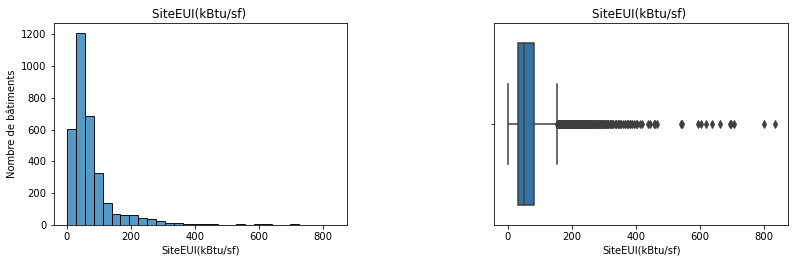

In [73]:
fig = plt.figure()
plt.gcf().subplots_adjust(left = 0.3, bottom = 0.3,
                       right = 2., top = 1, wspace = 0.5, hspace = 6)


ax1 = fig.add_subplot(1, 2, 1)
ax1 = sns.histplot(data=data_energy, x=X1,log_scale=False, bins=30)
ax1.set_title("{variable} ".format(variable=X1))
ax1.set_ylabel("Nombre de bâtiments")

ax2 = fig.add_subplot(1, 2,2)
ax2 = sns.boxplot(data=data_energy, x=X1)
ax2.set_title("{variable} ".format(variable=X1))
ax2.set_ylabel("")
plt.show()

plt.show()

**Traitement des valeurs aberrantes pour 'SiteEUI(kBtu/sf)'**<br>
La valeur minimale possible pour cette variable est 0. Ceci n'est pas cohérent.  

In [74]:
data_energy[['SiteEUI(kBtu/sf)','SourceEUI(kBtu/sf)',
             'SiteEnergyUse(kBtu)','Electricity(kBtu)','NaturalGas(kBtu)']].loc[data_energy['SiteEUI(kBtu/sf)']==0]

SiteEUI(kBtu/sf)  SourceEUI(kBtu/sf)  SiteEnergyUse(kBtu)  \
57                 0.0                 0.0                  0.0   
63                 0.0                 0.0                  0.0   
124                0.0                 0.0                  0.0   
162                0.0                 0.0                  0.0   
170                0.0                 0.0                  0.0   
190                0.0                 0.0                  0.0   
264                0.0                 0.0                  0.0   
276                0.0                 0.0                  0.0   
302                0.0                 0.0                  0.0   
609                0.0                 0.0                  0.0   
1226               0.0                 0.0                  0.0   
1257               0.0                 0.0                  0.0   
1495               0.0                 0.0                  0.0   
2724               0.0                 0.0                  0.0   
3797               0.0                 0.0                  0.0   
6361               0.0                 0.0                  0.0   

      Electricity(kBtu)  NaturalGas(kBtu)  
57                  0.0               0.0  
63            1496816.0               0.0  
124            600813.0               0.0  
162           1698176.0               0.0  
170           2347138.0               0.0  
190           2104286.0               0.0  
264                 0.0         4318917.0  
276                 0.0         3217877.0  
302                 0.0               0.0  
609                 0.0               0.0  
1226          1957268.0               0.0  
1257          1433596.0               0.0  
1495                0.0               0.0  
2724                0.0               0.0  
3797                0.0          945537.0  
6361                0.0         4993620.0

Les propriétés avec un 'SiteEUI' me semblent mal renseignées. Je préfère les supprimer du jeu de données

In [75]:
data_sans_EUI = data_energy.index[data_energy['SiteEUI(kBtu/sf)']==0]

data_energy.drop(index=data_sans_EUI, inplace=True)

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>
### <div class="alert alert-block alert-info"><a name="C332">3.3.2. Variables 'SourceEUI(kBtu/sf)' et 'SourceEUIWN(kBtu/sf)'</a></div>

In [76]:
# Définition des variables à comparer
X1 = 'SourceEUI(kBtu/sf)'
X2 = 'SourceEUIWN(kBtu/sf)'

print("Pour la variable {variable} ".format(variable=X1))
print("------------------------------------")
print("Nombre de valeurs manquantes:", data_energy[X1].isnull().sum())
print(data_energy[X1].describe())
print("")
print("Pour la variable {variable} ".format(variable=X2))
print("------------------------------------")
print("  Nombre de valeurs manquantes:", data_energy[X2].isnull().sum())
print(data_energy[X2].describe())

Pour la variable SourceEUI(kBtu/sf) 
------------------------------------
Nombre de valeurs manquantes: 0
count    3285.000000
mean      176.484292
std       180.946530
min        -2.000000
25%        77.000000
50%       131.700000
75%       206.200000
max      2620.000000
Name: SourceEUI(kBtu/sf), dtype: float64

Pour la variable SourceEUIWN(kBtu/sf) 
------------------------------------
  Nombre de valeurs manquantes: 0
count    3285.000000
mean      179.697808
std       180.775344
min        -2.100000
25%        81.300003
50%       135.300000
75%       208.899994
max      2620.000000
Name: SourceEUIWN(kBtu/sf), dtype: float64


Les deux variables sont bien renseignées, et ont des valeurs qui sembles très proches. Je vais regarder pour voir si elles sont corrélées. Si tel est le cas, je supprimerais les valeurs normalisés. De plus, une consommation d'énergie ne pouvant pas être négative, je vais vérifier ces valeurs.

In [77]:
# Vérification de la corrélation entre les 2 variables
coeff_correlation = data_energy[[X1,X2]].corr()

print("Le coefficient de corrélation est:",coeff_correlation.iloc[0,1] )

if coeff_correlation.iloc[0,1] > 0.75:
    #Remplissage de la colonne 'SiteEUI(kBtu/sf)' par les valeurs de la colonne 'SiteEUIWN(kBtu/sf'
    data_energy.loc[(data_energy[X1].isnull()) & (data_energy[X2].notnull()),
                  [X1]] = data_energy[X2]
    print("Nombre de valeurs manquantes:", data_energy[X1].isnull().sum())
    # Suppression de 'SiteEUIWN(kBtu/sf)'
    data_energy.drop(columns=[X2], inplace = True)
else:
    print("Corrélation inférieure au seuil")

Le coefficient de corrélation est: 0.9956891562233978
Nombre de valeurs manquantes: 0


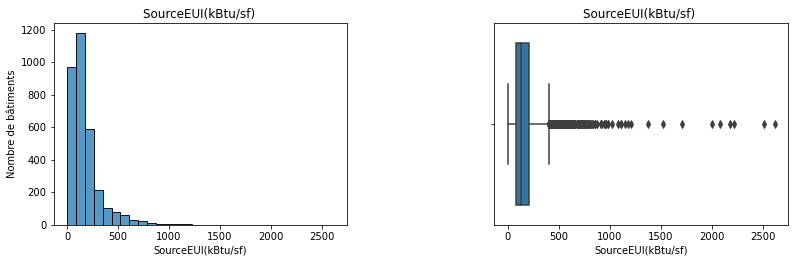

In [78]:
fig = plt.figure()
plt.gcf().subplots_adjust(left = 0.3, bottom = 0.3,
                       right = 2., top = 1, wspace = 0.5, hspace = 6)


ax1 = fig.add_subplot(1, 2, 1)
ax1 = sns.histplot(data=data_energy, x=X1,log_scale=False, bins=30)
ax1.set_title("{variable} ".format(variable=X1))
ax1.set_ylabel("Nombre de bâtiments")

ax2 = fig.add_subplot(1, 2,2)
ax2 = sns.boxplot(data=data_energy, x=X1)
ax2.set_title("{variable} ".format(variable=X1))
ax2.set_ylabel("")
plt.show()

plt.show()

**Traitement des valeurs aberrantes pour 'SourceEUI(kBtu/sf)'**

In [79]:
data_energy[['SiteEUI(kBtu/sf)','SourceEUI(kBtu/sf)',
             'SiteEnergyUse(kBtu)','Electricity(kBtu)','NaturalGas(kBtu)']].loc[data_energy['SourceEUI(kBtu/sf)']<=0]

SiteEUI(kBtu/sf)  SourceEUI(kBtu/sf)  SiteEnergyUse(kBtu)  \
1024        208.800003                 0.0           12525174.0   
5604         89.199997                 0.0            4729846.5   
6439         11.700000                -2.0             562479.0   

      Electricity(kBtu)  NaturalGas(kBtu)  
1024                0.0               0.0  
5604          1323792.0               0.0  
6439           562503.0               0.0

Pour l'instant, je laisse le jeu de donnée comme ca car les autres variables concernant la consommation d'énergie ne me semblent pas aberrantes. Je reviendrais sur ces valeurs si cette variable est utilisée pour la modélisation.

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>
### <div class="alert alert-block alert-info"><a name="C333">3.3.3. Variables 'SiteEnergyUse(kBtu)' et 'SiteEnergyUseWN(kBtu)'</a></div>

In [80]:
# Définition des variables à comparer
X1 = 'SiteEnergyUse(kBtu)'
X2 = 'SiteEnergyUseWN(kBtu)'

print("Pour la variable {variable} ".format(variable=X1))
print("------------------------------------")
print("Nombre de valeurs manquantes:", data_energy[X1].isnull().sum())
print(data_energy[X1].describe())
print("")
print("Pour la variable {variable} ".format(variable=X2))
print("------------------------------------")
print("  Nombre de valeurs manquantes:", data_energy[X2].isnull().sum())
print(data_energy[X2].describe())

Pour la variable SiteEnergyUse(kBtu) 
------------------------------------
Nombre de valeurs manquantes: 0
count    3.285000e+03
mean     8.121815e+06
std      2.533870e+07
min      1.144100e+04
25%      1.234149e+06
50%      2.539565e+06
75%      6.981428e+06
max      8.739237e+08
Name: SiteEnergyUse(kBtu), dtype: float64

Pour la variable SiteEnergyUseWN(kBtu) 
------------------------------------
  Nombre de valeurs manquantes: 1
count    3.284000e+03
mean     8.042890e+06
std      2.075246e+07
min      0.000000e+00
25%      1.341977e+06
50%      2.706284e+06
75%      7.250945e+06
max      4.716139e+08
Name: SiteEnergyUseWN(kBtu), dtype: float64


Les deux variables sont bien renseignées, et ont des valeurs qui sembles très proches. Je vais regarder pour voir si elles sont corrélées. Si tel est le cas, je supprimerais les valeurs normalisés.

In [81]:
# Vérification de la corrélation entre les 2 variables
coeff_correlation = data_energy[[X1,X2]].corr()

print("Le coefficient de corrélation est:",coeff_correlation.iloc[0,1] )

if coeff_correlation.iloc[0,1] > 0.75:
    #Remplissage de la colonne 'X1' par les valeurs de la colonne 'X2'
    data_energy.loc[(data_energy[X1].isnull()) & (data_energy[X2].notnull()),
                  [X1]] = data_energy[X2]
    print("Nombre de valeurs manquantes:", data_energy[X1].isnull().sum())
    # Suppression de X2)'
    data_energy.drop(columns=[X2], inplace = True)
else:
    print("Corrélation inférieure au seuil")

Le coefficient de corrélation est: 0.7949230534873332
Nombre de valeurs manquantes: 0


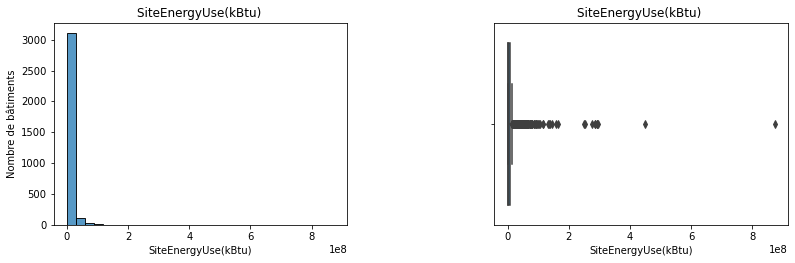

In [82]:
fig = plt.figure()
plt.gcf().subplots_adjust(left = 0.3, bottom = 0.3,
                       right = 2., top = 1, wspace = 0.5, hspace = 6)


ax1 = fig.add_subplot(1, 2, 1)
ax1 = sns.histplot(data=data_energy, x=X1,log_scale=False, bins=30)
ax1.set_title("{variable} ".format(variable=X1))
ax1.set_ylabel("Nombre de bâtiments")

ax2 = fig.add_subplot(1, 2,2)
ax2 = sns.boxplot(data=data_energy, x=X1)
ax2.set_title("{variable} ".format(variable=X1))
ax2.set_ylabel("")
plt.show()

plt.show()

L'échelle de cette variable ne me semble pas adéquate pour faire de la modélisation. Dans une prochaine partie, je la mettrais en log

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>
### <div class="alert alert-block alert-info"><a name="C334">3.3.4. Variables 'Electricity(kWh)' et 'Electricity(kBtu)'</a></div>

In [83]:
# Définition des variables à comparer
X1 = 'Electricity(kBtu)'
X2 = 'Electricity(kWh)'

print("Pour la variable {variable} ".format(variable=X1))
print("------------------------------------")
print("Nombre de valeurs manquantes:", data_energy[X1].isnull().sum())
print(data_energy[X1].describe())
print("")
print("Pour la variable {variable} ".format(variable=X2))
print("------------------------------------")
print("  Nombre de valeurs manquantes:", data_energy[X2].isnull().sum())
print(data_energy[X2].describe())

Pour la variable Electricity(kBtu) 
------------------------------------
Nombre de valeurs manquantes: 0
count    3.285000e+03
mean     5.670758e+06
std      1.746760e+07
min     -1.154170e+05
25%      7.273860e+05
50%      1.633306e+06
75%      4.897760e+06
max      6.570744e+08
Name: Electricity(kBtu), dtype: float64

Pour la variable Electricity(kWh) 
------------------------------------
  Nombre de valeurs manquantes: 0
count    3.285000e+03
mean     1.661971e+06
std      5.119403e+06
min     -3.382680e+04
25%      2.131845e+05
50%      4.786946e+05
75%      1.435451e+06
max      1.925775e+08
Name: Electricity(kWh), dtype: float64


Les deux variables sont bien renseignées. Leurs valeurs sont assez éloignées à cause du changement d'unité. Je vais regarder pour voir si elles sont corrélées. Si tel est le cas, je supprimerais celle exprimé en KWh pour ne garder que des variables exprimées en kBtu.

In [84]:
# Vérification de la corrélation entre les 2 variables
coeff_correlation = data_energy[[X1,X2]].corr()

print("Le coefficient de corrélation est:",coeff_correlation.iloc[0,1] )

if coeff_correlation.iloc[0,1] > 0.75:
    #Remplissage de la colonne 'X1' par les valeurs de la colonne 'X2'
    data_energy.loc[(data_energy[X1].isnull()) & (data_energy[X2].notnull()),
                  [X1]] = data_energy[X2]
    print("Nombre de valeurs manquantes:", data_energy[X1].isnull().sum())
    # Suppression de X2)'
    data_energy.drop(columns=[X2], inplace = True)
else:
    print("Corrélation inférieure au seuil")

Le coefficient de corrélation est: 0.9999999998037972
Nombre de valeurs manquantes: 0


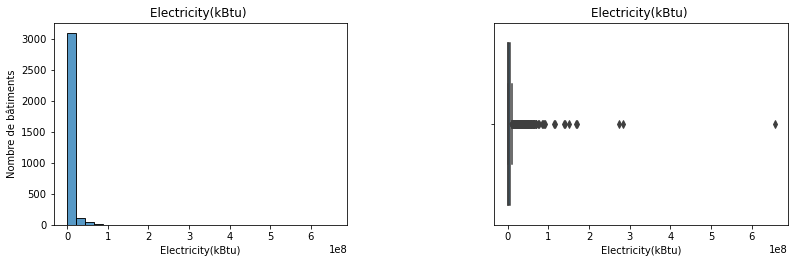

In [85]:
fig = plt.figure()
plt.gcf().subplots_adjust(left = 0.3, bottom = 0.3,
                       right = 2., top = 1, wspace = 0.5, hspace = 6)


ax1 = fig.add_subplot(1, 2, 1)
ax1 = sns.histplot(data=data_energy, x=X1,log_scale=False, bins=30)
ax1.set_title("{variable} ".format(variable=X1))
ax1.set_ylabel("Nombre de bâtiments")

ax2 = fig.add_subplot(1, 2,2)
ax2 = sns.boxplot(data=data_energy, x=X1)
ax2.set_title("{variable} ".format(variable=X1))
ax2.set_ylabel("")
plt.show()

plt.show()

**Traitement des valeurs aberrantes pour 'Electricity(kBtu)'**

In [86]:
data_energy[['SiteEUI(kBtu/sf)','SourceEUI(kBtu/sf)',
             'SiteEnergyUse(kBtu)','Electricity(kBtu)','NaturalGas(kBtu)']].loc[data_energy['Electricity(kBtu)']<=0]

SiteEUI(kBtu/sf)  SourceEUI(kBtu/sf)  SiteEnergyUse(kBtu)  \
1024        208.800003            0.000000         1.252517e+07   
3862        263.200012          276.299988         1.150804e+07   
6440          7.100000            2.000000         3.427261e+05   

      Electricity(kBtu)  NaturalGas(kBtu)  
1024                0.0               0.0  
3862                0.0        11508035.0  
6440          -115417.0               0.0

In [87]:
# Suppression des propriétés sans consommation d'élèctricité ou avec une consommation négative
data_electricity = data_energy.index[data_energy['Electricity(kBtu)']<=0]

data_energy.drop(index=data_electricity, inplace=True)

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>
### <div class="alert alert-block alert-info"><a name="C335">3.3.5. Variables 'NaturalGas(therms)' et 'NaturalGas(kBtu)'</a></div>

In [88]:
# Définition des variables à comparer
X1 = 'NaturalGas(kBtu)'
X2 = 'NaturalGas(therms)'

print("Pour la variable {variable} ".format(variable=X1))
print("------------------------------------")
print("Nombre de valeurs manquantes:", data_energy[X1].isnull().sum())
print(data_energy[X1].describe())
print("")
print("Pour la variable {variable} ".format(variable=X2))
print("------------------------------------")
print("  Nombre de valeurs manquantes:", data_energy[X2].isnull().sum())
print(data_energy[X2].describe())

Pour la variable NaturalGas(kBtu) 
------------------------------------
Nombre de valeurs manquantes: 0
count    3.282000e+03
mean     1.881984e+06
std      7.927464e+06
min      0.000000e+00
25%      0.000000e+00
50%      4.866055e+05
75%      1.470246e+06
max      2.979090e+08
Name: NaturalGas(kBtu), dtype: float64

Pour la variable NaturalGas(therms) 
------------------------------------
  Nombre de valeurs manquantes: 0
count    3.282000e+03
mean     1.881984e+04
std      7.927464e+04
min      0.000000e+00
25%      0.000000e+00
50%      4.866220e+03
75%      1.470256e+04
max      2.979090e+06
Name: NaturalGas(therms), dtype: float64


Les deux variables sont bien renseignées et leurs valeurs semblent identiques. Je vais regarder pour voir si elles sont corrélées. Si tel est le cas, je supprimerais celle exprimé en therms pour ne garder que des variables exprimées en kBtu.

In [89]:
# Vérification de la corrélation entre les 2 variables
coeff_correlation = data_energy[[X1,X2]].corr()

print("Le coefficient de corrélation est:",coeff_correlation.iloc[0,1] )

if coeff_correlation.iloc[0,1] > 0.75:
    #Remplissage de la colonne 'X1' par les valeurs de la colonne 'X2'
    data_energy.loc[(data_energy[X1].isnull()) & (data_energy[X2].notnull()),
                  [X1]] = data_energy[X2]
    print("Nombre de valeurs manquantes:", data_energy[X1].isnull().sum())
    # Suppression de X2)'
    data_energy.drop(columns=[X2], inplace = True)
else:
    print("Corrélation inférieure au seuil")

Le coefficient de corrélation est: 0.9999999999977678
Nombre de valeurs manquantes: 0


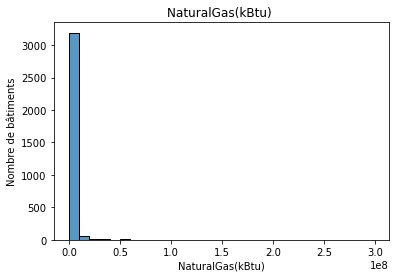

In [90]:
fig = plt.figure()
ax = plt.axes()
ax = sns.histplot(data=data_energy, x=X1,log_scale=False, bins=30)
plt.title("{variable} ".format(variable=X1))
ax.set_ylabel("Nombre de bâtiments")
plt.show()

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>
### <div class="alert alert-block alert-info"><a name="C336">3.3.6. Variable 'OtherFuelUse(kBtu)' </a></div>

In [91]:
# Définition des variables à comparer
X1 = 'OtherFuelUse(kBtu)'


print("Pour la variable {variable} ".format(variable=X1))
print("------------------------------------")
print("Nombre de valeurs manquantes:", data_energy[X1].isnull().sum(), 
      "soit pour", data_energy[X1].isnull().sum()*100/data_energy.shape[0],"% des bâtiments")
print(data_energy[X1].describe())


Pour la variable OtherFuelUse(kBtu) 
------------------------------------
Nombre de valeurs manquantes: 1647 soit pour 50.18281535648995 % des bâtiments
count    1.635000e+03
mean     1.435024e+04
std      2.799198e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      8.269669e+06
Name: OtherFuelUse(kBtu), dtype: float64


Cette variable est manquante pour 50% des bâtiments. La fonction describe laisse supposer qu'il y a une majorité de 0.
Pour traiter les valeurs manquantes, je choisi de les remplacer par 0.

In [92]:
data_energy['OtherFuelUse(kBtu)'].fillna(0, inplace=True)
data_energy['OtherFuelUse(kBtu)'].isnull().sum()

0

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>
### <div class="alert alert-block alert-info"><a name="C337">3.3.7. Variable SteamUse(kBtu)</a></div>

In [93]:
# Définition des variables à comparer
X1 = 'SteamUse(kBtu)'


print("Pour la variable {variable} ".format(variable=X1))
print("------------------------------------")
print("Nombre de valeurs manquantes:", data_energy[X1].isnull().sum(), 
      "soit pour", data_energy[X1].isnull().sum()*100/data_energy.shape[0],"% des bâtiments")
print(data_energy[X1].describe())

Pour la variable SteamUse(kBtu) 
------------------------------------
Nombre de valeurs manquantes: 0 soit pour 0.0 % des bâtiments
count    3.282000e+03
mean     4.974624e+05
std      5.247948e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.349435e+08
Name: SteamUse(kBtu), dtype: float64


Cette variable est bien renseignée. La fonction describe laisse supposer qu'il y a une majorité de 0.

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>
### <div class="alert alert-block alert-info"><a name="C338">3.3.8. Variables 'YearsENERGYSTARCertified' et 'ENERGYSTARScore'</a></div>

In [94]:
X1 = 'ENERGYSTARScore' 
X2 = 'YearsENERGYSTARCertified'


print("Pour la variable {variable} ".format(variable=X1))
print("------------------------------------")
print("Nombre de valeurs manquantes:", data_energy[X1].isnull().sum(), 
      "soit pour", data_energy[X1].isnull().sum()*100/data_energy.shape[0],"% des bâtiments")
print(data_energy[X1].describe())
print("")
print("Pour la variable {variable} ".format(variable=X2))
print("------------------------------------")
print("Nombre de valeurs manquantes:", data_energy[X2].isnull().sum(), 
      "soit pour", data_energy[X2].isnull().sum()*100/data_energy.shape[0],"% des bâtiments")
print("Valeurs possibles:", data_energy[X2].unique()[:10])

Pour la variable ENERGYSTARScore 
------------------------------------
Nombre de valeurs manquantes: 1078 soit pour 32.845825716026816 % des bâtiments
count    2204.000000
mean       64.791742
std        28.540432
min         1.000000
25%        47.000000
50%        72.000000
75%        89.000000
max       100.000000
Name: ENERGYSTARScore, dtype: float64

Pour la variable YearsENERGYSTARCertified 
------------------------------------
Nombre de valeurs manquantes: 3098 soit pour 94.39366240097502 % des bâtiments
Valeurs possibles: [nan '2016' '2014' '2012' '2015' '20172015'
 '2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008'
 '2017201620152014201320122011201020092008' '2010, 2009, 2007'
 '201020092007']


La variable ENERGYSTARScore présente 33% de valeurs manquantes. Nous verrons plus loin pour traiter ces valeurs.<br>
Comme la variable YearsENERGYSTARCertified présent 94% de valeurs manquantes et qu'elle ne semble pas pertinente pour la suite du projet, je vais la supprimer du jeu de données.

In [95]:
data_energy.drop(columns=['YearsENERGYSTARCertified'], inplace = True)

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>
### <div class="alert alert-block alert-info"><a name="C339">3.3.9. Vérification de la qualité du remplissage des variables nous informant sur la consommation des bâtiments</a></div>

Pour faire cette vérification, je vais regarder que 'SiteEnergyUse(kBtu)' correspond à la somme de 'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)' et 'OtherFuelUse(kBtu)'.

In [96]:
data_energy.shape

(3282, 36)

In [97]:
# Définition d'un seuil pour lequel je considére que la somme correspond à 'SiteEnergyUse(kBtu)'
seuil = 2 # %

# Recherche des bâtiments avec 'SiteEnergyUse(kBtu)' > à la somme
data_inclus = data_energy.index[((data_energy['SiteEnergyUse(kBtu)']+(data_energy['SiteEnergyUse(kBtu)']*(seuil/100))) >
                              ((data_energy['SteamUse(kBtu)'] + 
                                data_energy['Electricity(kBtu)'] + 
                                data_energy['NaturalGas(kBtu)'] +
                                data_energy['OtherFuelUse(kBtu)'])))
                             & ((data_energy['SiteEnergyUse(kBtu)']-(data_energy['SiteEnergyUse(kBtu)']*(seuil/100))) <
                              ((data_energy['SteamUse(kBtu)'] + 
                                data_energy['Electricity(kBtu)'] + 
                                data_energy['NaturalGas(kBtu)'] +
                                data_energy['OtherFuelUse(kBtu)'])))]


data_out = data_energy.drop(data_inclus)
print("Nombre de bâtiment avec 'SiteEnergyUse(kBtu)' différent de la somme de plus de {seuil} %:".format(seuil=seuil), 
      data_out.shape[0] )



Nombre de bâtiment avec 'SiteEnergyUse(kBtu)' différent de la somme de plus de 2 %: 23


Pour la suite du projet, je préfère supprimer ces bâtiments du jeu de données car les informations renseignées ne correspondent pas et qu'ils ne sont pas nombreux.

In [98]:
# Suppression de ces bâtiments
data_energy = data_energy.drop(data_out.index)

Les valeurs abérrantes pouvant subsister dans le jeu de données pour ces variables sera traité plus loin.

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>

## <div class="alert alert-block alert-info"><a name="C34">3.4. Vérification des variables concernant l'émissions de CO2</a></div>

Les variables renseignant sur l'émission de CO2 sont:
- TotalGHGEmissions: quantité totale d'émission de C02
- GHGEmissionsIntensity: quantité totale d'émission de C02 rapporté à la surface du bâtiment

In [99]:
# Définition des variables à comparer
X1 = 'TotalGHGEmissions'
X2 = 'GHGEmissionsIntensity'

print("Pour la variable {variable} ".format(variable=X1))
print("------------------------------------")
print("Nombre de valeurs manquantes:", data_energy[X1].isnull().sum())
print(data_energy[X1].describe())
print("")
print("Pour la variable {variable} ".format(variable=X2))
print("------------------------------------")
print("  Nombre de valeurs manquantes:", data_energy[X2].isnull().sum())
print(data_energy[X2].describe())

Pour la variable TotalGHGEmissions 
------------------------------------
Nombre de valeurs manquantes: 0
count     3259.000000
mean       174.684735
std        643.066637
min          0.080000
25%         19.825000
50%         49.170000
75%        139.085000
max      16870.980000
Name: TotalGHGEmissions, dtype: float64

Pour la variable GHGEmissionsIntensity 
------------------------------------
  Nombre de valeurs manquantes: 0
count    3259.000000
mean        1.484373
std         2.216619
min         0.000000
25%         0.270000
50%         0.780000
75%         1.760000
max        34.090000
Name: GHGEmissionsIntensity, dtype: float64


In [100]:
# Vérification de la corrélation entre les 2 variables
coeff_correlation = data_energy[[X1,X2]].corr()

print("Le coefficient de corrélation est:",coeff_correlation.iloc[0,1] )

if coeff_correlation.iloc[0,1] > 0.75:
    #Remplissage de la colonne 'X1' par les valeurs de la colonne 'X2'
    data_energy.loc[(data_energy[X1].isnull()) & (data_energy[X2].notnull()),
                  [X1]] = data_energy[X2]
    print("Nombre de valeurs manquantes:", data_energy[X1].isnull().sum())
    # Suppression de X2)'
    data_energy.drop(columns=[X2], inplace = True)
else:
    print("Corrélation inférieure au seuil")

Le coefficient de corrélation est: 0.45719916345650613
Corrélation inférieure au seuil


Pour l'instant, je garde les 2 variables

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>


## <div class="alert alert-block alert-info"><a name="C35">3.5. Vérification des variables concernant les données déclaratives du permis d'exploitation commerciale des bâtimes</a></div>

Ces variables sont:
- BuildingType: type de bâtiment. Cette variable a été utilisé pour filtré les bâtiments non destinés à l'habitation et ne contient pas de valeur manquante.
- PrimaryPropertyType
- PropertyName
- TaxParcelIdentificationNumber
- YearBuilt
- NumberofBuildings
- NumberofFloors
- PropertyGFATotal
- PropertyGFAParking
- PropertyGFABuilding(s)
- ListOfAllPropertyUseTypes
- LargestPropertyUseType
- LargestPropertyUseTypeGFA
- SecondLargestPropertyUseType
- SecondLargestPropertyUseTypeGFA
- ThirdLargestPropertyUseType
- ThirdLargestPropertyUseTypeGFA

In [101]:
data_caracteristique = data_energy.copy()

### <div class="alert alert-block alert-info"><a name="C351">3.5.1. Variables définissant l'usage des bâtiments</a></div>

Les différentes variables qui définissent l'usage des bâtiments sont:
- PrimaryPropertyType
- ListOfAllPropertyUseTypes
- LargestPropertyUseType
- SecondLargestPropertyUseType
- ThirdLargestPropertyUseType

Contiennent-elles toutes les mêmes usages?

**La variable 'PrimaryPropertyType'** 

In [102]:
print("Taux de valeurs manquantes de la variable 'PrimaryPropertyType:", 
      data_caracteristique['PrimaryPropertyType'].isnull().sum())

Taux de valeurs manquantes de la variable 'PrimaryPropertyType: 0


In [103]:
print("Les différents types de bâtiments possibles sont:")
primary_type = data_caracteristique['PrimaryPropertyType'].value_counts()
print(primary_type)

Les différents types de bâtiments possibles sont:
Small- and Mid-Sized Office    580
Other                          489
Large Office                   339
K-12 School                    254
Mixed Use Property             217
Retail Store                   189
Warehouse                      187
Non-Refrigerated Warehouse     186
Hotel                          149
Worship Facility               143
Medical Office                  82
Distribution Center             55
Distribution Center\n           51
Senior Care Community           39
Supermarket / Grocery Store     39
Supermarket/Grocery Store       36
Self-Storage Facility           29
Self-Storage Facility\n         27
Refrigerated Warehouse          25
University                      21
Residence Hall                  21
College/University              21
Hospital                        20
Residence Hall/Dormitory        15
Restaurant                      12
Laboratory                      11
Restaurant\n                    10
Low-R

Il y a des catégories en double à cause d'un problème de format. Je vais donc harmoniser le nom des catégories. De plus, il y a également des propriétés avec une usage d'habitation. Je vais supprimer ces propriétés

In [104]:
data_caracteristique.shape

(3259, 36)

In [105]:
# Suppression de \n à la fin de certains noms
data_caracteristique['PrimaryPropertyType'] = data_caracteristique['PrimaryPropertyType'].replace('\n','', regex=True)

usetype_dict = {'Small- and Mid-Sized Office' : 'Office',
                'Large Office': 'Office',
                'Office': 'Office',
                'SPS-District K-12':'Education',
                'K-12 School':'Education',
                'College/University': 'Education',
                'University':'Education',
                'Residence Hall/Dormitory':'Residence Hall',
                'Non-Refrigerated Warehouse': 'Warehouse',
                'Supermarket / Grocery Store': 'Supermarket/Grocery Store'
                
               }
data_caracteristique['PrimaryPropertyType'] = data_caracteristique['PrimaryPropertyType'].replace(usetype_dict)

# Suppression des bâtiments à usage d'habitation
index_suppression = data_caracteristique.index[data_caracteristique['PrimaryPropertyType'] =='Low-Rise Multifamily']
data_caracteristique.drop(index_suppression, axis=0, inplace=True)

primary_type = data_caracteristique['PrimaryPropertyType'].value_counts()
primary_type


Office                       922
Other                        489
Warehouse                    373
Education                    300
Mixed Use Property           217
Retail Store                 189
Hotel                        149
Worship Facility             143
Distribution Center          106
Medical Office                82
Supermarket/Grocery Store     75
Self-Storage Facility         56
Senior Care Community         39
Residence Hall                36
Refrigerated Warehouse        25
Restaurant                    22
Hospital                      20
Laboratory                    11
Name: PrimaryPropertyType, dtype: int64

**La variable 'LargestPropertyUseType'**

In [106]:
print("Taux de valeurs manquantes de la variable 'LargestPropertyUseType:", 
      data_caracteristique['LargestPropertyUseType'].isnull().sum())

Taux de valeurs manquantes de la variable 'LargestPropertyUseType: 69


In [107]:
print("Les différents usages possibles sont:")
largest_type = data_caracteristique['LargestPropertyUseType'].value_counts()
print(largest_type)

Les différents usages possibles sont:
Office                                                  962
Non-Refrigerated Warehouse                              392
K-12 School                                             254
Retail Store                                            195
Other                                                   189
Hotel                                                   144
Worship Facility                                        141
Distribution Center                                     106
Medical Office                                           84
Supermarket/Grocery Store                                77
Parking                                                  55
Self-Storage Facility                                    54
Other - Recreation                                       51
College/University                                       41
Other - Entertainment/Public Assembly                    41
Senior Care Community                                    39
Re

In [108]:
# Définition d'un dictionnaire pour regrouper des usages similaires pour diminuer le nombre de catégories possibles

usetype_dict = {'Small- and Mid-Sized Office' : 'Office',
                'Large Office': 'Office',
                'Office': 'Office',
                'Bank Branch':'Office',
                'Financial Office':'Office',
                
                'Police Station': 'Public service',
                'Courthouse':'Public service',
                'Other - Public Services': 'Public service',
                'Library':'Public service',
                
                'Fire Station': 'Fire Station',
                'Prison/Incarceration':'Prison/Incarceration',
                
                'Movie Theater':'Entertainment',
                'Performing Arts':'Entertainment',
                'Museum':'Entertainment',
                'Other - Entertainment/Public Assembly':'Entertainment',
                'Other - Recreation':'Entertainment',
                
                'Data Center':'Data Center',
                'Manufacturing/Industrial Plant':'Manufacturing/Industrial Plant',
                'Parking':'Parking',
                                                   
                'Other - Utility' : 'Other',
                'Other - Services':'Other',
                'Other - Technology/Science': 'Laboratory',
                
                'Lifestyle Center': 'Sport center',
                'Fitness Center/Health Club/Gym':'Sport center',
                'Swimming Pool':'Sport center',
                
                'Personal Services (Health/Beauty, Dry Cleaning, etc)':'Retail Store',
                'Other - Mall':'Retail Store',
                'Strip Mall':'Retail Store',
                'Enclosed Mall':'Retail Store',
                'Automobile Dealership':'Retail Store',
                'Repair Services (Vehicle, Shoe, Locksmith, etc)':'Retail Store',
                'Convenience Store without Gas Station':'Retail Store',
                
                'Pre-school/Daycare': 'Education',
                'SPS-District K-12':'Education',
                'K-12 School':'Education',
                'College/University': 'Education',
                'University':'Education',
                'Other - Education':'Education',
                'Adult Education':'Education',
                'Vocational School':'Education',
                
                'Residence Hall/Dormitory':'Residence Hall',
                'Other - Lodging/Residential':'Residence Hall',
                
                'Hospital (General Medical & Surgical)':'Hospital/Residential Care Facility',
                'Hospital':'Hospital/Residential Care Facility',
                'Outpatient Rehabilitation/Physical Therapy':'Hospital/Residential Care Facility',
                'Residential Care Facility':'Hospital/Residential Care Facility',
                'Urgent Care/Clinic/Other Outpatient':'Hospital/Residential Care Facility',
                'Other/Specialty Hospital':'Hospital/Residential Care Facility',
                'Medical Office':'Hospital/Residential Care Facility',
                'Hospital/Residential Care Facility':'Hospital/Residential Care Facility',
                
                'Wholesale Club/Supercenter': 'Supermarket/Grocery Store',
                'Food Sales': 'Supermarket/Grocery Store',
                
                'Non-Refrigerated Warehouse': 'Warehouse',
                
                'Restaurant':'Restaurant/Bar',
                'Other - Restaurant/Bar': 'Restaurant/Bar',
                'Food Service':'Restaurant/Bar',
                'Bar/Nightclub':'Restaurant/Bar',
                'Fast Food Restaurant':'Restaurant/Bar',
                
                'Convention Center':'Meeting Hall',
                'Social/Meeting Hall':'Meeting Hall',
                
               }
data_caracteristique['LargestPropertyUseType'] = data_caracteristique['LargestPropertyUseType'].replace(usetype_dict)

largest_type = data_caracteristique['LargestPropertyUseType'].value_counts()


La variable 'LargestPropertyUseType' donne plus de précision sur l'utilisation du bâtiment que la variable 'PrimaryPropertyType'. Toutefois, elle contient des valeurs manquantes.
Avant de supprimer la variable 'PrimaryPropertyType' qui est redondante avec 'LargestPropertyUseType', je vais l'utiliser pour combler les valeurs manquantes.

In [109]:
#Remplissage de la colonne 'LargestPropertyUseType' par les valeurs de la colonne 'PrimaryPropertyType'
data_caracteristique.loc[(data_caracteristique['LargestPropertyUseType'].isnull()),
                  ['LargestPropertyUseType']] = data_caracteristique['PrimaryPropertyType']

# Pour m'assurer que ce soit les bons noms de catégories
data_caracteristique['LargestPropertyUseType'] = data_caracteristique['LargestPropertyUseType'].replace(usetype_dict)

data_caracteristique['LargestPropertyUseType'] = data_caracteristique['LargestPropertyUseType'].replace(usetype_dict)

print('Après changement, le nombre de valeurs manquantes est de',
      data_caracteristique['LargestPropertyUseType'].isnull().sum())

Après changement, le nombre de valeurs manquantes est de 0


In [110]:
data_caracteristique['LargestPropertyUseType'].value_counts()

Office                                997
Warehouse                             397
Education                             315
Retail Store                          248
Other                                 206
Hotel                                 151
Worship Facility                      143
Hospital/Residential Care Facility    125
Entertainment                         111
Distribution Center                   108
Supermarket/Grocery Store              80
Self-Storage Facility                  56
Parking                                55
Residence Hall                         48
Senior Care Community                  39
Restaurant/Bar                         30
Refrigerated Warehouse                 25
Laboratory                             23
Meeting Hall                           21
Multifamily Housing                    18
Public service                         16
Manufacturing/Industrial Plant         14
Sport center                           13
Data Center                       

Lors de la mise en place de la modèlisation, je testerais les performances des modèles avec soit 'PrimaryPropertyType' soit 'LargestPropertyUseType'

**La variable 'SecondLargestPropertyUseType'**

In [111]:
print("Taux de valeurs manquantes de la variable 'SecondLargestPropertyUseType':", 
      data_caracteristique['SecondLargestPropertyUseType'].isnull().sum())

print("Les différents usages possibles sont:")
secondary_type = data_caracteristique['SecondLargestPropertyUseType'].value_counts()
print(secondary_type)

Taux de valeurs manquantes de la variable 'SecondLargestPropertyUseType': 1608
Les différents usages possibles sont:
Parking                                                 645
Office                                                  324
Retail Store                                            165
Other                                                    87
Non-Refrigerated Warehouse                               59
Restaurant                                               59
Fitness Center/Health Club/Gym                           26
Data Center                                              25
Multifamily Housing                                      23
Other - Services                                         22
Supermarket/Grocery Store                                20
Medical Office                                           17
Other - Entertainment/Public Assembly                    16
Laboratory                                               14
Distribution Center                        

In [112]:
# regroupement des usages similaires pour avoir les mêmes catégories que dans la variable 'LargestPropertyUseType'

data_caracteristique['SecondLargestPropertyUseType'] = data_caracteristique['SecondLargestPropertyUseType'].replace(usetype_dict)

# Pour vérifier que toutes les catégories de 'SecondLargestPropertyUseType' sont dans 'LargestPropertyUseType'
liste_largest = data_caracteristique['LargestPropertyUseType'].unique().tolist()
liste_second = data_caracteristique['SecondLargestPropertyUseType'].loc[
    data_caracteristique['SecondLargestPropertyUseType'].notnull()].unique().tolist()


liste_element_different = list(set(liste_second).difference(liste_largest))

if len(liste_element_different) == 0:
    print("Toutes les catégories de 'SecondLargestPropertyUseType' sont dans 'LargestPropertyUseType' ")
else:
    print("Il y a encore des catégories propres à 'SecondLargestPropertyUseType'")
    print(liste_element_different)

Toutes les catégories de 'SecondLargestPropertyUseType' sont dans 'LargestPropertyUseType' 


Les bâtiments peuvent avoir un unique usage. Dans ce cas, cette variable ne serait pas renseignée. 

In [113]:
# En utilisant la variable 'ListOfAllPropertyUseTypes', 
# je souhaite savoir si les bâtiments avec les valeurs manquantes ont plusieurs usages.

data_caracteristique['ListOfAllPropertyUseTypes'].loc[data_caracteristique['SecondLargestPropertyUseType'].isnull()]

0                    Hotel
1                    Hotel
5                    Hotel
6                    Hotel
7                    Hotel
               ...        
6694    Other - Recreation
6696                Office
6697    Other - Recreation
6698                Office
6699    Other - Recreation
Name: ListOfAllPropertyUseTypes, Length: 1608, dtype: object

Dans la grande majorité des cas, les bâtiments ne mentionnant pas de 'SecondLargestPropertyUseTypeGFA' ont un seul usage d'après la 'ListOfAllPropertyUseTypes'. Pour conserver cette variable pour la suite du projet, je choisis de lui attribuer la catégorie "Without".

In [114]:
# Remplacer les NaN par 'Without' :
data_caracteristique['SecondLargestPropertyUseType'].fillna('Without', inplace=True)

# Vérification du remplacement des valeurs null:
print("Taux de valeurs manquantes de la variable 'SecondLargestPropertyUseType':", 
      data_caracteristique['SecondLargestPropertyUseType'].isnull().sum())

print("Nombre de valeur 'Without' dans 'SecondLargestPropertyUseType':", 
      len(data_caracteristique['SecondLargestPropertyUseType'].loc[
          data_caracteristique['SecondLargestPropertyUseType']=='Without']))

Taux de valeurs manquantes de la variable 'SecondLargestPropertyUseType': 0
Nombre de valeur 'Without' dans 'SecondLargestPropertyUseType': 1608


**La variable 'ThirdLargestPropertyUseType'**

Je vais procéder de la même manière que pour la variable 'LargestPropertyUseType'

In [115]:
print("Taux de valeurs manquantes de la variable 'ThirdLargestPropertyUseType':", 
      data_caracteristique['ThirdLargestPropertyUseType'].isnull().sum())

data_caracteristique['ThirdLargestPropertyUseType'] = data_caracteristique['ThirdLargestPropertyUseType'].replace(usetype_dict)

# Pour vérifier que toutes les catégories de 'ThirdLargestPropertyUseType' sont dans 'LargestPropertyUseType'
liste_largest = data_caracteristique['LargestPropertyUseType'].unique().tolist()
liste_second = data_caracteristique['ThirdLargestPropertyUseType'].loc[
    data_caracteristique['ThirdLargestPropertyUseType'].notnull()].unique().tolist()


liste_element_different = list(set(liste_second).difference(liste_largest))

if len(liste_element_different) == 0:
    print("Toutes les catégories de 'ThirdLargestPropertyUseType' sont dans 'LargestPropertyUseType' ")
else:
    print("Il y a encore des catégories propres à 'ThirdLargestPropertyUseType'")
    print(liste_element_different)



Taux de valeurs manquantes de la variable 'ThirdLargestPropertyUseType': 2578
Toutes les catégories de 'ThirdLargestPropertyUseType' sont dans 'LargestPropertyUseType' 


In [116]:
# Remplacer les NaN par 'Without' :
data_caracteristique['ThirdLargestPropertyUseType'].fillna('Without', inplace=True)

# Vérification du remplacement des valeurs null:
print("Taux de valeurs manquantes de la variable 'ThirdLargestPropertyUseType':", 
      data_caracteristique['ThirdLargestPropertyUseType'].isnull().sum())

print("Nombre de valeur 'Without' dans 'ThirdLargestPropertyUseType':", 
      len(data_caracteristique['ThirdLargestPropertyUseType'].loc[
          data_caracteristique['ThirdLargestPropertyUseType']=='Without']))

Taux de valeurs manquantes de la variable 'ThirdLargestPropertyUseType': 0
Nombre de valeur 'Without' dans 'ThirdLargestPropertyUseType': 2578


**La variable 'ListOfAllPropertyUseTypes'**

Cette variable donne la liste de tous les usages d'un bâtiment donné. Elle ne me semble pas pertinente à garder pour la suite du projet. En revanche, je souhaite tester si le nombre d'usage peut influencer les performances du modèle. 
Avant de supprimer la variable 'ListOfAllPropertyUseTypes' du jeu de données, je vais créer une nouvelle variable informant sur le nombre d'usage

In [117]:
data_caracteristique['ListOfAllPropertyUseTypes']

0                                                   Hotel
1                                                   Hotel
2                              Hotel, Parking, Restaurant
3                              Hotel, Parking, Restaurant
4                           Hotel, Parking, Swimming Pool
                              ...                        
6698                                               Office
6699                                   Other - Recreation
6700    Fitness Center/Health Club/Gym, Other - Recrea...
6701    Fitness Center/Health Club/Gym, Food Service, ...
6702    Fitness Center/Health Club/Gym, Food Service, ...
Name: ListOfAllPropertyUseTypes, Length: 3254, dtype: object

In [118]:
data_usage = data_caracteristique['ListOfAllPropertyUseTypes'].str.split(r"\,|:", expand=True)
data_usage.head()

0         1               2     3     4     5     6     7     8     9   \
0  Hotel      None            None  None  None  None  None  None  None  None   
1  Hotel      None            None  None  None  None  None  None  None  None   
2  Hotel   Parking      Restaurant  None  None  None  None  None  None  None   
3  Hotel   Parking      Restaurant  None  None  None  None  None  None  None   
4  Hotel   Parking   Swimming Pool  None  None  None  None  None  None  None   

     10    11    12  
0  None  None  None  
1  None  None  None  
2  None  None  None  
3  None  None  None  
4  None  None  None

In [119]:
data_caracteristique['NumberOfUse'] = data_usage.notnull().sum(axis=1)
data_caracteristique[['ListOfAllPropertyUseTypes','NumberOfUse']]

ListOfAllPropertyUseTypes  NumberOfUse
0                                                 Hotel            1
1                                                 Hotel            1
2                            Hotel, Parking, Restaurant            3
3                            Hotel, Parking, Restaurant            3
4                         Hotel, Parking, Swimming Pool            3
...                                                 ...          ...
6698                                             Office            1
6699                                 Other - Recreation            1
6700  Fitness Center/Health Club/Gym, Other - Recrea...            3
6701  Fitness Center/Health Club/Gym, Food Service, ...            5
6702  Fitness Center/Health Club/Gym, Food Service, ...            5

[3254 rows x 2 columns]

In [120]:
# Suppression de la colonne 'PrimaryPropertyType'
data_caracteristique = data_caracteristique.drop(columns=['ListOfAllPropertyUseTypes'], axis=1)

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>

### <div class="alert alert-block alert-info"><a name="C352">3.5.2. Variable informant sur les superficies et autres caractéristiques physiques des bâtiments</a></div>

Les différentes variables nous informant sur les caractéristiques des bâtiments sont:
- YearBuilt
- NumberofBuildings
- NumberofFloors
- PropertyGFATotal
- PropertyGFAParking
- PropertyGFABuilding(s)
- LargestPropertyUseTypeGFA
- SecondLargestPropertyUseTypeGFA
- ThirdLargestPropertyUseTypeGFA

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>

#### <div class="alert alert-block alert-info"><a name="C3521">3.5.2.1. La variable 'YearBuilt'</a></div>


Cette variable nous renseigne sur la date de constrution ou de renonvation

In [121]:
print("Taux de valeurs manquantes de la variable 'YearBuilt':", 
      data_caracteristique['YearBuilt'].isnull().sum())

data_caracteristique['YearBuilt'].describe()

Taux de valeurs manquantes de la variable 'YearBuilt': 0


count    3254.000000
mean     1961.608175
std        32.734770
min      1900.000000
25%      1930.000000
50%      1965.000000
75%      1989.000000
max      2015.000000
Name: YearBuilt, dtype: float64

Cette variable est complétement renseignée et ne semble pas présenter de valeur abérrante.
Pour la modélisation, il serait plus intéressant d'avoir l'age des bâtiments plutôt que leur année de construction.

In [122]:
data_caracteristique['BuildingAge'] = data_caracteristique['DataYear']- data_caracteristique['YearBuilt']
data_caracteristique['BuildingAge'].describe()

count    3254.000000
mean       53.890904
std        32.733863
min         1.000000
25%        27.000000
50%        50.000000
75%        86.000000
max       116.000000
Name: BuildingAge, dtype: float64

In [123]:
data_caracteristique.drop(columns=['DataYear'], axis=1, inplace=True)

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>

#### <div class="alert alert-block alert-info"><a name="C3522">3.5.2.2. La variable 'NumberofBuildings'</a></div>

In [124]:
print("Taux de valeurs manquantes de la variable 'NumberofBuildings':", 
      data_caracteristique['NumberofBuildings'].isnull().sum())

data_caracteristique['NumberofBuildings'].describe()

Taux de valeurs manquantes de la variable 'NumberofBuildings': 0


count    3254.000000
mean        1.084819
std         1.141750
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        39.000000
Name: NumberofBuildings, dtype: float64

Cette variable ne présente pas de valeur manquante. En revanche, certaines propriétés ne semblent pas avoir de bâtiments ce qui est impossible. Je vais leur attribuer au moins 1 bâtiment.

In [125]:
data_caracteristique['NumberofBuildings'].replace({0:1}, inplace = True)

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>

#### <div class="alert alert-block alert-info"><a name="C3523">3.5.2.3. La variable 'NumberofFloors'</a></div>

In [126]:
print("Taux de valeurs manquantes de la variable 'NumberofFloors':", 
      data_caracteristique['NumberofFloors'].isnull().sum())

data_caracteristique['NumberofFloors'].describe()

Taux de valeurs manquantes de la variable 'NumberofFloors': 8


count    3246.000000
mean        4.152803
std         6.610870
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        99.000000
Name: NumberofFloors, dtype: float64

Un nombre d'étage égale à 0 me semble étrange ainsi qu'un nombre d'étage supèrieur à 76 (nombre d'étage maximum à Seattle d'après Wikipédia). Je vais donc vérifier

In [127]:
# Traitement des valeurs manquantes
data_caracteristique.loc[data_caracteristique['NumberofFloors'].isnull()]

OSEBuildingID        BuildingType PrimaryPropertyType  \
3999          24086              Campus               Other   
6288          40028      NonResidential           Warehouse   
6290          40031      NonResidential      Medical Office   
6292          40034      NonResidential      Medical Office   
6332          43948  Nonresidential COS               Other   
6364          49705  Nonresidential COS               Other   
6568          49958  Nonresidential COS               Other   
6573          49966      NonResidential               Other   

                                           PropertyName  \
3999  king county metro transit atlantic-central bas...   
6288                    sand point building 5a,5b,5c,5d   
6290                             sand point building 25   
6292                             sand point building 29   
6332                             georgetown steam plant   
6364                               magnuson park campus   
6568                  first hill street car maintenance   
6573             smilow rainier vista boys & girls club   

     TaxParcelIdentificationNumber  CouncilDistrictCode  YearBuilt  \
3999                    7666203387                    2       1991   
6288                     225049077                    4       1940   
6290                     225049077                    4       1960   
6292                     225049077                    4       1960   
6332                           NaN                    2       1906   
6364                     225049062                    4       1929   
6568                    8592900285                    2       2014   
6573                    6056110050                    2       2009   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  ...  \
3999               10.0             NaN            180796  ...   
6288                1.0             NaN            384772  ...   
6290                1.0             NaN             30287  ...   
6292                1.0             NaN             21931  ...   
6332                1.0             NaN             39212  ...   
6364                7.0             NaN            502030  ...   
6568                1.0             NaN             20993  ...   
6573                1.0             NaN             40265  ...   

      TotalGHGEmissions  GHGEmissionsIntensity DefaultData  ComplianceStatus  \
3999             818.66                   4.13          No         Compliant   
6288             406.74                   0.96         Yes         Compliant   
6290              27.88                   0.68         Yes         Compliant   
6292             137.63                   6.02         Yes         Compliant   
6332               5.39                   0.05          No         Compliant   
6364             472.56                   0.86          No         Compliant   
6568              12.28                   0.42          No         Compliant   
6573              42.40                   0.91          No         Compliant   

     Outlier   Latitude   Longitude  ZipCode  NumberOfUse  BuildingAge  
3999     NaN  47.591130 -122.323398  98134.0            2           24  
6288     NaN  47.683844 -122.261760  98115.0            2           75  
6290     NaN  47.682195 -122.262390  98115.0            1           55  
6292     NaN  47.682195 -122.262946  98115.0            1           55  
6332     NaN  47.561588 -122.316071  98108.0            1          109  
6364     NaN  47.683179 -122.258795  98115.0            1           86  
6568     NaN  47.595246 -122.322947  98134.0            4            1  
6573     NaN  47.541027 -122.312492  98108.0            1            6  

[8 rows x 36 columns]

In [128]:
# Remplacement des valeurs manquantes par les informations trouver sur Google
nb_etage = [1,3,1,2,4,1,1,2]

floor_null = data_caracteristique.index[data_caracteristique['NumberofFloors'].isnull()]

for index, nv in zip(floor_null, nb_etage):
    data_caracteristique.loc[[index],['NumberofFloors']] = nv

In [129]:
# Bâtiment avec un nombre d'étage = 0
data_caracteristique.loc[data_caracteristique['NumberofFloors']==0]

OSEBuildingID        BuildingType PrimaryPropertyType  \
330             267      NonResidential               Hotel   
331             267      NonResidential               Hotel   
970             656      NonResidential      Medical Office   
971             656      NonResidential      Medical Office   
972             657      NonResidential  Mixed Use Property   
973             657      NonResidential  Mixed Use Property   
1121            758      NonResidential               Other   
1122            758      NonResidential               Other   
3519          23311      NonResidential               Other   
3520          23311      NonResidential      Medical Office   
4000          24086              Campus               Other   
6289          40028      NonResidential           Warehouse   
6291          40031      NonResidential      Medical Office   
6293          40034      NonResidential              Office   
6365          49705  Nonresidential COS               Other   
6574          49966      NonResidential               Other   
6577          49970      NonResidential      Residence Hall   
6579          49979      NonResidential      Residence Hall   
6580          49980      NonResidential      Residence Hall   
6581          49983      NonResidential      Residence Hall   

                                           PropertyName  \
330          pine st. condo-elliott grand hyatt seattle   
331                                 grand hyatt seattle   
970   1221 madison street (former arnold med. pavillon)   
971                                     arnold pavilion   
972                                       2200 westlake   
973                                2200 westlake - sedo   
1121                                      pacific place   
1122                                      pacific place   
3519                       first hill medical pavillion   
3520                                hart first hill llc   
4000  (id#24086)campus1:kc metro transit atlantic ce...   
6289                                       sandpoint #5   
6291                                      sandpoint #25   
6293                                      sandpoint #29   
6365                                           magnuson   
6574             smilow rainier vista boys & girls club   
6577                                         cedar hall   
6579                                        lander hall   
6580                                        mercer hall   
6581                                        poplar hall   

     TaxParcelIdentificationNumber  CouncilDistrictCode  YearBuilt  \
330                     6792120000                    7       1999   
331                     6792120000                    7       1999   
970                     8725990000                    3       2004   
971                     8725990000                    3       2004   
972                     8729740000                    7       2006   
973                     8729740000                    7       2006   
1121                    6600470000                    7       1999   
1122                    6600470000                    7       1999   
3519                    8590900646                    3       1945   
3520                    8590900646                    3       1945   
4000                    7666203387                    2       1991   
6289                    0225049077                    4       1940   
6291                    0225049077                    4       1960   
6293                    0225049077                    4       1960   
6365                    0225049062                    4       1929   
6574                    6056110050                    2       2009   
6577                    1625049001                    4       2011   
6579                    1625049001                    4       1953   
6580                    1625049001                    4       1970   
6581                    1625049001        

In [130]:
# Remplacement du nombre d'étage par les informations trouver sur Google
nb_etage = [30, 30, 13, 13, 15,15, 5, 5, 7,7, 1, 3, 1, 2, 1, 2,4, 8, 4, 7]

floor_null = data_caracteristique.index[data_caracteristique['NumberofFloors']==0]

for index, nv in zip(floor_null, nb_etage):
    data_caracteristique.loc[[index],['NumberofFloors']] = nv
    

In [131]:
# Bâtiment avec un nombre d'étage supèrieur à 76
data_caracteristique.loc[data_caracteristique['NumberofFloors']>76]

OSEBuildingID    BuildingType PrimaryPropertyType  \
2720          21611  NonResidential    Worship Facility   
2721          21611  NonResidential    Worship Facility   

                        PropertyName TaxParcelIdentificationNumber  \
2720          chinese baptist church                    2124049098   
2721  seattle chinese baptist church                    2124049098   

      CouncilDistrictCode  YearBuilt  NumberofBuildings  NumberofFloors  \
2720                    2       1977                1.0            99.0   
2721                    2       1977                1.0            99.0   

      PropertyGFATotal  ...  TotalGHGEmissions  GHGEmissionsIntensity  \
2720             21948  ...               2.22                   0.04   
2721             21948  ...               2.27                   0.10   

     DefaultData  ComplianceStatus Outlier   Latitude   Longitude  ZipCode  \
2720         Yes         Compliant     NaN  47.550571 -122.302943  98108.0   
2721       False         Compliant     NaN  47.550720 -122.302650  98108.0   

      NumberOfUse  BuildingAge  
2720            1           38  
2721            1           39  

[2 rows x 36 columns]

In [132]:
# Correction de la valeur
data_caracteristique['NumberofFloors'] = data_caracteristique['NumberofFloors'].replace({99:1})

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>

#### <div class="alert alert-block alert-info"><a name="C3524">3.5.2.4. Les variables concernant les superficies</a></div>

Il y a plusieurs variables qui nous renseigne sur des superficies:
- PropertyGFATotal : superficie totale
- PropertyGFAParking : superficie des parkings
- PropertyGFABuilding(s): superficies des bâtiments
- LargestPropertyUseTypeGFA
- SecondLargestPropertyUseTypeGFA
- ThirdLargestPropertyUseTypeGFA


Les superficies totales doivent être = ou > que les superficie des buildings

La somme des superficies des usages = superficie des batiments ou total


In [133]:
data_superficies = data_caracteristique.copy()
data_superficies[['PropertyGFATotal','PropertyGFAParking','PropertyGFABuilding(s)','LargestPropertyUseTypeGFA',
                  'SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseTypeGFA']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3254 entries, 0 to 6702
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   PropertyGFATotal                 3254 non-null   int64  
 1   PropertyGFAParking               3254 non-null   int64  
 2   PropertyGFABuilding(s)           3254 non-null   int64  
 3   LargestPropertyUseTypeGFA        3185 non-null   float64
 4   SecondLargestPropertyUseTypeGFA  1646 non-null   float64
 5   ThirdLargestPropertyUseTypeGFA   676 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 307.0 KB


In [134]:
# Changement du Dtype de 'PropertyGFATotal','PropertyGFAParking','PropertyGFABuilding(s)' en float
data_superficies[['PropertyGFATotal','PropertyGFAParking','PropertyGFABuilding(s)']] = data_superficies[['PropertyGFATotal','PropertyGFAParking','PropertyGFABuilding(s)']].astype('float64')

**PropertyGFATotal**

In [135]:
print("Taux de valeurs manquantes de la variable'PropertyGFATotal' :", 
      data_superficies['PropertyGFATotal'].isnull().sum())

print(data_superficies['PropertyGFATotal'].describe())

Taux de valeurs manquantes de la variable'PropertyGFATotal' : 0
count    3.254000e+03
mean     1.130013e+05
std      1.939109e+05
min      1.128500e+04
25%      2.939200e+04
50%      4.892450e+04
75%      1.043520e+05
max      2.200000e+06
Name: PropertyGFATotal, dtype: float64


Cette variable est renseignée pour tous les bâtiments et ne présente pas de valeur aberrante.

**PropertyGFABuilding(s)**

In [136]:
print("Taux de valeurs manquantes de la variable'PropertyGFABuilding(s)' :", 
      data_superficies['PropertyGFABuilding(s)'].isnull().sum())

print(data_superficies['PropertyGFABuilding(s)'].describe())

Taux de valeurs manquantes de la variable'PropertyGFABuilding(s)' : 0
count    3.254000e+03
mean     9.956953e+04
std      1.705966e+05
min     -5.055000e+04
25%      2.831175e+04
50%      4.716000e+04
75%      9.447200e+04
max      2.200000e+06
Name: PropertyGFABuilding(s), dtype: float64


Cette variable est renseignée pour toutes les propriétés mais présente des valeurs aberrantes puisqu'on peut voir des valeurs négatives.

In [137]:
data_superficies[['OSEBuildingID','PropertyGFABuilding(s)']].loc[data_superficies['PropertyGFABuilding(s)']<0]

OSEBuildingID  PropertyGFABuilding(s)
6224          29788                -43310.0
6603          50002                -50550.0

In [138]:
data_superficies['PropertyGFABuilding(s)'] = data_superficies['PropertyGFABuilding(s)'].replace({-43310:54015,
                                                                                        -50550:33648})

**'LargestPropertyUseTypeGFA'**

In [139]:
print("Taux de valeurs manquantes de la variable 'LargestPropertyUseTypeGFA' :", 
      data_superficies['LargestPropertyUseTypeGFA'].isnull().sum())

print(data_superficies['LargestPropertyUseTypeGFA'].describe())

Taux de valeurs manquantes de la variable 'LargestPropertyUseTypeGFA' : 69
count    3.185000e+03
mean     9.249257e+04
std      1.599714e+05
min      5.656000e+03
25%      2.548000e+04
50%      4.300000e+04
75%      8.982000e+04
max      1.719643e+06
Name: LargestPropertyUseTypeGFA, dtype: float64


Il y a 69 valeurs manquantes. 

In [140]:
# Est ce que ces propriétés ont plusieurs usages?
data_ss_largest_superficie = data_superficies.loc[data_superficies['LargestPropertyUseTypeGFA'].isnull()]

if len(data_ss_largest_superficie.loc[data_ss_largest_superficie['SecondLargestPropertyUseType']=='Without']) == (
    len(data_ss_largest_superficie)):
    print("Tous les bâtiments n'ont qu'un seul usage")
else:
    print("Certains bâtiments ont un second usage")

Tous les bâtiments n'ont qu'un seul usage


In [141]:
# Ces usages correspondent-ils a des parking?
if len(data_ss_largest_superficie.loc[data_superficies['LargestPropertyUseType']!='Parking']) != len(data_ss_largest_superficie):
    print("Certains sont des parkings")
else:
    print("Il n'y a pas de parking")


Il n'y a pas de parking


In [142]:
# Comme ces propriétés n'ont qu'un seul usage (autre que Parking), 
# je remplace les valeurs manquante de 'LargestPropertyUseTypeGFA' par les valeurs de 'PropertyGFABuilding(s)'

data_superficies.loc[(data_superficies['LargestPropertyUseTypeGFA'].isnull()),
                  ['LargestPropertyUseTypeGFA']] = data_superficies['PropertyGFABuilding(s)']


**'SecondLargestPropertyUseTypeGFA'**

In [143]:
print("Taux de valeurs manquantes de la variable 'SecondLargestPropertyUseTypeGFA' :", 
      data_superficies['SecondLargestPropertyUseTypeGFA'].isnull().sum())

print(data_superficies['SecondLargestPropertyUseTypeGFA'].describe())

Taux de valeurs manquantes de la variable 'SecondLargestPropertyUseTypeGFA' : 1608
count      1646.000000
mean      36035.484992
std       66720.524828
min           0.000000
25%        5300.000000
50%       12208.000000
75%       31820.250000
max      686750.000000
Name: SecondLargestPropertyUseTypeGFA, dtype: float64


In [144]:
# Les valeurs manquantes sont-elles pour les batiments sans second usage?
data_ss_second_superficie = data_superficies.loc[data_superficies['SecondLargestPropertyUseTypeGFA'].isnull()]

if len(data_ss_second_superficie.loc[data_ss_second_superficie['SecondLargestPropertyUseType']=='Without']) == (
    len(data_ss_second_superficie)):
    print("Tous les bâtiments n'ont pas de second usage")
else:
    print("Certains bâtiments ont un second usage")

Tous les bâtiments n'ont pas de second usage


In [145]:
# Les valeurs manquantes sont remplacer par 0
data_superficies['SecondLargestPropertyUseTypeGFA'].fillna(0, inplace=True)

**'ThridLargestPropertyUseTypeGFA'**

In [146]:
print("Taux de valeurs manquantes de la variable 'ThirdLargestPropertyUseTypeGFA' :", 
      data_superficies['ThirdLargestPropertyUseTypeGFA'].isnull().sum())

print(data_superficies['ThirdLargestPropertyUseTypeGFA'].describe())

Taux de valeurs manquantes de la variable 'ThirdLargestPropertyUseTypeGFA' : 2578
count       676.000000
mean      14163.170708
std       32933.054087
min           0.000000
25%        2598.000000
50%        6000.000000
75%       12910.250000
max      459748.000000
Name: ThirdLargestPropertyUseTypeGFA, dtype: float64


In [147]:
# Les valeurs manquantes sont-elles pour les batiments sans 3eme usage?
data_ss_third_superficie = data_superficies.loc[data_superficies['ThirdLargestPropertyUseTypeGFA'].isnull()]

if len(data_ss_third_superficie.loc[data_ss_third_superficie['ThirdLargestPropertyUseType']=='Without']) == (
    len(data_ss_third_superficie)):
    print("Tous les bâtiments n'ont pas de 3eme usage")
else:
    print("Certains bâtiments ont un 3eme usage")

Tous les bâtiments n'ont pas de 3eme usage


In [148]:
# Les valeurs manquantes sont remplacer par 0
data_superficies['ThirdLargestPropertyUseTypeGFA'].fillna(0, inplace=True)

**PropertyGFAParking**

In [149]:
print("Taux de valeurs manquantes de la variable'PropertyGFAParking' :", 
      data_superficies['PropertyGFAParking'].isnull().sum())

print(data_superficies['PropertyGFAParking'].describe())

Taux de valeurs manquantes de la variable'PropertyGFAParking' : 0
count      3254.000000
mean      13431.813768
std       43886.044844
min          -2.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      512608.000000
Name: PropertyGFAParking, dtype: float64


Cette variable est renseignée pour tous les bâtiments mais présente des valeurs aberrantes. En effet, une superficie ne peut pas avoir de valeur négative.

In [150]:
data_superficies.loc[data_superficies['PropertyGFAParking']<0]

OSEBuildingID    BuildingType PrimaryPropertyType   PropertyName  \
6218          29551  NonResidential              Office  625 5th ave s   

     TaxParcelIdentificationNumber  CouncilDistrictCode  YearBuilt  \
6218                    8809700040                    2       2000   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  ...  \
6218                1.0            11.0           68452.0  ...   

      TotalGHGEmissions  GHGEmissionsIntensity DefaultData  ComplianceStatus  \
6218              25.59                   0.14          No         Compliant   

     Outlier   Latitude   Longitude  ZipCode  NumberOfUse  BuildingAge  
6218     NaN  47.597252 -122.327747  98104.0            2           15  

[1 rows x 36 columns]

In [151]:
data_superficies['PropertyGFAParking'] = data_superficies['PropertyGFAParking'].replace({-2:0})

Je veux vérifier que pour les usages correspondant à parking il y ait bien une superficie différente de 0

In [152]:
data_parking = data_superficies.loc[(data_superficies['ThirdLargestPropertyUseType'] == 'Parking') |
                                          (data_superficies['SecondLargestPropertyUseType'] == 'Parking') |
                                          (data_superficies['LargestPropertyUseType'] == 'Parking')]

data_parking_ss_superficie = data_parking.loc[data_parking['PropertyGFAParking'] == 0]
print("Nombre de propriétés mentionnant un parking sans superficie pour celui-ci:", len(data_parking_ss_superficie))

Nombre de propriétés mentionnant un parking sans superficie pour celui-ci: 307


Je vais essayer de traiter les valeurs manquantes en récupérant les superficies mentionnées avec les usages

In [153]:
# Est-ce qu'il y a des propriétés dont 'Parking' est pour Largest, second et third
if len(data_parking_ss_superficie.loc[(data_parking_ss_superficie['ThirdLargestPropertyUseType'] == 'Parking')&
                                         (data_parking_ss_superficie['SecondLargestPropertyUseType'] == 'Parking')&
                                        (data_parking_ss_superficie['LargestPropertyUseType'] == 'Parking')]) != 0:
    print("Parking est utilisé pour les 3 usages")

if len(data_parking_ss_superficie.index[(data_parking_ss_superficie['ThirdLargestPropertyUseType'] == 'Parking')&
                                         (data_parking_ss_superficie['SecondLargestPropertyUseType'] == 'Parking') &
                                        (data_parking_ss_superficie['LargestPropertyUseType'] != 'Parking')]) !=0:
    
    liste_index = data_parking_ss_superficie.index[(data_parking_ss_superficie['ThirdLargestPropertyUseType'] == 'Parking') &
                                                   (data_parking_ss_superficie['SecondLargestPropertyUseType'] == 'Parking')]
    
    for index in liste_index:
        data_superficies.loc[[index],['PropertyGFAParking']] = (data_superficies['SecondLargestPropertyUseTypeGFA'] 
                                                                + data_superficies['ThirdLargestPropertyUseTypeGFA'])

    
if len(data_parking_ss_superficie.index[(data_parking_ss_superficie['ThirdLargestPropertyUseType'] != 'Parking')&
                                         (data_parking_ss_superficie['SecondLargestPropertyUseType'] == 'Parking')&
                                        (data_parking_ss_superficie['LargestPropertyUseType'] != 'Parking')]) !=0:
    
    liste_index = data_parking_ss_superficie.index[(data_parking_ss_superficie['ThirdLargestPropertyUseType'] != 'Parking') &
                                                   (data_parking_ss_superficie['SecondLargestPropertyUseType'] == 'Parking')]
    
    for index in liste_index:
        data_superficies.loc[[index],['PropertyGFAParking']] = (data_superficies['SecondLargestPropertyUseTypeGFA'])
    

if len(data_parking_ss_superficie.index[(data_parking_ss_superficie['ThirdLargestPropertyUseType'] == 'Parking')&
                                         (data_parking_ss_superficie['SecondLargestPropertyUseType'] != 'Parking')&
                                        (data_parking_ss_superficie['LargestPropertyUseType'] != 'Parking')]) !=0:
    
    liste_index = data_parking_ss_superficie.index[(data_parking_ss_superficie['ThirdLargestPropertyUseType'] == 'Parking') &
                                                   (data_parking_ss_superficie['SecondLargestPropertyUseType'] != 'Parking')]
    
    for index in liste_index:
        data_superficies.loc[[index],['PropertyGFAParking']] = (data_superficies['ThirdLargestPropertyUseTypeGFA'])    


In [154]:
data_parking2 = data_superficies.loc[(data_superficies['ThirdLargestPropertyUseType'] == 'Parking') |
                                          (data_superficies['SecondLargestPropertyUseType'] == 'Parking') |
                                          (data_superficies['LargestPropertyUseType'] == 'Parking')]

data_parking_ss_superficie2 = data_parking2.index[data_parking2['PropertyGFAParking'] == 0]
print("Nombre de propriétés mentionnant un parking sans superficie pour celui-ci:", len(data_parking_ss_superficie2))

Nombre de propriétés mentionnant un parking sans superficie pour celui-ci: 161


In [155]:
# Suppression de ces propriétés car il y a une incohérence
data_superficies.drop(index = data_parking_ss_superficie2, inplace=True)

**La superficie totale est-elle inférieure à la superficie des bâtiments + parking?**

In [156]:
# Définition d'un seuil pour lequel je considére que la somme correspond à 'PropertyGFATotal'
seuil = 2 # %

# Recherche des bâtiments avec 'PropertyGFATotal' < à la somme
data_sup = data_superficies.index[(data_superficies['PropertyGFATotal']+(data_superficies['PropertyGFATotal']*(seuil/100))) 
                                  < ((data_superficies['PropertyGFAParking'] + data_superficies['PropertyGFABuilding(s)'])
                                                                   )]

print("Nombre de bâtiment avec 'PropertyGFATotal' < à la somme de plus de {seuil} %:".format(seuil=seuil), 
      data_sup.shape[0] )



Nombre de bâtiment avec 'PropertyGFATotal' < à la somme de plus de 2 %: 148


Les bâtiments pour lesquels la surface totale est inférieure à la somme semblent mal renseignés. Je préfère supprimer ces propriétés du jeu de données.

In [157]:
data_superficies.drop(index = data_sup, inplace=True)

**La superficie totale est-elle inférieure à la somme de 'LargestPropertyUseType', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType'?**

In [158]:
# Définition d'un seuil pour lequel je considére que la somme correspond à 'PropertyGFATotal'
seuil = 2 # %

# Recherche des bâtiments avec 'SiteEnergyUse(kBtu)' > à la somme
data_inf = data_superficies.index[(data_superficies['PropertyGFATotal']+(data_superficies['PropertyGFATotal']*(seuil/100))) 
                                  < ((data_superficies['LargestPropertyUseTypeGFA'] +
                                      data_superficies['SecondLargestPropertyUseTypeGFA']+
                                      data_superficies['ThirdLargestPropertyUseTypeGFA']))]

print("Nombre de bâtiment avec 'PropertyGFATotal' < à la somme de plus de {seuil} %:".format(seuil=seuil), 
      data_inf.shape[0] )

Nombre de bâtiment avec 'PropertyGFATotal' < à la somme de plus de 2 %: 462


Les bâtiments pour lesquels la surface totale est inférieure aux sommes semblent mal renseignés. Je préfère supprimer ces propriétés du jeu de données.

In [159]:
data_superficies.drop(index = data_inf, inplace=True)

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>
### <div class="alert alert-block alert-info"><a name="C36">3.6.  Autres variables</a></div>

- PropertyName 
- TaxParcelIdentificationNumber: numéro d'identification pour les taxes ce qui est redondant avec l'id. Je vais donc supprimer cette variables
- 'DefaultData', 
- 'ComplianceStatus', 
- 'Outlier'

**Variable 'PropertyName'**

In [160]:
# Suppression de la variable 'PropertyName' car elle n'apportera rien pour estimer la consommation d'énergie
data_superficies.drop(columns=['PropertyName'], axis=1, inplace = True)

**Variable 'TaxParcelIdentificationNumber'**

In [161]:
# Suppression de la variable 'TaxParcelIdentificationNumber'
data_superficies.drop(columns=['TaxParcelIdentificationNumber'], axis=1, inplace = True)


**Variable 'DefaultData'**

In [162]:
print("Nombre de valeurs manquantes de la variable 'DefaultData' :", 
      data_superficies['DefaultData'].isnull().sum())

data_superficies['DefaultData'].unique()

Nombre de valeurs manquantes de la variable 'DefaultData' : 0


array(['No', False, 'Yes', True], dtype=object)

Il semble y avoir un problème de format avec une modification de la valeur entrée entre 2015 et 2016.
Je vais harmonier cela.

In [163]:
correspondance = dict()
correspondance['No'] = False
correspondance['Yes'] = True

data_superficies['DefaultData'] = data_superficies['DefaultData'].replace(correspondance)
data_superficies['DefaultData'].value_counts()

False    2278
True      205
Name: DefaultData, dtype: int64

**Variable 'ComplianceStatus'**

In [164]:
print("Nombre de valeurs manquantes de la variable 'ComplianceStatus' :", 
      data_superficies['ComplianceStatus'].isnull().sum())

data_superficies['ComplianceStatus'].value_counts()

Nombre de valeurs manquantes de la variable 'ComplianceStatus' : 0


Compliant                       2405
Error - Correct Default Data      67
Non-Compliant                     11
Name: ComplianceStatus, dtype: int64

Les bâtiments appartenant à la catégorie 'Error - Correct Default Data' correspondent-il à la catégorie 'True de la variable 'DefaultData'. Si c'est le cas, l'information entre les deux colonnes est redondante et je supprimerais la variable 'DefaultData' du jeu de données.

In [165]:
data_superficies['DefaultData'].value_counts()

False    2278
True      205
Name: DefaultData, dtype: int64

Pour l'instant, je garde les 2 variables car elles sont différentes.

**Variable 'Outlier'**

In [166]:
print("Taux de valeurs manquantes de la variable 'Outlier' :", 
      data_superficies['Outlier'].isnull().sum()*100/data_superficies.shape[0], "%")

print(data_superficies['Outlier'].unique())

Taux de valeurs manquantes de la variable 'Outlier' : 98.59041482078132 %
[nan 'High Outlier' 'High outlier' 'Low Outlier' 'Low outlier']


Cette variable nous informe sur les bâtiments avec des valeurs aberrantes. Elle est très peu renseignée et il y a un problème de format. Je vais corriger ces deux points.

In [167]:
data_superficies['Outlier'].fillna('Not outlier', inplace=True)

correspondance = dict()
correspondance['High outlier'] = 'High Outlier'
correspondance['Low outlier'] = 'Low Outlier'

data_superficies['Outlier'] = data_superficies['Outlier'].replace(correspondance)
data_superficies['Outlier'].value_counts()

Not outlier     2448
Low Outlier       21
High Outlier      14
Name: Outlier, dtype: int64

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>
# <div class="alert alert-block alert-info"><a name="C4">4. Transformation de certaines variables et suppression des variables inutiles </a></div>



In [168]:
data_precleaned = data_superficies.copy()
data_precleaned.shape

(2483, 34)

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>
## <div class="alert alert-block alert-info"><a name="C41">4.1. Suppression des variables 'SiteEUI(kBtu/sf)' et 'SourceEUI(kBtu/sf)' </a></div>

Pour la suite du projet, les variables 'SiteEUI(kBtu/sf)' et 'SourceEUI(kBtu/sf)' sont inutiles. Je les supprime du jeu de données.



In [169]:
data_precleaned.drop(columns=['SiteEUI(kBtu/sf)','SourceEUI(kBtu/sf)'], axis=1, inplace=True)

In [170]:
data_precleaned.shape

(2483, 32)

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>
## <div class="alert alert-block alert-info"><a name="C42">4.2. Cas des variables 'GHGEmissionIntensity' et 'TotalGHGEmissions' </a></div>




In [171]:
# Est ce que 'GHGEmissionsIntensity' correspond bien à 'TotalGHGEmissions'/'PropertyGFABuilding(s)'?

# Définition d'un seuil 
seuil = 5 # %

# Recherche des bâtiments avec 'SiteEnergyUse(kBtu)' > à la somme
data_inclus = data_precleaned.index[((data_precleaned['GHGEmissionsIntensity']+(data_precleaned['GHGEmissionsIntensity']*(seuil/100.))) 
                                  > (data_precleaned['TotalGHGEmissions'] /
                                      data_precleaned['PropertyGFATotal']))
                                   & ((data_precleaned['GHGEmissionsIntensity']-(data_precleaned['GHGEmissionsIntensity']*(seuil/100.))) 
                                 < ((data_precleaned['TotalGHGEmissions'] /
                                      data_precleaned['PropertyGFATotal'])))]

print("Nombre de bâtiment avec 'GHGEmissionsIntensity' différent de plus de {seuil} % de 'TotalGHGEmissions'/'PropertyGFABuilding(s)':".format(seuil=seuil), 
      data_inclus.shape[0] )

Nombre de bâtiment avec 'GHGEmissionsIntensity' différent de plus de 5 % de 'TotalGHGEmissions'/'PropertyGFABuilding(s)': 0


Les valeurs de la variable 'GHGEmissionsIntensity' correspondent aux valeurs que l'on peut calculer. Comme elle n'apportera pas d'information pour la modèlisation, je choisi de la supprimer du jeu de données.

In [172]:
data_precleaned.drop(columns=['GHGEmissionsIntensity'], axis=1, inplace=True)

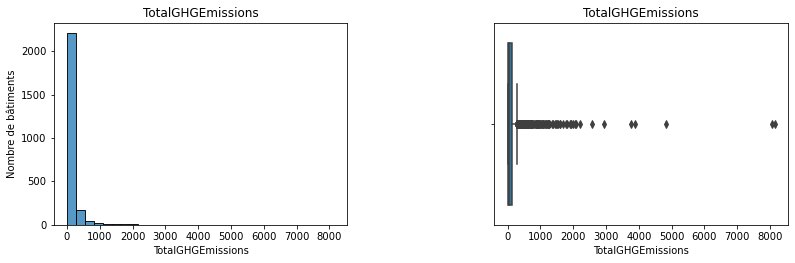

In [173]:
# Quelle est l'échelle de grandeur de la variable 'TotalGHGEmissions'
fig = plt.figure()
plt.gcf().subplots_adjust(left = 0.3, bottom = 0.3,
                       right = 2., top = 1, wspace = 0.5, hspace = 6)


ax1 = fig.add_subplot(1, 2, 1)
ax1 = sns.histplot(data=data_precleaned, x='TotalGHGEmissions',log_scale=False, bins=30)
ax1.set_title("TotalGHGEmissions")
ax1.set_ylabel("Nombre de bâtiments")

ax2 = fig.add_subplot(1, 2,2)
ax2 = sns.boxplot(data=data_precleaned, x='TotalGHGEmissions')
ax2.set_title("TotalGHGEmissions")
ax2.set_ylabel("")
plt.show()

plt.show()

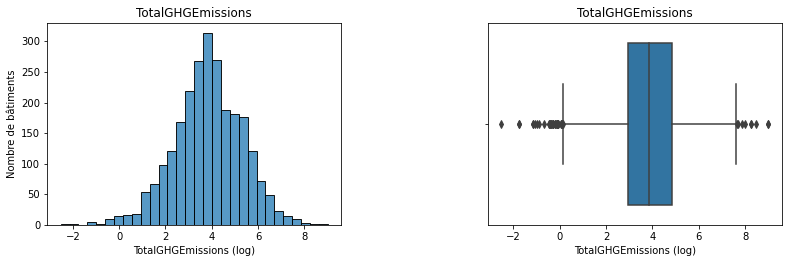

In [174]:
# Transformation en échelle log
data_precleaned['TotalGHGEmissions (log)'] = np.log(data_precleaned['TotalGHGEmissions'])

# Vérification avec des graphiques
fig = plt.figure()
plt.gcf().subplots_adjust(left = 0.3, bottom = 0.3,
                       right = 2., top = 1, wspace = 0.5, hspace = 6)


ax1 = fig.add_subplot(1, 2, 1)
ax1 = sns.histplot(data=data_precleaned, x='TotalGHGEmissions (log)',log_scale=False, bins=30)
ax1.set_title("TotalGHGEmissions")
ax1.set_ylabel("Nombre de bâtiments")

ax2 = fig.add_subplot(1, 2,2)
ax2 = sns.boxplot(data=data_precleaned, x='TotalGHGEmissions (log)')
ax2.set_title('TotalGHGEmissions')
ax2.set_ylabel("")
plt.show()

plt.show()

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>

## <div class="alert alert-block alert-info"><a name="C43">4.3. Transformation des variables 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA' et 'ThirdLargestPropertyUseTypeGFA' </a></div>

Pour le projet, je pense qu'il serait plus interessant d'avoir le pourcentage de la superficie total plutot que la superficie en elle même



### <div class="alert alert-block alert-info"><a name="C431">4.3.1. 'LargestPropertyUseType' </a></div>



In [175]:
data_precleaned['LargestPropertyUseTypeProportion'] = ((data_precleaned['LargestPropertyUseTypeGFA']*100)/
                                                       data_precleaned['PropertyGFATotal'])

In [176]:
data_precleaned['LargestPropertyUseTypeProportion'].describe()

count    2483.000000
mean       82.842067
std        20.886784
min        18.345763
25%        66.050621
50%        94.683871
75%       100.000000
max       101.715994
Name: LargestPropertyUseTypeProportion, dtype: float64

Il y a des valeurs supérieures à 100% ce qui n'est pas possible. Pourquoi?

In [177]:
data_precleaned[['PropertyGFATotal','LargestPropertyUseTypeGFA', 
                 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA',
                 'LargestPropertyUseTypeProportion']].loc[data_precleaned['LargestPropertyUseTypeProportion']>100]

PropertyGFATotal  LargestPropertyUseTypeGFA  \
22            333176.0                   336640.0   
23            333176.0                   336640.0   
161            74468.0                    74768.0   
171           130862.0                   132060.0   
183           131013.0                   131909.0   
...                ...                        ...   
6360          116101.0                   117299.0   
6382          137138.0                   138602.0   
6383          137138.0                   138602.0   
6532          149856.0                   149934.0   
6686           68072.0                    68916.0   

      SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
22                                0.0                             0.0   
23                                0.0                             0.0   
161                               0.0                             0.0   
171                               0.0                             0.0   
183                               0.0                             0.0   
...                               ...                             ...   
6360                              0.0                             0.0   
6382                              0.0                             0.0   
6383                              0.0                             0.0   
6532                              0.0                             0.0   
6686                              0.0                             0.0   

      LargestPropertyUseTypeProportion  
22                          101.039691  
23                          101.039691  
161                         100.402858  
171                         100.915468  
183                         100.683902  
...                                ...  
6360                        101.031860  
6382                        101.067538  
6383                        101.067538  
6532                        100.052050  
6686                        101.239864  

[88 rows x 5 columns]

Les valeurs supérieures à 100 sont du à une différence entre ce qui 'PropertyGFATotal' et 'LargestPropertyUseTypeGFA'
Je vais les imposer à 100. 

In [178]:
data_precleaned.loc[data_precleaned['LargestPropertyUseTypeProportion']>100, 'LargestPropertyUseTypeProportion'] = 100.

In [179]:
data_precleaned['LargestPropertyUseTypeProportion'].describe()

count    2483.000000
mean       82.817013
std        20.865482
min        18.345763
25%        66.050621
50%        94.683871
75%       100.000000
max       100.000000
Name: LargestPropertyUseTypeProportion, dtype: float64

**Vérification que les propriétés à 100% n'ont pas de Second ou 3eme usages.**

In [180]:
data_cent = data_precleaned.loc[data_precleaned['LargestPropertyUseTypeProportion']==100]

data_cent['SecondLargestPropertyUseType'].value_counts()

Without         1083
Sport center       5
Parking            3
Other              2
Office             1
Name: SecondLargestPropertyUseType, dtype: int64

Pour les seconds usage mentionnés, y a t-il une superficie?

In [181]:
data_second = data_cent.loc[data_cent['SecondLargestPropertyUseType']!= 'Without']
data_second[['PropertyGFATotal','LargestPropertyUseTypeGFA', 
                 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA',
                 'LargestPropertyUseTypeProportion']]

PropertyGFATotal  LargestPropertyUseTypeGFA  \
159            50017.0                    50017.0   
160            50017.0                    50017.0   
307          1585960.0                  1585960.0   
308          1585960.0                  1585960.0   
524           542305.0                   542305.0   
770            69492.0                    69800.0   
771            69492.0                    69800.0   
1462           23000.0                    23000.0   
3295           43661.0                    43661.0   
6274           45000.0                    45000.0   
6275           45000.0                    45000.0   

      SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
159                               0.0                             0.0   
160                               0.0                             0.0   
307                               0.0                             0.0   
308                               0.0                             0.0   
524                               0.0                             0.0   
770                               0.0                             0.0   
771                               0.0                             0.0   
1462                              0.0                             0.0   
3295                              0.0                             0.0   
6274                              0.0                             0.0   
6275                              0.0                             0.0   

      LargestPropertyUseTypeProportion  
159                              100.0  
160                              100.0  
307                              100.0  
308                              100.0  
524                              100.0  
770                              100.0  
771                              100.0  
1462                             100.0  
3295                             100.0  
6274                             100.0  
6275                             100.0

Toutes les superficies pour le second usage sont égale à 0. Il y a donc une incohérence dans le jeu de données. Je préfère supprimé ces propriétés.

In [182]:
data_precleaned.drop(index = data_second.index, inplace =True)

In [183]:
# Pour les 3eme usage
print("Les catégories possible sont:", data_cent['ThirdLargestPropertyUseType'].value_counts())
print("Les superficies possible sont:", data_cent['ThirdLargestPropertyUseTypeGFA'].unique())

Les catégories possible sont: Without    1094
Name: ThirdLargestPropertyUseType, dtype: int64
Les superficies possible sont: [0.]


Les bâtiments dont le principale usage correspond à 100% de la superficie n'ont pas de 3eme usage.

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>

### <div class="alert alert-block alert-info"><a name="C432">4.3.2. 'SecondLargestPropertyUseTypeGFA' </a></div>



In [184]:
data_precleaned['SecondLargestPropertyUseTypeProportion'] = ((data_precleaned['SecondLargestPropertyUseTypeGFA']*100)/
                                                       data_precleaned['PropertyGFATotal'])

In [185]:
data_precleaned['SecondLargestPropertyUseTypeProportion'].describe()

count    2472.000000
mean        9.989342
std        14.254602
min         0.000000
25%         0.000000
50%         0.000000
75%        19.594304
max        50.000000
Name: SecondLargestPropertyUseTypeProportion, dtype: float64

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>

### <div class="alert alert-block alert-info"><a name="C433">4.3.3. 'ThirdLargestPropertyUseTypeGFA' </a></div>




In [186]:
data_precleaned['ThridLargestPropertyUseTypeProportion'] = ((data_precleaned['ThirdLargestPropertyUseTypeGFA']*100)/
                                                       data_precleaned['PropertyGFATotal'])

In [187]:
data_precleaned['ThridLargestPropertyUseTypeProportion'].describe()

count    2472.000000
mean        1.816694
std         5.035949
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        33.333333
Name: ThridLargestPropertyUseTypeProportion, dtype: float64

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>

### <div class="alert alert-block alert-info"><a name="C434">4.3.4. Suppression des variables 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA' et 'ThirdLargestPropertyUseTypeGFA' </a></div>




In [188]:
data_precleaned.drop(columns=['LargestPropertyUseTypeGFA', 
                             'SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseTypeGFA'], axis=1, inplace=True)

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>

## <div class="alert alert-block alert-info"><a name="C44">4.4. Transformation des variables concernant la consommation énergétique </a></div>

Pour le projet, je pense qu'il serait plus interessant d'avoir le pourcentage de la consommation d'élèctricité, de gaz naturel plutôt que les valeurs en kBtu.



### <div class="alert alert-block alert-info"><a name="C441">4.4.1. Transformation en échelle logarithmique de la variable 'SiteEnergyUse(kBtu)'</a></div>



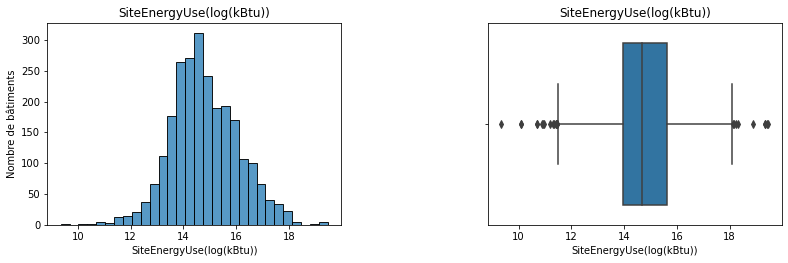

In [189]:
# Transformation en log
data_precleaned['SiteEnergyUse(log(kBtu))'] = np.log(data_precleaned['SiteEnergyUse(kBtu)'])

# Vérification avec des graphiques
fig = plt.figure()
plt.gcf().subplots_adjust(left = 0.3, bottom = 0.3,
                       right = 2., top = 1, wspace = 0.5, hspace = 6)


ax1 = fig.add_subplot(1, 2, 1)
ax1 = sns.histplot(data=data_precleaned, x='SiteEnergyUse(log(kBtu))',log_scale=False, bins=30)
ax1.set_title("SiteEnergyUse(log(kBtu))")
ax1.set_ylabel("Nombre de bâtiments")

ax2 = fig.add_subplot(1, 2,2)
ax2 = sns.boxplot(data=data_precleaned, x='SiteEnergyUse(log(kBtu))')
ax2.set_title("SiteEnergyUse(log(kBtu))")
ax2.set_ylabel("")
plt.show()

plt.show()

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>

### <div class="alert alert-block alert-info"><a name="C442">4.4.2. Transformation de la variable 'Electricity(kBtu)' </a></div>



In [190]:
data_precleaned['Electricity(%)'] = ((data_precleaned['Electricity(kBtu)']*100)/
                                                       data_precleaned['SiteEnergyUse(kBtu)'])

In [191]:
data_precleaned['Electricity(%)'].describe()

count    2472.000000
mean       69.891527
std        26.470305
min         0.000086
25%        48.519649
50%        70.795937
75%        99.999901
max       100.008740
Name: Electricity(%), dtype: float64

Les valeurs au dessus de 100% sont impossibles. Je les rajuste à 100%

In [192]:
data_precleaned.loc[data_precleaned['Electricity(%)']>100, 'Electricity(%)'] = 100.

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>

### <div class="alert alert-block alert-info"><a name="C443">4.4.3. Transformation de la variable 'Naturalgas(kBtu)' </a></div>



In [193]:
data_precleaned['NaturalGas(%)'] = ((data_precleaned['NaturalGas(kBtu)']*100)/
                                                       data_precleaned['SiteEnergyUse(kBtu)'])

In [194]:
data_precleaned['NaturalGas(%)'].describe()

count    2472.000000
mean       28.150242
std        26.543547
min         0.000000
25%         0.000000
50%        25.169282
75%        49.798197
max        99.999906
Name: NaturalGas(%), dtype: float64

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>

### <div class="alert alert-block alert-info"><a name="C444">4.4.4. Transformation de la variable 'SteamUse(kBtu)' </a></div>



In [195]:
data_precleaned['SteamUse(%)'] = ((data_precleaned['SteamUse(kBtu)']*100)/
                                                       data_precleaned['SiteEnergyUse(kBtu)'])

In [196]:
data_precleaned['SteamUse(%)'].describe()

count    2472.000000
mean        1.923936
std         8.757103
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        83.099834
Name: SteamUse(%), dtype: float64

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>

### <div class="alert alert-block alert-info"><a name="C445">4.4.5. Transformation de la variable 'OtherFuelUse(kBtu)' </a></div>



In [197]:
data_precleaned['OtherFuelUse(%)'] = ((data_precleaned['OtherFuelUse(kBtu)']*100)/
                                                       data_precleaned['SiteEnergyUse(kBtu)'])

In [198]:
data_precleaned['OtherFuelUse(%)'].describe()

count    2472.000000
mean        0.035506
std         0.800396
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        30.419863
Name: OtherFuelUse(%), dtype: float64

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>

### <div class="alert alert-block alert-info"><a name="C446">4.4.6. Vérification que la somme est proche de 100% </a></div>



In [199]:
data_precleaned.loc[(data_precleaned['Electricity(%)']+data_precleaned['NaturalGas(%)']+
                     data_precleaned['SteamUse(%)']+data_precleaned['OtherFuelUse(%)'])>100.005]

Empty DataFrame
Columns: [OSEBuildingID, BuildingType, PrimaryPropertyType, CouncilDistrictCode, YearBuilt, NumberofBuildings, NumberofFloors, PropertyGFATotal, PropertyGFAParking, PropertyGFABuilding(s), LargestPropertyUseType, SecondLargestPropertyUseType, ThirdLargestPropertyUseType, ENERGYSTARScore, SiteEnergyUse(kBtu), SteamUse(kBtu), Electricity(kBtu), NaturalGas(kBtu), OtherFuelUse(kBtu), TotalGHGEmissions, DefaultData, ComplianceStatus, Outlier, Latitude, Longitude, ZipCode, NumberOfUse, BuildingAge, TotalGHGEmissions (log), LargestPropertyUseTypeProportion, SecondLargestPropertyUseTypeProportion, ThridLargestPropertyUseTypeProportion, SiteEnergyUse(log(kBtu)), Electricity(%), NaturalGas(%), SteamUse(%), OtherFuelUse(%)]
Index: []

[0 rows x 37 columns]

La somme des pourcentage n'étant pas supérieur à 100% de plus de 0.5%, je considére que la normalisation est correcte.

In [200]:
# Suppression des variables 'Electricity(kBtu)', 'Naturalgas(kBtu)','SteamUse(kBtu)' et 'OtherFuelUse(kBtu)'
data_precleaned.drop(columns=['Electricity(kBtu)', 'NaturalGas(kBtu)',
                              'SteamUse(kBtu)', 'OtherFuelUse(kBtu)'], axis=1, inplace=True)

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>

## <div class="alert alert-block alert-info"><a name="C45">4.5. Transformation des variables 'LargestPropertyUseType', 'SecondLargestPropertyUseType' et 'ThirdLargestPropertyUseType' </a></div>

Le nombre de catégories possible pour le type d'usage est assez élévé et certaines catégories représentent peu de propriétés. Je souhaite donc voir s'il est possible de regrouper les catégories en fonction de leur consommation c'est-à-dire associer un usage à un type de consommation. Je souhaiterais créer 4 catégories:
- usage ayant une consommation d'energie et une émission de CO2 faibles
- usage ayant une consommation d'energie et une émission de CO2 moyennes
- usage ayant une consommation d'energie et une émission de CO2 importantes
- usage ayant une consommation d'energie et une émission de CO2 très importantes

Pour cela, je vais utiliser l'algorithme des k-means.

<Figure size 432x288 with 0 Axes>

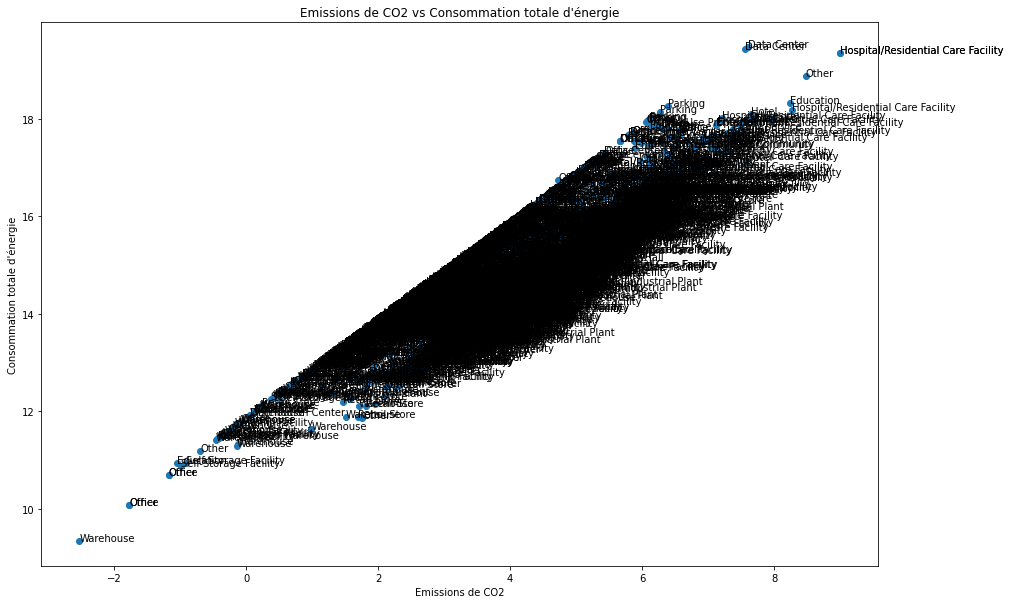

In [201]:
data_kmeans = data_precleaned[['TotalGHGEmissions (log)','SiteEnergyUse(log(kBtu))']]
data_kmeans_cat = data_precleaned['LargestPropertyUseType']

# Représentation graphique 
x = list(data_kmeans['TotalGHGEmissions (log)'])
y = list(data_kmeans['SiteEnergyUse(log(kBtu))'])
text = data_precleaned['LargestPropertyUseType']

fig = plt.figure()
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(x, y)
plt.title("Emissions de CO2 vs Consommation totale d'énergie")
plt.xlabel("Emissions de CO2")
plt.ylabel("Consommation totale d'énergie")
for i, txt in enumerate(text):
    ax.annotate(txt, (x[i],y[i]))

In [202]:
# Importation des librairies de Scikit-learn nécessaire
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardisation des données
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data_kmeans)

# Utilisation de l'algorithme du Kmeans pour créer les 4 catégories
model = KMeans(n_clusters=4)

model.fit(data_kmeans)

KMeans(n_clusters=4)

In [203]:
kmeans_cat = model.predict(data_kmeans)

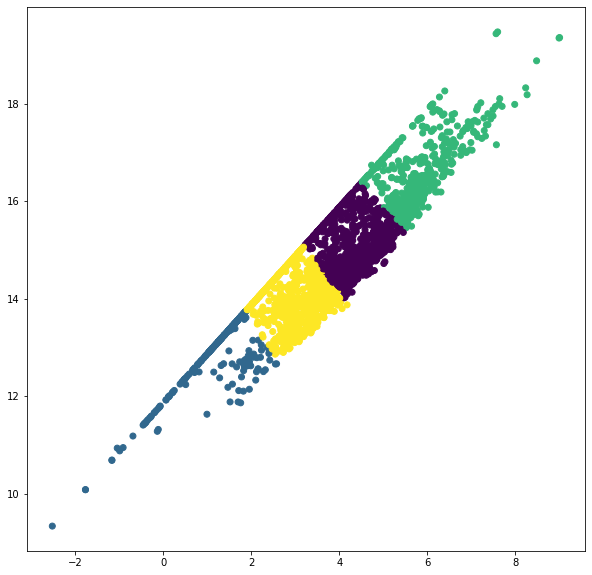

In [204]:
# Représentation graphique
fig = plt.figure(figsize=(10,10))
plt.scatter(data_kmeans['TotalGHGEmissions (log)'],data_kmeans['SiteEnergyUse(log(kBtu))'], c=kmeans_cat)

In [205]:
# Insertion des catégories déterminer avec le Kmeans dans le jeu de données
data_precleaned['k_means cat'] = kmeans_cat

In [206]:
# Création d'un tableau de contingence pour voir si les catégories nouvellement créées peuvent être associé à un usage spécifique
X = 'LargestPropertyUseType'
Y = 'k_means cat'

cont = data_precleaned[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont


k_means cat                             0      1      2      3  Total
LargestPropertyUseType                                               
Data Center                           NaN    NaN    5.0    NaN      5
Distribution Center                  19.0   15.0    6.0   52.0     92
Education                           131.0    6.0   39.0   57.0    233
Entertainment                        37.0    5.0   20.0   22.0     84
Hospital/Residential Care Facility   23.0    2.0   43.0   24.0     92
Hotel                                43.0    4.0   59.0    6.0    112
Laboratory                            1.0    NaN   16.0    NaN     17
Manufacturing/Industrial Plant        4.0    2.0    1.0    4.0     11
Meeting Hall                          8.0    2.0    2.0    8.0     20
Mixed Use Property                    1.0    NaN    2.0    2.0      5
Multifamily Housing                   6.0    2.0    2.0    5.0     15
Office                              294.0   54.0  136.0  254.0    738
Other                                71.0   19.0   39.0   34.0    163
Parking                              11.0    NaN   14.0    3.0     28
Prison/Incarceration                  NaN    NaN    NaN    3.0      3
Public service                        NaN    NaN    6.0    6.0     12
Refrigerated Warehouse                3.0    5.0    NaN   13.0     21
Residence Hall                       23.0    4.0    6.0   10.0     43
Restaurant/Bar                       11.0    2.0    9.0    2.0     24
Retail Store                         74.0   21.0   26.0   66.0    187
Self-Storage Facility                 5.0   17.0    NaN   28.0     50
Senior Care Community                 8.0    NaN   16.0    1.0     25
Sport center                          3.0    NaN    2.0    NaN      5
Supermarket/Grocery Store            13.0    NaN   33.0    2.0     48
Warehouse                            89.0   83.0    6.0  152.0    330
Worship Facility                     20.0   18.0    2.0   69.0    109
Total                               898.0  261.0  490.0  823.0   2472

L'utilisation de l'algorithme du Kmeans en utilisant les émissions de CO2 et la consommation totale d'énergie pour créer cette nouvelle variable n'est pas satisfaisante car un usage de bâtiment peut être associé à plusieurs catégories.

In [207]:
# Suppression des catégories créées avec le Kmeans du jeu de données
data_precleaned.drop(columns=['k_means cat'], axis=1, inplace=True)

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>

## <div class="alert alert-block alert-info"><a name="C45">4.5. Transformation des variables concernant la superficie des bâtiments </a></div>



In [208]:
data_precleaned['PropertyGFAParking(%)'] = ((data_precleaned['PropertyGFAParking']*100)/
                                                       data_precleaned['PropertyGFATotal'])

In [209]:
data_precleaned['PropertyGFABuilding(s)(%)'] = ((data_precleaned['PropertyGFABuilding(s)']*100)/
                                                       data_precleaned['PropertyGFATotal'])

In [210]:
data_precleaned.loc[(data_precleaned['PropertyGFAParking(%)']+data_precleaned['PropertyGFABuilding(s)(%)'])>100.005]

Empty DataFrame
Columns: [OSEBuildingID, BuildingType, PrimaryPropertyType, CouncilDistrictCode, YearBuilt, NumberofBuildings, NumberofFloors, PropertyGFATotal, PropertyGFAParking, PropertyGFABuilding(s), LargestPropertyUseType, SecondLargestPropertyUseType, ThirdLargestPropertyUseType, ENERGYSTARScore, SiteEnergyUse(kBtu), TotalGHGEmissions, DefaultData, ComplianceStatus, Outlier, Latitude, Longitude, ZipCode, NumberOfUse, BuildingAge, TotalGHGEmissions (log), LargestPropertyUseTypeProportion, SecondLargestPropertyUseTypeProportion, ThridLargestPropertyUseTypeProportion, SiteEnergyUse(log(kBtu)), Electricity(%), NaturalGas(%), SteamUse(%), OtherFuelUse(%), PropertyGFAParking(%), PropertyGFABuilding(s)(%)]
Index: []

[0 rows x 35 columns]

In [211]:
# Suppression des variables 'PropertyGFAParking' et 'PropertyGFABuilding(s)'
data_precleaned.drop(columns=['PropertyGFAParking', 'PropertyGFABuilding(s)'], axis=1, inplace=True)

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>
# <div class="alert alert-block alert-info"><a name="C5">5. Analyse exploratoire </a></div>

A présent que le jeu de données a été nettoyer, je vais faire une rapide analyse exploratoire



## <div class="alert alert-block alert-info"><a name="C51">5.1. Des valeurs manquantes sont-elles encore présentes? </a></div>



<AxesSubplot:>

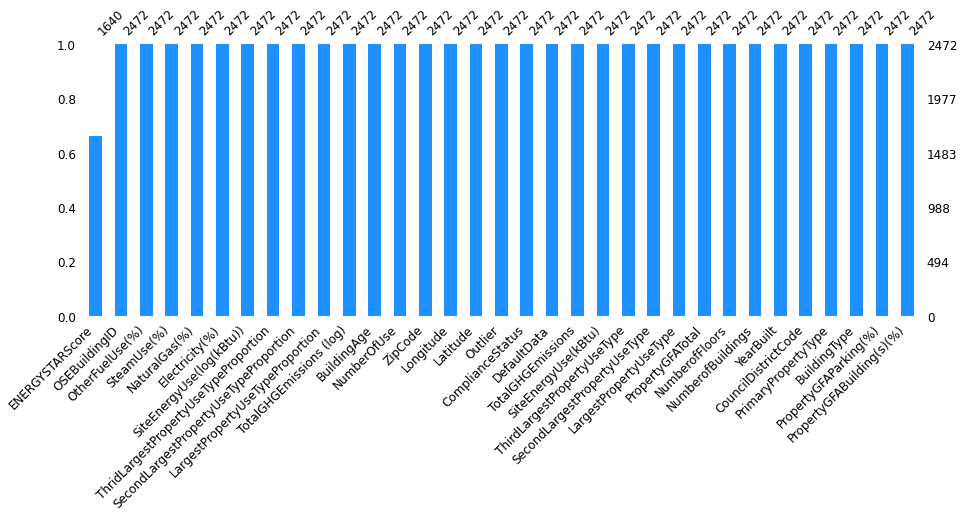

In [212]:
# Représentation graphique du taux de remplissage du jeu de données sous forme d'histogramme
msno.bar(data_precleaned, color="dodgerblue",sort="ascending", figsize=(15,5), fontsize=12)

<AxesSubplot:>

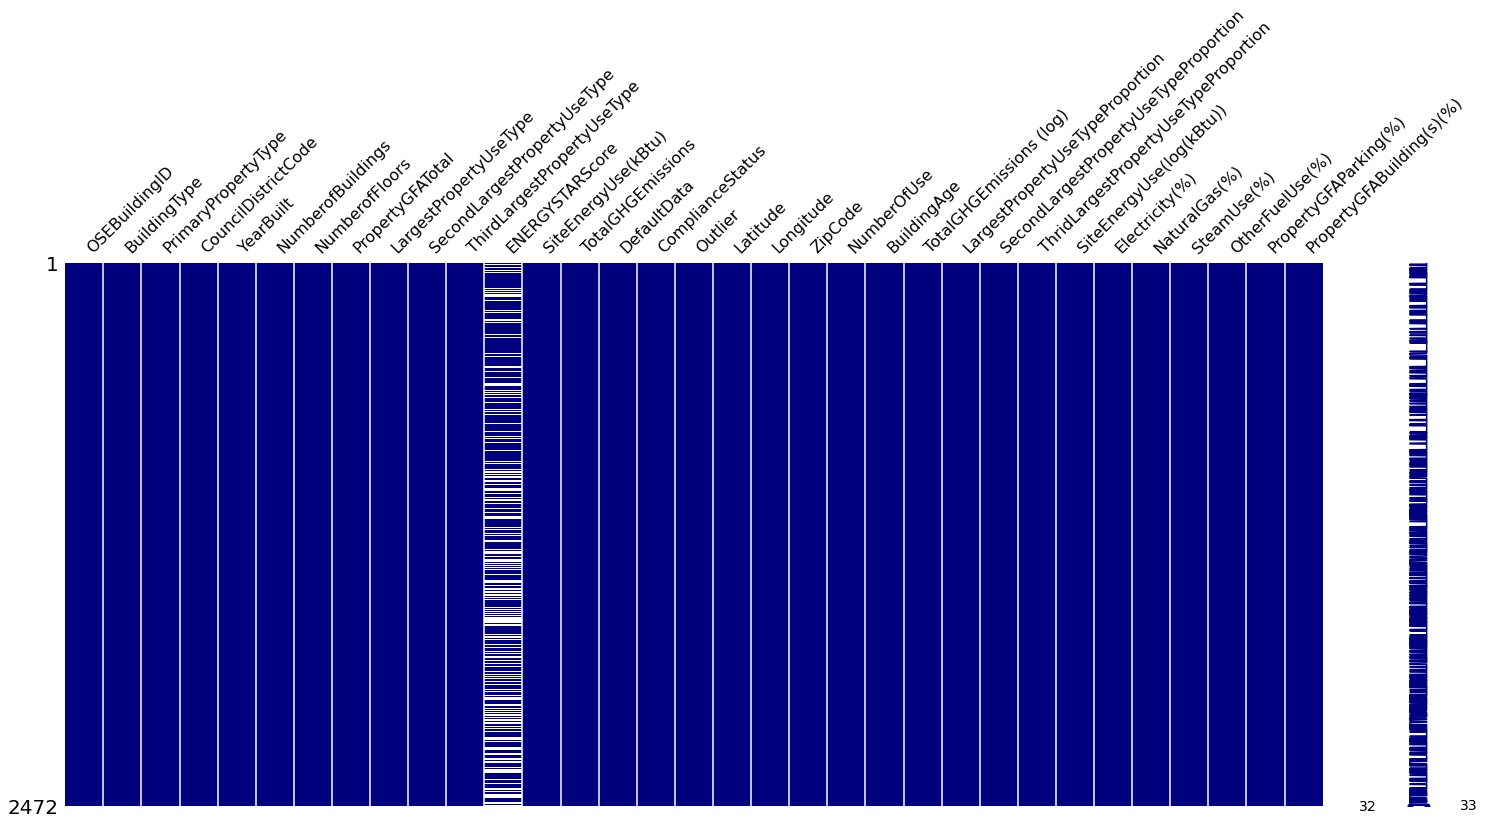

In [213]:
# Représentation graphique du taux de remplissage du jeu de données sous forme de matrice
msno.matrix(data_precleaned, color=(0,0,0.5))

Il y a des valeurs manquantes uniquement pour la variable 'ENERGYSTARScore'. En fonction des variables utilisées pour la modélisation, j'utiliserais soit un jeu de données sans cette variable soit sans les valeurs manquantes.

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>

## <div class="alert alert-block alert-info"><a name="C52">5.2. Analyses univariées de certaines variables</a></div>

In [214]:
data_analyse= data_precleaned.copy()

In [215]:
# Importation des différentes couleurs possibles pour créer 
# des listes aléatoires de couleurs de la même taille que le nombre de catégories
import random
dict_couleur = matplotlib.colors.cnames 

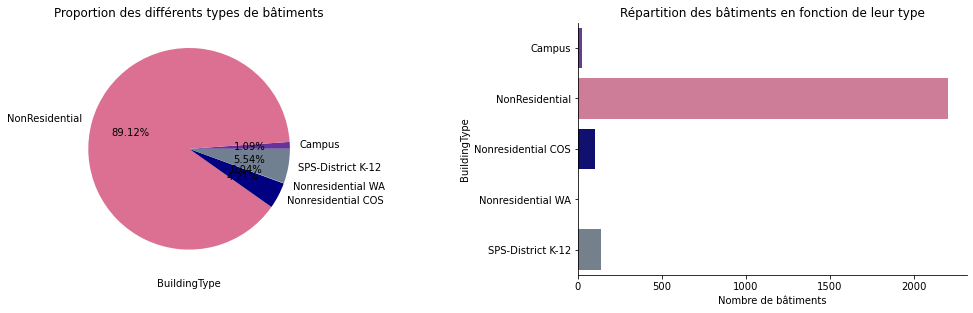

In [216]:
# Répartition des différentes propriétés en fonction de 'BuildingType'

fig = plt.figure(figsize=(5,5))
plt.gcf().subplots_adjust(left = 0.3, bottom = 0.3,
                       right = 3, top = 1, wspace = 0.5, hspace = 15)

label = data_analyse['BuildingType'].value_counts(normalize=True).sort_index().index.tolist()

#Création d'une liste de couleurs
n= len(label)
color_selected = random.choices(list(dict_couleur.items()), k=n)
color = []
for i in range(len(color_selected)):
    color.append(color_selected[i][0])


ax1 = fig.add_subplot(1, 2, 1)
ax1.pie(data_analyse['BuildingType'].value_counts(normalize=True).sort_index(), colors= color,
        labels= label,autopct='%1.2f%%')
ax1.set_title("Proportion des différents types de bâtiments")

plt.xlabel('BuildingType')
plt.xticks(rotation=0)


ax2 = fig.add_subplot(1, 2, 2)
ax2 = sns.countplot(y='BuildingType', data=data_analyse, order=label, palette=color)
ax2.set_xlabel("Nombre de bâtiments")
plt.title("Répartition des bâtiments en fonction de leur type")
sns.despine()
plt.show()

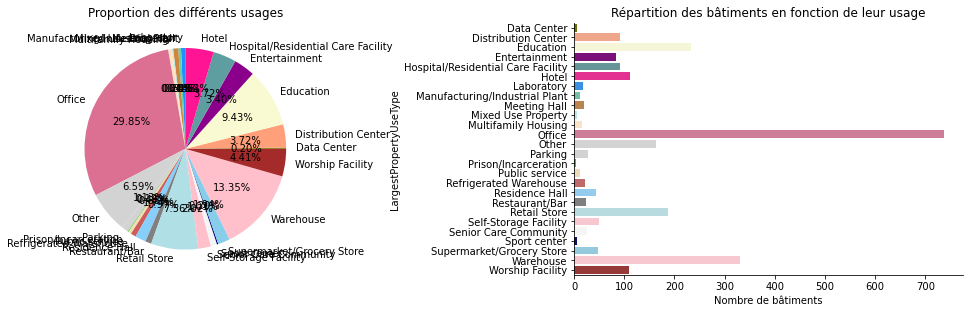

In [217]:
# Répartition des différentes propriétés en fonction de 'LargestPropertyUseType'

fig = plt.figure(figsize=(5,5))
plt.gcf().subplots_adjust(left = 0.3, bottom = 0.3,
                       right = 3, top = 1, wspace = 0.5, hspace = 15)

label = data_analyse['LargestPropertyUseType'].value_counts(normalize=True).sort_index().index.tolist()

#Création d'une liste de couleurs
n= len(label)
color_selected = random.choices(list(dict_couleur.items()), k=n)
color = []
for i in range(len(color_selected)):
    color.append(color_selected[i][0])


ax1 = fig.add_subplot(1, 2, 1)
ax1.pie(data_analyse['LargestPropertyUseType'].value_counts(normalize=True).sort_index(), colors= color,
        labels= label,autopct='%1.2f%%')
ax1.set_title("Proportion des différents usages")


ax2 = fig.add_subplot(1, 2, 2)
ax2 = sns.countplot(y='LargestPropertyUseType', data=data_analyse, order=label, palette=color)
ax2.set_xlabel("Nombre de bâtiments")
plt.title("Répartition des bâtiments en fonction de leur usage")
sns.despine()
plt.show()

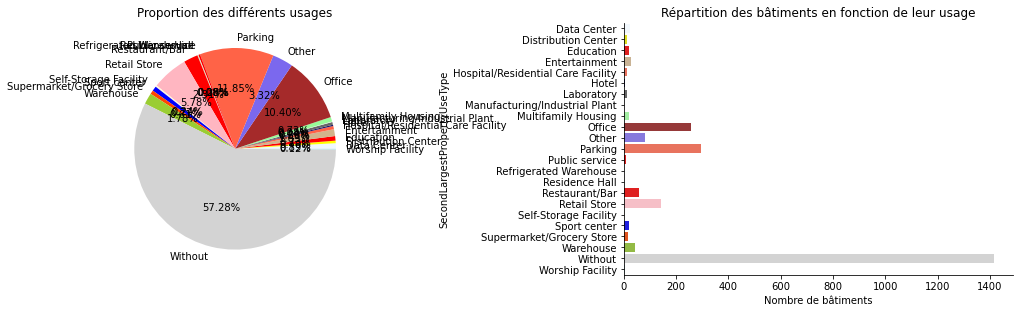

In [218]:
# Répartition des différentes propriétés en fonction de 'SecondLargestPropertyUseType'
fig = plt.figure(figsize=(5,5))
plt.gcf().subplots_adjust(left = 0.3, bottom = 0.3,
                       right = 3, top = 1, wspace = 0.5, hspace = 15)

label = data_analyse['SecondLargestPropertyUseType'].value_counts(normalize=True).sort_index().index.tolist()

#Création d'une liste de couleurs
n= len(label)
color_selected = random.choices(list(dict_couleur.items()), k=n)
color = []
for i in range(len(color_selected)):
    color.append(color_selected[i][0])


ax1 = fig.add_subplot(1, 2, 1)
ax1.pie(data_analyse['SecondLargestPropertyUseType'].value_counts(normalize=True).sort_index(), colors= color,
        labels= label,autopct='%1.2f%%')
ax1.set_title("Proportion des différents usages")


ax2 = fig.add_subplot(1, 2, 2)
ax2 = sns.countplot(y='SecondLargestPropertyUseType', data=data_analyse, order=label, palette=color)
ax2.set_xlabel("Nombre de bâtiments")
plt.title("Répartition des bâtiments en fonction de leur usage")
sns.despine()
plt.show()

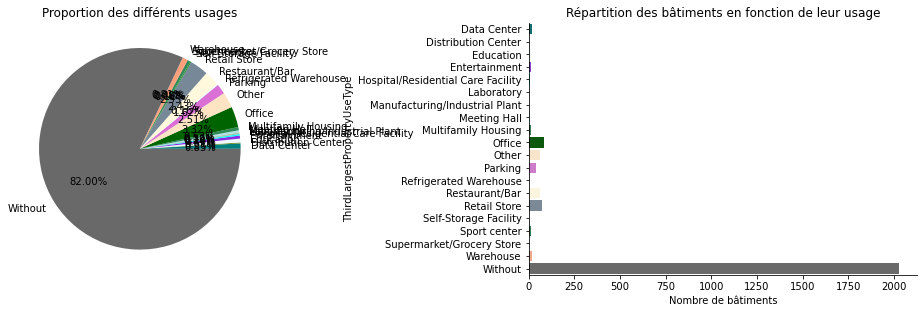

In [219]:
# Répartition des différentes propriétés en fonction de 'ThirdLargestPropertyUseType'
fig = plt.figure(figsize=(5,5))
plt.gcf().subplots_adjust(left = 0.3, bottom = 0.3,
                       right = 3, top = 1, wspace = 0.5, hspace = 15)

label = data_analyse['ThirdLargestPropertyUseType'].value_counts(normalize=True).sort_index().index.tolist()

#Création d'une liste de couleurs
n= len(label)
color_selected = random.choices(list(dict_couleur.items()), k=n)
color = []
for i in range(len(color_selected)):
    color.append(color_selected[i][0])


ax1 = fig.add_subplot(1, 2, 1)
ax1.pie(data_analyse['ThirdLargestPropertyUseType'].value_counts(normalize=True).sort_index(), colors= color,
        labels= label,autopct='%1.2f%%')
ax1.set_title("Proportion des différents usages")


ax2 = fig.add_subplot(1, 2, 2)
ax2 = sns.countplot(y='ThirdLargestPropertyUseType', data=data_analyse, order=label, palette=color)
ax2.set_xlabel("Nombre de bâtiments")
plt.title("Répartition des bâtiments en fonction de leur usage")
sns.despine()
plt.show()

La description des variables qualitatives permet de voir qu'elles ne sont pas équilibrées ce qui pourra introduire un biais lors de la modélisation.

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>

## <div class="alert alert-block alert-info"><a name="C53">5.3. Analyses multivariées </a></div>

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>

### <div class="alert alert-block alert-info"><a name="C531">5.3.1. Existe-il un lien entre certaines variables et les variables à prédire? </a></div>

Le but de cette analyse est de savoir si les variables 'TotalGHGEmissions' et 'SiteEnergyUse(kBtu)' sont dépendantes des autres variables.


#### <div class="alert alert-block alert-info"><a name="C5311">5.3.1.1. Vérification des conditions pour appliquer une ANOVA </a></div>


In [220]:
variables_to_predict = ['TotalGHGEmissions','SiteEnergyUse(kBtu)']
variables_to_predict_log = ['TotalGHGEmissions (log)','SiteEnergyUse(log(kBtu))']

In [221]:
# Test d'Agostino & Pearson
from scipy.stats import normaltest

for var_pred in variables_to_predict:
    print("Pour", var_pred)
    k2, p = normaltest(data_analyse[var_pred])
    if p>0.05:
        print("La condition de normalité pour effectuer une ANOVA est validée ")
    else:
        print("La condition de normalité pour effectuer une ANOVA n'est pas validée")
    print("")

Pour TotalGHGEmissions
La condition de normalité pour effectuer une ANOVA n'est pas validée

Pour SiteEnergyUse(kBtu)
La condition de normalité pour effectuer une ANOVA n'est pas validée



#### <div class="alert alert-block alert-info"><a name="C5311">5.3.1.1. Pour les variables qualitatives </a></div>


La condition de normalité n'étant pas vérifiée, une ANOVA classique ne peut pas être utilisées.

J'utiliserais donc le calcul du rapport de corrélation pour pouvoir estimer les liens entre les variables

**Calcul du rapport de corrélation**<br>
<br>
Le rapport de corrélation est aussi appelé eta carré. Il est compris entre 0 et 1:
- Si eta carré =0, les moyennes par classes sont toutes égales et il n'y a donc pas a priori de relation entre les variables
- Si eta carré = 1, les moyennes par classes sont très différentes et il existe à priori une relation entre les variables.

Pour interpréter les résultats, j'utiliserais les balises élaborées par Cohen(1988):
- autour de 0.01: petit effet
- autour de 0.06: effet moyen
- autoure de 0.14 et plus: effet important

In [222]:
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT

def eta_categories(eta):
    if eta < 0.01:
        #print("eta-carré =", eta, "-> A priori pas de corrélation")
        eta_cat = "Pas de correlation"
    if eta > 0.01 and eta_em < 0.06:
        #print("eta-carré =", eta, "-> A priori faible corrélation" )
        eta_cat = "Faible correlation"
    if eta > 0.06 and eta_em < 0.14:
        #print("eta-carré =", eta, "-> A priori corrélation moyenne" )
        eta_cat = "Correlation moyenne"
    if eta_em > 0.14:
        #print("eta-carré =", eta, "-> A priori forte corrélation" )
        eta_cat = "Forte correlation"
    return eta_cat 

In [223]:
# Pour faciliter l'étape de modélisation, je vais attribuer le dtype 'object' au variable qualitative
data_analyse[['OSEBuildingID', 'CouncilDistrictCode', 'ZipCode']] = data_analyse[['OSEBuildingID', 'CouncilDistrictCode', 'ZipCode']].astype(object)

#
data_analyse[['NumberofBuildings','NumberofFloors']] = data_analyse[['NumberofBuildings','NumberofFloors']].astype(int) 

In [224]:
variables_qualitatives = ['BuildingType', 'CouncilDistrictCode','PrimaryPropertyType','LargestPropertyUseType', 'SecondLargestPropertyUseType',
       'ThirdLargestPropertyUseType', 'ZipCode','DefaultData', 'ComplianceStatus','Outlier']



BuildingType


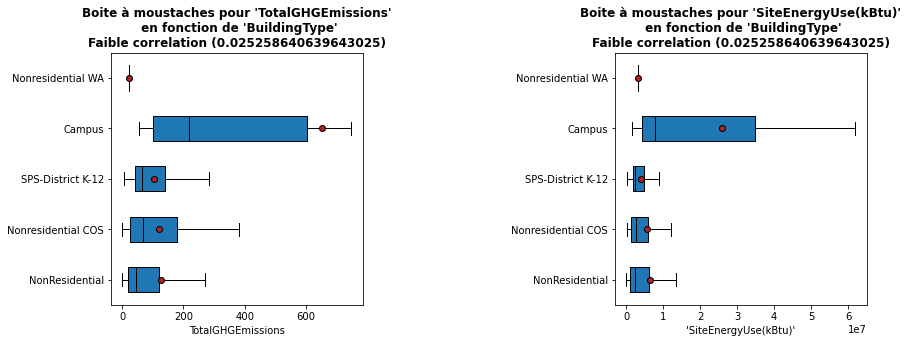

CouncilDistrictCode


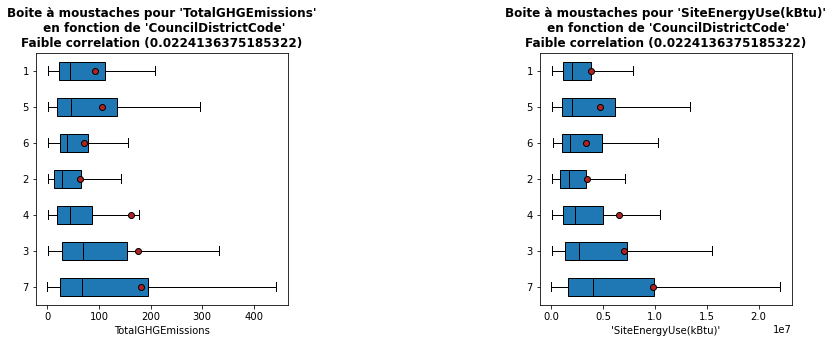

PrimaryPropertyType


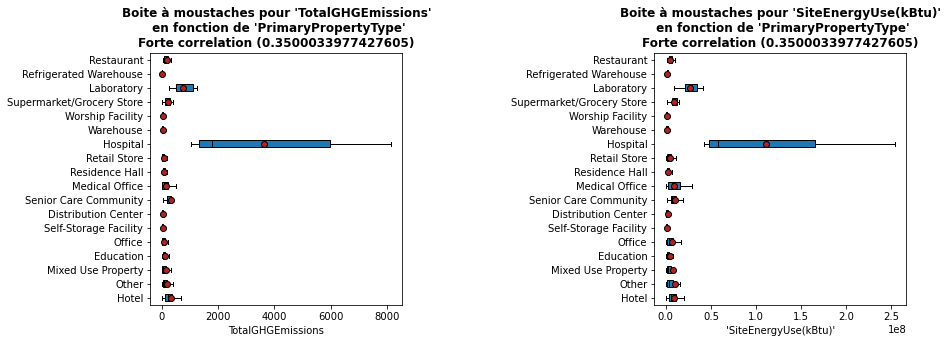

LargestPropertyUseType


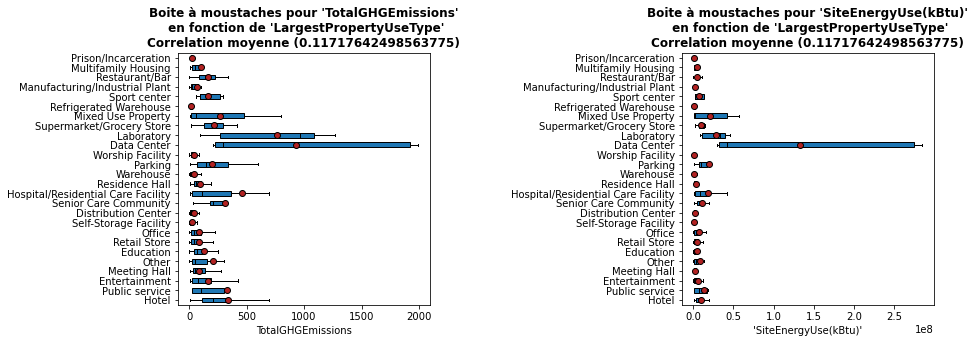

SecondLargestPropertyUseType


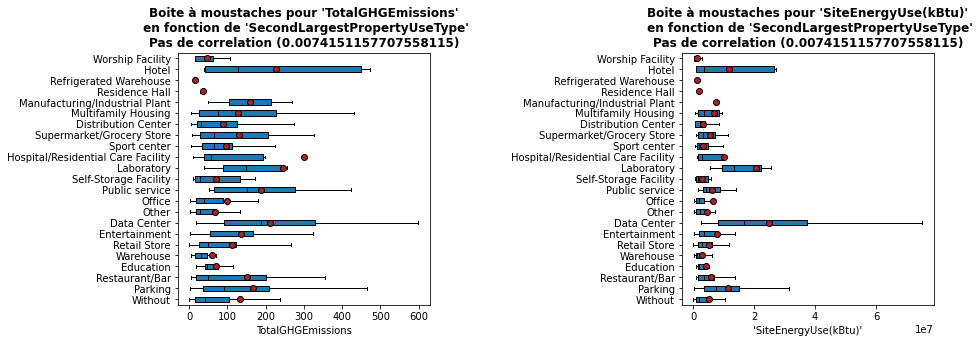

ThirdLargestPropertyUseType


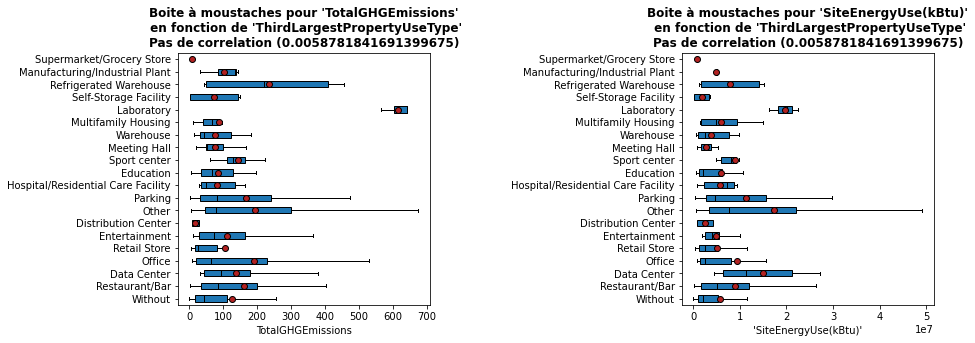

ZipCode


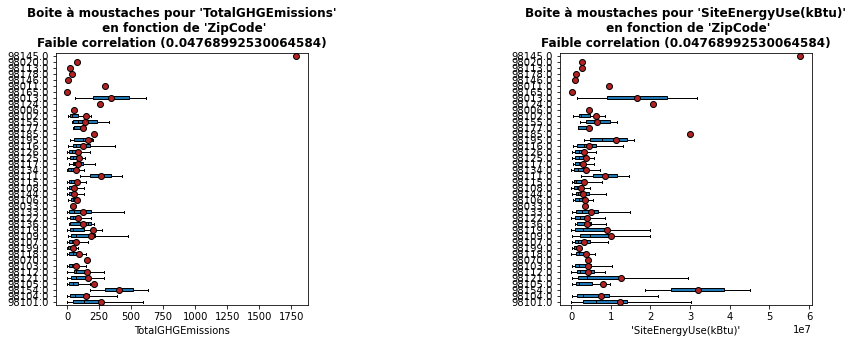

DefaultData


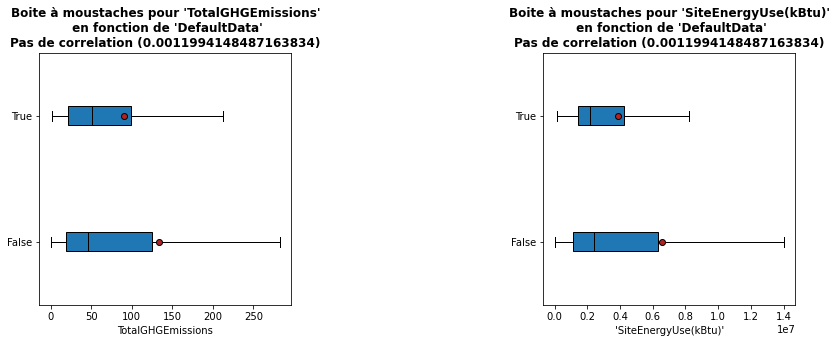

ComplianceStatus


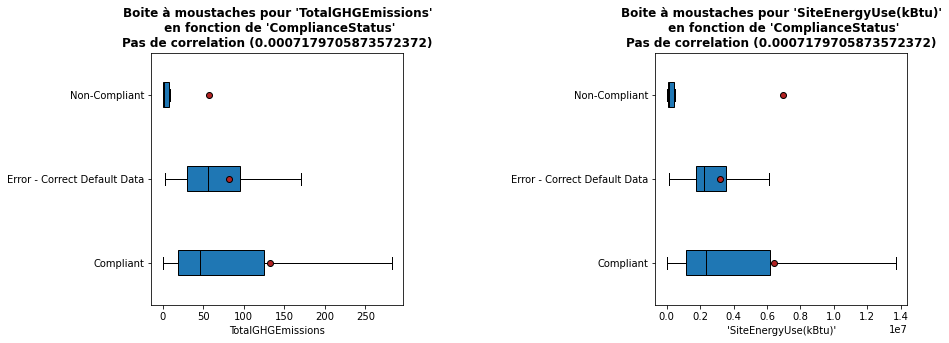

Outlier


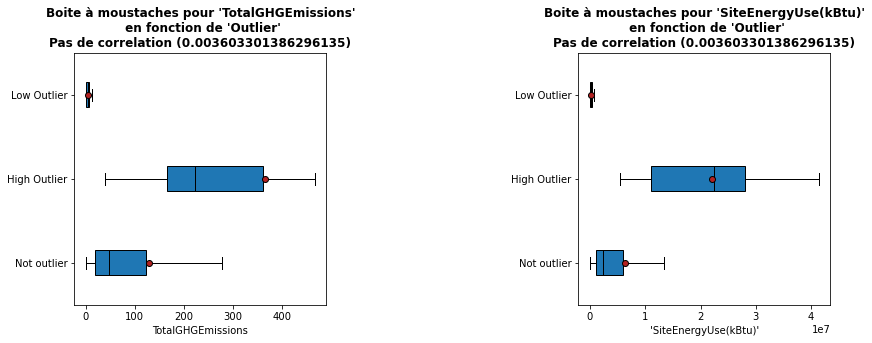

In [225]:

for var_qual in variables_qualitatives:
    #var_qual = 'BuildingType'
    print(var_qual)
    # Calcul de eta squared pour les émissions de CO2
    eta_em = eta_squared(data_analyse[var_qual],data_analyse['TotalGHGEmissions'])
    eta_cat_em = eta_categories(eta_em)

    # Calcul de eta squared pour la consommation totale d'énergie
    eta_co = eta_squared(data_analyse[var_qual],data_analyse['SiteEnergyUse(kBtu)'])
    eta_cat_co = eta_categories(eta_co)

    fig = plt.figure(figsize = (15, 5))
    plt.gcf().subplots_adjust(left = 0.3, bottom = 0.3,
                       right = 1, top = 1, wspace = 1, hspace = 0.5)    

    #Pour faire les boites à moustaches des émissions de CO2   
    modalites = data_analyse[var_qual].unique()
    groupes = []
    for m in modalites:
        groupes.append(data_analyse[data_analyse[var_qual]==m]['TotalGHGEmissions'])
    
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.set_title("Boite à moustaches pour 'TotalGHGEmissions'""\n"
                  " en fonction de '{var_qual}'""\n"
                  "{eta} ({eta_value})".format( var_qual=var_qual, eta=eta_cat_em, eta_value=eta_em),fontweight='bold')
    ax1.set(xlabel="TotalGHGEmissions", ylabel='')
    # Propriétés graphiques   
    medianprops = {'color':"black"}
    meanprops = {'marker':'o', 'markeredgecolor':'black','markerfacecolor':'firebrick'}
    plt.boxplot(groupes, labels=modalites,showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
    
    
   #Pour faire les boites à moustaches de la consommation totale d'énergie  
    modalites = data_analyse[var_qual].unique()
    groupes = []
    for m in modalites:
        groupes.append(data_analyse[data_analyse[var_qual]==m]['SiteEnergyUse(kBtu)'])
    
    ax2 = fig.add_subplot(1, 2, 2)
    ax2.set_title("Boite à moustaches pour 'SiteEnergyUse(kBtu)'""\n"
                  " en fonction de '{var_qual}'""\n"
                  "{eta} ({eta_value})".format( var_qual=var_qual, eta=eta_cat_em, eta_value=eta_em),fontweight='bold')
    ax2.set(xlabel="'SiteEnergyUse(kBtu)'", ylabel='')
    # Propriétés graphiques   
    medianprops = {'color':"black"}
    meanprops = {'marker':'o', 'markeredgecolor':'black','markerfacecolor':'firebrick'}
    plt.boxplot(groupes, labels=modalites,showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops) 
    
    plt.show()

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>

### <div class="alert alert-block alert-info"><a name="C531">5.3.1. Variables quantitatives </a></div>

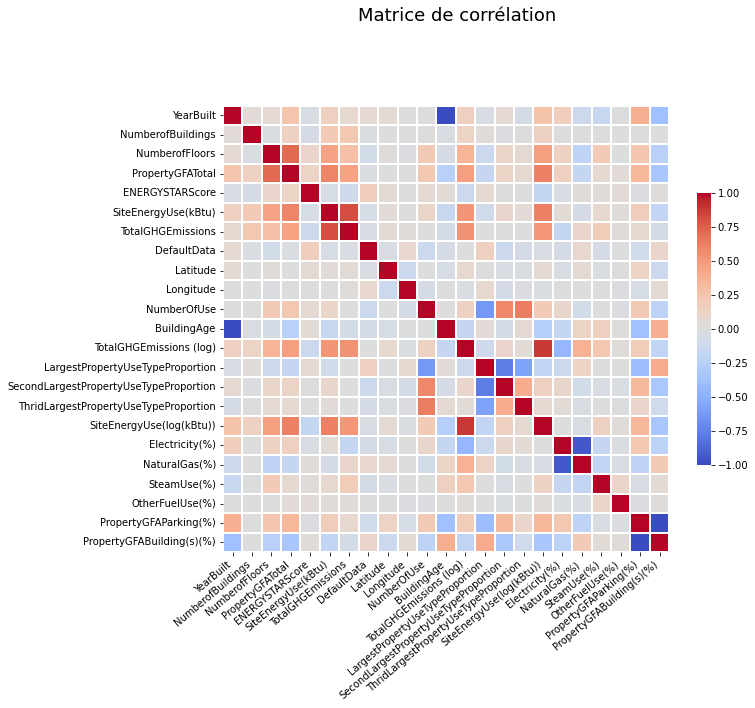

In [226]:
data_corr = data_analyse.corr()

# Représentation graphique de la matrice de corrélation
fig = plt.figure(figsize=(10, 10))
fig.text(0.45, 0.93, "Matrice de corrélation", ha='center', fontsize = 18)
ax = sns.heatmap(data_corr, square=True,linewidths=0.01, cmap="coolwarm",cbar_kws={"shrink":.5})
plt.setp(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

Lors de la sélection de variables pour la modèlisation, il sera possible d'essayer sans une des deux variables dont les corrélations sont élevées pour éviter des problèmes de multicollinéarité.

In [227]:
# Mise en place d'une fonction pour avoir une liste des variables corrélées (Ajoute uniquement la première des deux variables)
def correlatedFeatures(dataset, threshold):
    correlated_columns = set()
    correlations = dataset.corr()
    for i in range(len(correlations)):
        for j in range(i):
            if abs(correlations.iloc[i,j]) > threshold:
                correlated_columns.add(correlations.columns[i])
    return correlated_columns

In [228]:
# Utilisation de la fonction pour obtenir la liste 
liste_variables_corr = correlatedFeatures(data_analyse, 0.75)
liste_variables_corr

{'BuildingAge',
 'NaturalGas(%)',
 'PropertyGFABuilding(s)(%)',
 'SecondLargestPropertyUseTypeProportion',
 'SiteEnergyUse(log(kBtu))',
 'TotalGHGEmissions'}

In [229]:
data_pairplot = data_analyse[['NumberofBuildings', 'NumberofFloors', 'BuildingAge','ENERGYSTARScore',
                              'PropertyGFATotal','SiteEnergyUse(log(kBtu))','TotalGHGEmissions (log)']]

<Figure size 432x288 with 0 Axes>

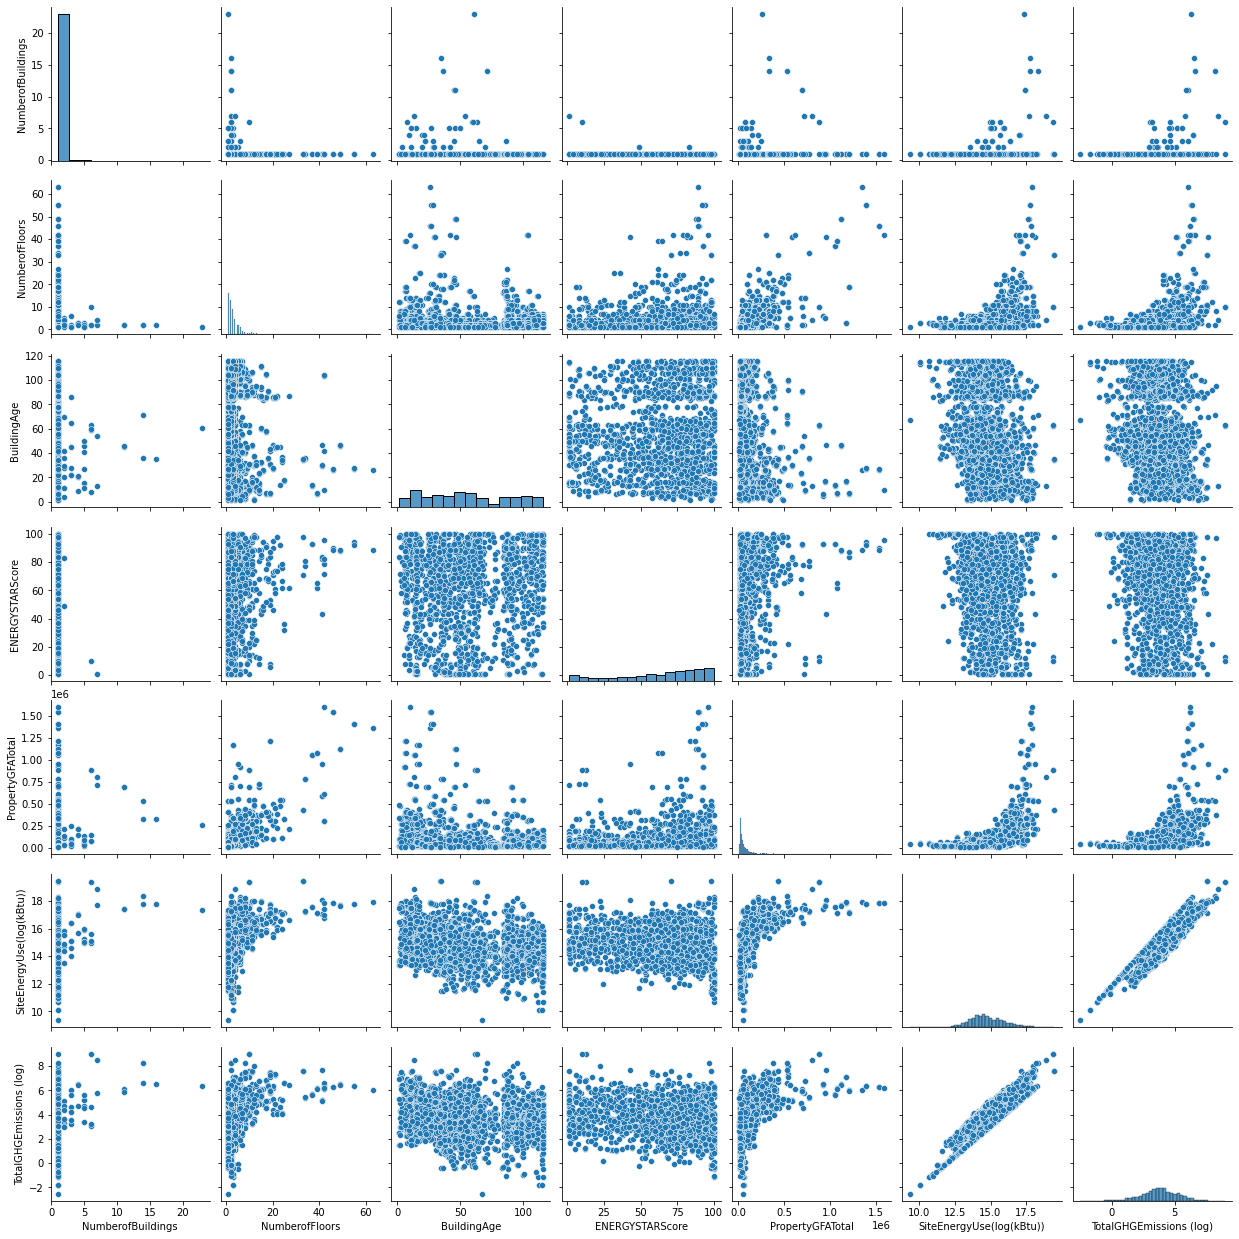

In [230]:
fig = plt.figure()
sns.pairplot(data=data_pairplot)
plt.show()

In [231]:
# Sauvgarde des résultats au format csv
data_analyse.to_csv("data_pour_model.csv")

In [232]:
# Creation d'un jeu de données avec des 'OSEBuildingID' unique
data_unique = data_analyse.copy()
data_unique.drop_duplicates(subset=['OSEBuildingID'], keep='last', inplace=True)
data_unique.head()

OSEBuildingID        BuildingType PrimaryPropertyType CouncilDistrictCode  \
1              1      NonResidential               Hotel                   7   
3              2      NonResidential               Hotel                   7   
5              3      NonResidential               Hotel                   7   
7              5      NonResidential               Hotel                   7   
11             9  Nonresidential COS               Other                   7   

    YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
1        1927                  1              12           88434.0   
3        1996                  1              11          103566.0   
5        1969                  1              41          956110.0   
7        1926                  1              10           61320.0   
11       1999                  1               2           97288.0   

   LargestPropertyUseType SecondLargestPropertyUseType  ...  \
1                   Hotel                      Without  ...   
3                   Hotel                      Parking  ...   
5                   Hotel                      Without  ...   
7                   Hotel                      Without  ...   
11         Public service                      Without  ...   

   LargestPropertyUseTypeProportion  SecondLargestPropertyUseTypeProportion  \
1                        100.000000                                0.000000   
3                         80.991831                               14.545314   
5                         79.121963                                0.000000   
7                        100.000000                                0.000000   
11                        91.306225                                0.000000   

    ThridLargestPropertyUseTypeProportion  SiteEnergyUse(log(kBtu))  \
1                                0.000000                 15.793246   
3                                4.462855                 15.942305   
5                                0.000000                 18.100297   
7                                0.000000                 15.731636   
11                               0.000000                 16.307609   

    Electricity(%) NaturalGas(%) SteamUse(%)  OtherFuelUse(%)  \
1        54.605993     17.663838   27.730162              0.0   
3        38.660907     61.339093    0.000000              0.0   
5        68.230741      2.057944   29.711308              0.0   
7        40.751928     26.656717   32.591344              0.0   
11       60.988402     39.011598    0.000000              0.0   

    PropertyGFAParking(%) PropertyGFABuilding(s)(%)  
1                0.000000                100.000000  
3               14.545314                 85.454686  
5               20.574829                 79.425171  
7                0.000000                100.000000  
11              38.234931                 61.765069  

[5 rows x 33 columns]

In [233]:
data_unique.to_csv("data_pour_model2.csv")